In [18]:
abalone_data = """gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
F,0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14
M,0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
M,0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11
F,0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10
F,0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10
M,0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12
I,0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,7
F,0.44,0.34,0.1,0.451,0.188,0.087,0.13,10
M,0.365,0.295,0.08,0.2555,0.097,0.043,0.1,7
M,0.45,0.32,0.1,0.381,0.1705,0.075,0.115,9
M,0.355,0.28,0.095,0.2455,0.0955,0.062,0.075,11
I,0.38,0.275,0.1,0.2255,0.08,0.049,0.085,10
F,0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,12
F,0.55,0.415,0.135,0.7635,0.318,0.21,0.2,9
F,0.615,0.48,0.165,1.1615,0.513,0.301,0.305,10
F,0.56,0.44,0.14,0.9285,0.3825,0.188,0.3,11
F,0.58,0.45,0.185,0.9955,0.3945,0.272,0.285,11
M,0.59,0.445,0.14,0.931,0.356,0.234,0.28,12
M,0.605,0.475,0.18,0.9365,0.394,0.219,0.295,15
M,0.575,0.425,0.14,0.8635,0.393,0.227,0.2,11
M,0.58,0.47,0.165,0.9975,0.3935,0.242,0.33,10
F,0.68,0.56,0.165,1.639,0.6055,0.2805,0.46,15
M,0.665,0.525,0.165,1.338,0.5515,0.3575,0.35,18
F,0.68,0.55,0.175,1.798,0.815,0.3925,0.455,19
F,0.705,0.55,0.2,1.7095,0.633,0.4115,0.49,13
M,0.465,0.355,0.105,0.4795,0.227,0.124,0.125,8
F,0.54,0.475,0.155,1.217,0.5305,0.3075,0.34,16
F,0.45,0.355,0.105,0.5225,0.237,0.1165,0.145,8
F,0.575,0.445,0.135,0.883,0.381,0.2035,0.26,11
M,0.355,0.29,0.09,0.3275,0.134,0.086,0.09,9
F,0.45,0.335,0.105,0.425,0.1865,0.091,0.115,9
F,0.55,0.425,0.135,0.8515,0.362,0.196,0.27,14
I,0.24,0.175,0.045,0.07,0.0315,0.0235,0.02,5
I,0.205,0.15,0.055,0.042,0.0255,0.015,0.012,5
I,0.21,0.15,0.05,0.042,0.0175,0.0125,0.015,4
I,0.39,0.295,0.095,0.203,0.0875,0.045,0.075,7
M,0.47,0.37,0.12,0.5795,0.293,0.227,0.14,9
F,0.46,0.375,0.12,0.4605,0.1775,0.11,0.15,7
I,0.325,0.245,0.07,0.161,0.0755,0.0255,0.045,6
F,0.525,0.425,0.16,0.8355,0.3545,0.2135,0.245,9
I,0.52,0.41,0.12,0.595,0.2385,0.111,0.19,8
M,0.4,0.32,0.095,0.303,0.1335,0.06,0.1,7
M,0.485,0.36,0.13,0.5415,0.2595,0.096,0.16,10
F,0.47,0.36,0.12,0.4775,0.2105,0.1055,0.15,10
M,0.405,0.31,0.1,0.385,0.173,0.0915,0.11,7
F,0.5,0.4,0.14,0.6615,0.2565,0.1755,0.22,8
M,0.445,0.35,0.12,0.4425,0.192,0.0955,0.135,8
M,0.47,0.385,0.135,0.5895,0.2765,0.12,0.17,8
I,0.245,0.19,0.06,0.086,0.042,0.014,0.025,4
F,0.505,0.4,0.125,0.583,0.246,0.13,0.175,7
M,0.45,0.345,0.105,0.4115,0.18,0.1125,0.135,7
M,0.505,0.405,0.11,0.625,0.305,0.16,0.175,9
F,0.53,0.41,0.13,0.6965,0.302,0.1935,0.2,10
M,0.425,0.325,0.095,0.3785,0.1705,0.08,0.1,7
M,0.52,0.4,0.12,0.58,0.234,0.1315,0.185,8
M,0.475,0.355,0.12,0.48,0.234,0.1015,0.135,8
F,0.565,0.44,0.16,0.915,0.354,0.1935,0.32,12
F,0.595,0.495,0.185,1.285,0.416,0.224,0.485,13
F,0.475,0.39,0.12,0.5305,0.2135,0.1155,0.17,10
I,0.31,0.235,0.07,0.151,0.063,0.0405,0.045,6
M,0.555,0.425,0.13,0.7665,0.264,0.168,0.275,13
F,0.4,0.32,0.11,0.353,0.1405,0.0985,0.1,8
F,0.595,0.475,0.17,1.247,0.48,0.225,0.425,20
M,0.57,0.48,0.175,1.185,0.474,0.261,0.38,11
F,0.605,0.45,0.195,1.098,0.481,0.2895,0.315,13
F,0.6,0.475,0.15,1.0075,0.4425,0.221,0.28,15
M,0.595,0.475,0.14,0.944,0.3625,0.189,0.315,9
F,0.6,0.47,0.15,0.922,0.363,0.194,0.305,10
F,0.555,0.425,0.14,0.788,0.282,0.1595,0.285,11
F,0.615,0.475,0.17,1.1025,0.4695,0.2355,0.345,14
F,0.575,0.445,0.14,0.941,0.3845,0.252,0.285,9
M,0.62,0.51,0.175,1.615,0.5105,0.192,0.675,12
F,0.52,0.425,0.165,0.9885,0.396,0.225,0.32,16
M,0.595,0.475,0.16,1.3175,0.408,0.234,0.58,21
M,0.58,0.45,0.14,1.013,0.38,0.216,0.36,14
F,0.57,0.465,0.18,1.295,0.339,0.2225,0.44,12
M,0.625,0.465,0.14,1.195,0.4825,0.205,0.4,13
M,0.56,0.44,0.16,0.8645,0.3305,0.2075,0.26,10
F,0.46,0.355,0.13,0.517,0.2205,0.114,0.165,9
F,0.575,0.45,0.16,0.9775,0.3135,0.231,0.33,12
M,0.565,0.425,0.135,0.8115,0.341,0.1675,0.255,15
M,0.555,0.44,0.15,0.755,0.307,0.1525,0.26,12
M,0.595,0.465,0.175,1.115,0.4015,0.254,0.39,13
F,0.625,0.495,0.165,1.262,0.507,0.318,0.39,10
M,0.695,0.56,0.19,1.494,0.588,0.3425,0.485,15
M,0.665,0.535,0.195,1.606,0.5755,0.388,0.48,14
M,0.535,0.435,0.15,0.725,0.269,0.1385,0.25,9
M,0.47,0.375,0.13,0.523,0.214,0.132,0.145,8
M,0.47,0.37,0.13,0.5225,0.201,0.133,0.165,7
F,0.475,0.375,0.125,0.5785,0.2775,0.085,0.155,10
I,0.36,0.265,0.095,0.2315,0.105,0.046,0.075,7
M,0.55,0.435,0.145,0.843,0.328,0.1915,0.255,15
M,0.53,0.435,0.16,0.883,0.316,0.164,0.335,15
M,0.53,0.415,0.14,0.724,0.3105,0.1675,0.205,10
M,0.605,0.47,0.16,1.1735,0.4975,0.2405,0.345,12
F,0.52,0.41,0.155,0.727,0.291,0.1835,0.235,12
F,0.545,0.43,0.165,0.802,0.2935,0.183,0.28,11
F,0.5,0.4,0.125,0.6675,0.261,0.1315,0.22,10
F,0.51,0.39,0.135,0.6335,0.231,0.179,0.2,9
F,0.435,0.395,0.105,0.3635,0.136,0.098,0.13,9
M,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9
M,0.465,0.36,0.105,0.431,0.172,0.107,0.175,9
I,0.435,0.32,0.08,0.3325,0.1485,0.0635,0.105,9
M,0.425,0.35,0.105,0.393,0.13,0.063,0.165,9
F,0.545,0.41,0.125,0.6935,0.2975,0.146,0.21,11
F,0.53,0.415,0.115,0.5915,0.233,0.1585,0.18,11
F,0.49,0.375,0.135,0.6125,0.2555,0.102,0.22,11
M,0.44,0.34,0.105,0.402,0.1305,0.0955,0.165,10
F,0.56,0.43,0.15,0.8825,0.3465,0.172,0.31,9
M,0.405,0.305,0.085,0.2605,0.1145,0.0595,0.085,8
F,0.47,0.365,0.105,0.4205,0.163,0.1035,0.14,9
I,0.385,0.295,0.085,0.2535,0.103,0.0575,0.085,7
F,0.515,0.425,0.14,0.766,0.304,0.1725,0.255,14
M,0.37,0.265,0.075,0.214,0.09,0.051,0.07,6
I,0.36,0.28,0.08,0.1755,0.081,0.0505,0.07,6
I,0.27,0.195,0.06,0.073,0.0285,0.0235,0.03,5
I,0.375,0.275,0.09,0.238,0.1075,0.0545,0.07,6
I,0.385,0.29,0.085,0.2505,0.112,0.061,0.08,8
M,0.7,0.535,0.16,1.7255,0.63,0.2635,0.54,19
M,0.71,0.54,0.165,1.959,0.7665,0.261,0.78,18
M,0.595,0.48,0.165,1.262,0.4835,0.283,0.41,17
F,0.44,0.35,0.125,0.4035,0.175,0.063,0.129,9
F,0.325,0.26,0.09,0.1915,0.085,0.036,0.062,7
I,0.35,0.26,0.095,0.211,0.086,0.056,0.068,7
I,0.265,0.2,0.065,0.0975,0.04,0.0205,0.028,7
F,0.425,0.33,0.115,0.406,0.1635,0.081,0.1355,8
F,0.305,0.23,0.08,0.156,0.0675,0.0345,0.048,7
M,0.345,0.255,0.09,0.2005,0.094,0.0295,0.063,9
F,0.405,0.325,0.11,0.3555,0.151,0.063,0.117,9
M,0.375,0.285,0.095,0.253,0.096,0.0575,0.0925,9
F,0.565,0.445,0.155,0.826,0.341,0.2055,0.2475,10
F,0.55,0.45,0.145,0.741,0.295,0.1435,0.2665,10
M,0.65,0.52,0.19,1.3445,0.519,0.306,0.4465,16
M,0.56,0.455,0.155,0.797,0.34,0.19,0.2425,11
M,0.475,0.375,0.13,0.5175,0.2075,0.1165,0.17,10
F,0.49,0.38,0.125,0.549,0.245,0.1075,0.174,10
M,0.46,0.35,0.12,0.515,0.224,0.108,0.1565,10
I,0.28,0.205,0.08,0.127,0.052,0.039,0.042,9
I,0.175,0.13,0.055,0.0315,0.0105,0.0065,0.0125,5
I,0.17,0.13,0.095,0.03,0.013,0.008,0.01,4
M,0.59,0.475,0.145,1.053,0.4415,0.262,0.325,15
F,0.605,0.5,0.185,1.1185,0.469,0.2585,0.335,9
F,0.635,0.515,0.19,1.3715,0.5065,0.305,0.45,10
F,0.605,0.485,0.16,1.0565,0.37,0.2355,0.355,10
F,0.565,0.45,0.135,0.9885,0.387,0.1495,0.31,12
M,0.515,0.405,0.13,0.722,0.32,0.131,0.21,10
F,0.575,0.46,0.19,0.994,0.392,0.2425,0.34,13
M,0.645,0.485,0.215,1.514,0.546,0.2615,0.635,16
F,0.58,0.455,0.17,0.9075,0.374,0.2135,0.285,13
F,0.575,0.46,0.165,1.124,0.2985,0.1785,0.44,13
M,0.605,0.465,0.165,1.056,0.4215,0.2475,0.34,13
F,0.605,0.485,0.16,1.222,0.53,0.2575,0.28,13
M,0.61,0.485,0.175,1.2445,0.544,0.297,0.345,12
F,0.725,0.56,0.21,2.141,0.65,0.398,1.005,18
F,0.65,0.545,0.23,1.752,0.5605,0.2895,0.815,16
M,0.725,0.57,0.19,2.55,1.0705,0.483,0.725,14
F,0.725,0.575,0.175,2.124,0.765,0.4515,0.85,20
F,0.68,0.57,0.205,1.842,0.625,0.408,0.65,20
M,0.705,0.56,0.22,1.981,0.8175,0.3085,0.76,14
F,0.68,0.515,0.175,1.6185,0.5125,0.409,0.62,12
M,0.695,0.55,0.215,1.9565,0.7125,0.541,0.59,14
F,0.53,0.395,0.145,0.775,0.308,0.169,0.255,7
M,0.525,0.435,0.155,1.065,0.486,0.233,0.285,8
F,0.52,0.405,0.115,0.776,0.32,0.1845,0.22,8
I,0.235,0.16,0.04,0.048,0.0185,0.018,0.015,5
I,0.36,0.26,0.09,0.1785,0.0645,0.037,0.075,7
I,0.315,0.21,0.06,0.125,0.06,0.0375,0.035,5
I,0.315,0.245,0.085,0.1435,0.053,0.0475,0.05,8
I,0.225,0.16,0.045,0.0465,0.025,0.015,0.015,4
M,0.58,0.475,0.15,0.97,0.385,0.2165,0.35,11
M,0.57,0.48,0.18,0.9395,0.399,0.2,0.295,14
M,0.64,0.51,0.175,1.368,0.515,0.266,0.57,21
F,0.56,0.45,0.16,1.0235,0.429,0.268,0.3,10
F,0.62,0.475,0.175,1.0165,0.4355,0.214,0.325,10
F,0.645,0.51,0.2,1.5675,0.621,0.367,0.46,12
M,0.62,0.49,0.19,1.218,0.5455,0.2965,0.355,13
F,0.63,0.48,0.15,1.0525,0.392,0.336,0.285,12
F,0.63,0.5,0.185,1.383,0.54,0.3315,0.38,10
F,0.63,0.48,0.16,1.199,0.5265,0.335,0.315,11
F,0.585,0.46,0.17,0.9325,0.365,0.271,0.29,9
M,0.615,0.48,0.18,1.1595,0.4845,0.2165,0.325,13
M,0.61,0.485,0.17,1.0225,0.419,0.2405,0.36,12
M,0.58,0.45,0.15,0.927,0.276,0.1815,0.36,14
I,0.355,0.275,0.085,0.22,0.092,0.06,0.15,8
F,0.51,0.4,0.14,0.8145,0.459,0.1965,0.195,10
M,0.5,0.405,0.155,0.772,0.346,0.1535,0.245,12
F,0.505,0.41,0.15,0.644,0.285,0.145,0.21,11
M,0.64,0.5,0.185,1.3035,0.4445,0.2635,0.465,16
M,0.56,0.45,0.16,0.922,0.432,0.178,0.26,15
M,0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10
F,0.45,0.345,0.12,0.4165,0.1655,0.095,0.135,9
M,0.5,0.4,0.165,0.825,0.254,0.205,0.285,13
F,0.5,0.4,0.145,0.63,0.234,0.1465,0.23,12
F,0.53,0.435,0.17,0.8155,0.2985,0.155,0.275,13
M,0.42,0.335,0.115,0.369,0.171,0.071,0.12,8
F,0.44,0.34,0.14,0.482,0.186,0.1085,0.16,9
I,0.4,0.3,0.11,0.315,0.109,0.067,0.12,9
I,0.435,0.34,0.11,0.3795,0.1495,0.085,0.12,8
F,0.525,0.415,0.17,0.8325,0.2755,0.1685,0.31,13
I,0.37,0.28,0.095,0.2655,0.122,0.052,0.08,7
F,0.49,0.365,0.145,0.6345,0.1995,0.1625,0.22,10
M,0.335,0.25,0.09,0.181,0.0755,0.0415,0.06,7
F,0.415,0.325,0.105,0.38,0.1595,0.0785,0.12,12
M,0.5,0.405,0.14,0.6155,0.241,0.1355,0.205,9
F,0.485,0.395,0.16,0.66,0.2475,0.128,0.235,14
M,0.55,0.405,0.14,0.8025,0.244,0.1635,0.255,10
M,0.45,0.35,0.13,0.46,0.174,0.111,0.135,8
I,0.405,0.3,0.12,0.324,0.1265,0.07,0.11,7
M,0.47,0.36,0.135,0.501,0.1665,0.115,0.165,10
F,0.415,0.305,0.13,0.32,0.1305,0.0755,0.105,8
F,0.445,0.325,0.125,0.455,0.1785,0.1125,0.14,9
F,0.47,0.35,0.145,0.5175,0.187,0.1235,0.18,11
F,0.49,0.375,0.15,0.5755,0.22,0.144,0.19,9
F,0.445,0.355,0.15,0.485,0.181,0.125,0.155,11
I,0.425,0.38,0.105,0.3265,0.1285,0.0785,0.1,10
F,0.5,0.37,0.135,0.45,0.1715,0.1055,0.155,9
F,0.39,0.29,0.125,0.3055,0.121,0.082,0.09,7
I,0.365,0.27,0.085,0.205,0.078,0.0485,0.07,7
F,0.58,0.465,0.165,1.1015,0.404,0.2095,0.35,11
F,0.53,0.415,0.16,0.783,0.2935,0.158,0.245,15
M,0.555,0.445,0.135,0.836,0.336,0.1625,0.275,13
M,0.565,0.44,0.175,0.9025,0.31,0.193,0.325,14
M,0.625,0.505,0.215,1.4455,0.496,0.287,0.435,22
I,0.275,0.215,0.075,0.1155,0.0485,0.029,0.035,7
I,0.44,0.35,0.135,0.435,0.1815,0.083,0.125,12
I,0.295,0.225,0.08,0.124,0.0485,0.032,0.04,9
I,0.075,0.055,0.01,0.002,0.001,0.0005,0.0015,1
I,0.13,0.1,0.03,0.013,0.0045,0.003,0.004,3
I,0.11,0.09,0.03,0.008,0.0025,0.002,0.003,3
I,0.16,0.12,0.035,0.021,0.0075,0.0045,0.005,5
M,0.565,0.425,0.16,0.9425,0.3495,0.2185,0.275,17
I,0.27,0.2,0.07,0.1,0.034,0.0245,0.035,5
I,0.23,0.175,0.065,0.0645,0.026,0.0105,0.02,5
I,0.3,0.23,0.08,0.1275,0.0435,0.0265,0.04,8
I,0.33,0.255,0.085,0.1655,0.063,0.039,0.06,8
I,0.35,0.26,0.085,0.174,0.0705,0.0345,0.06,10
I,0.32,0.245,0.08,0.1585,0.0635,0.0325,0.05,13
I,0.36,0.275,0.085,0.1975,0.0745,0.0415,0.07,9
I,0.305,0.245,0.075,0.156,0.0675,0.038,0.045,7
I,0.345,0.27,0.11,0.2135,0.082,0.0545,0.07,7
I,0.33,0.25,0.105,0.1715,0.0655,0.035,0.06,7
M,0.59,0.47,0.18,1.1235,0.4205,0.2805,0.36,13
F,0.595,0.455,0.155,1.0605,0.5135,0.2165,0.3,12
F,0.575,0.46,0.185,1.094,0.4485,0.217,0.345,15
M,0.6,0.495,0.165,1.2415,0.485,0.2775,0.34,15
M,0.56,0.45,0.175,1.011,0.3835,0.2065,0.37,15
M,0.56,0.45,0.185,1.07,0.3805,0.175,0.41,19
M,0.545,0.46,0.16,0.8975,0.341,0.1655,0.345,10
F,0.635,0.505,0.17,1.415,0.605,0.297,0.365,15
F,0.59,0.475,0.16,1.1015,0.4775,0.2555,0.295,13
F,0.54,0.475,0.155,0.928,0.394,0.194,0.26,11
F,0.57,0.44,0.125,0.865,0.3675,0.1725,0.27,12
M,0.53,0.42,0.165,0.8945,0.319,0.239,0.245,11
I,0.245,0.195,0.06,0.095,0.0445,0.0245,0.026,4
M,0.27,0.2,0.08,0.1205,0.0465,0.028,0.04,6
F,0.46,0.38,0.13,0.639,0.3,0.1525,0.16,11
M,0.52,0.45,0.15,0.895,0.3615,0.186,0.235,14
M,0.35,0.275,0.11,0.2925,0.1225,0.0635,0.0905,8
M,0.47,0.39,0.15,0.6355,0.2185,0.0885,0.255,9
F,0.45,0.36,0.125,0.4995,0.2035,0.1,0.17,13
F,0.64,0.525,0.215,1.779,0.4535,0.2855,0.55,22
M,0.59,0.5,0.2,1.187,0.412,0.2705,0.37,16
M,0.62,0.485,0.205,1.219,0.3875,0.2505,0.385,14
M,0.63,0.505,0.225,1.525,0.56,0.3335,0.45,15
M,0.63,0.515,0.155,1.259,0.4105,0.197,0.41,13
M,0.655,0.54,0.215,1.844,0.7425,0.327,0.585,22
F,0.66,0.53,0.185,1.3485,0.493,0.245,0.49,12
M,0.61,0.5,0.24,1.642,0.532,0.3345,0.69,18
M,0.635,0.525,0.205,1.484,0.55,0.3115,0.43,20
F,0.515,0.425,0.135,0.712,0.2665,0.1605,0.25,11
F,0.535,0.415,0.185,0.8415,0.314,0.1585,0.3,15
I,0.36,0.285,0.105,0.2415,0.0915,0.057,0.075,7
F,0.455,0.355,0.12,0.4495,0.177,0.104,0.15,9
M,0.485,0.395,0.14,0.6295,0.2285,0.127,0.225,14
M,0.515,0.38,0.175,0.9565,0.325,0.158,0.31,14
F,0.535,0.415,0.17,0.879,0.295,0.1965,0.285,10
M,0.53,0.435,0.155,0.699,0.288,0.1595,0.205,10
F,0.495,0.4,0.155,0.6445,0.242,0.1325,0.205,17
M,0.44,0.355,0.125,0.4775,0.132,0.0815,0.19,9
F,0.535,0.435,0.16,0.8105,0.3155,0.1795,0.24,10
M,0.54,0.435,0.18,0.996,0.3835,0.226,0.325,17
F,0.565,0.505,0.21,1.2765,0.501,0.279,0.355,12
M,0.61,0.475,0.165,1.116,0.428,0.2205,0.315,15
F,0.565,0.455,0.175,1.013,0.342,0.207,0.35,19
M,0.6,0.495,0.195,1.0575,0.384,0.19,0.375,26
I,0.295,0.215,0.085,0.128,0.049,0.034,0.04,6
I,0.275,0.205,0.075,0.1105,0.045,0.0285,0.035,6
I,0.28,0.21,0.085,0.1065,0.039,0.0295,0.03,4
M,0.49,0.395,0.14,0.549,0.2215,0.1275,0.15,11
M,0.37,0.28,0.105,0.234,0.0905,0.0585,0.075,9
F,0.405,0.305,0.095,0.3485,0.1455,0.0895,0.1,9
F,0.54,0.435,0.175,0.892,0.322,0.174,0.335,13
M,0.37,0.28,0.1,0.252,0.1065,0.0595,0.074,8
M,0.36,0.27,0.1,0.217,0.0885,0.0495,0.0715,6
F,0.47,0.36,0.13,0.472,0.182,0.114,0.15,10
I,0.2,0.145,0.06,0.037,0.0125,0.0095,0.011,4
I,0.165,0.12,0.03,0.0215,0.007,0.005,0.005,3
M,0.645,0.515,0.24,1.5415,0.471,0.369,0.535,13
M,0.55,0.41,0.125,0.7605,0.2505,0.1635,0.195,14
M,0.57,0.435,0.145,0.9055,0.3925,0.2355,0.275,10
F,0.63,0.485,0.19,1.2435,0.4635,0.3055,0.39,21
M,0.56,0.44,0.14,0.971,0.443,0.2045,0.265,14
M,0.595,0.455,0.195,1.3305,0.4595,0.3235,0.345,19
F,0.62,0.47,0.2,1.2255,0.381,0.27,0.435,23
M,0.63,0.485,0.175,1.3,0.4335,0.2945,0.46,23
I,0.45,0.355,0.11,0.4585,0.194,0.067,0.14,8
F,0.635,0.535,0.19,1.242,0.576,0.2475,0.39,14
M,0.45,0.35,0.1,0.3675,0.1465,0.1015,0.12,10
F,0.58,0.455,0.155,0.8365,0.315,0.1385,0.32,18
I,0.33,0.255,0.095,0.172,0.066,0.0255,0.06,6
I,0.265,0.21,0.06,0.0965,0.0425,0.022,0.03,5
I,0.19,0.145,0.04,0.038,0.0165,0.0065,0.015,4
M,0.385,0.31,0.1,0.2845,0.1065,0.075,0.1,11
I,0.265,0.205,0.07,0.1055,0.039,0.041,0.035,5
M,0.335,0.265,0.105,0.222,0.0935,0.056,0.075,7
I,0.355,0.275,0.09,0.251,0.097,0.053,0.08,7
I,0.32,0.255,0.1,0.1755,0.073,0.0415,0.065,7
M,0.51,0.4,0.13,0.6435,0.27,0.1665,0.205,12
M,0.36,0.295,0.105,0.241,0.0865,0.053,0.095,8
I,0.36,0.28,0.09,0.2255,0.0885,0.04,0.09,8
M,0.5,0.38,0.155,0.5955,0.2135,0.161,0.2,12
F,0.4,0.325,0.12,0.3185,0.134,0.0565,0.095,8
I,0.3,0.22,0.08,0.121,0.0475,0.042,0.035,5
I,0.235,0.175,0.04,0.0705,0.0335,0.015,0.02,5
F,0.74,0.6,0.195,1.974,0.598,0.4085,0.71,16
M,0.62,0.465,0.19,1.3415,0.5705,0.3175,0.355,11
M,0.6,0.475,0.19,1.0875,0.403,0.2655,0.325,14
M,0.59,0.45,0.185,1.283,0.473,0.276,0.425,16
M,0.62,0.475,0.185,1.325,0.6045,0.325,0.33,13
F,0.565,0.45,0.195,1.0035,0.406,0.2505,0.285,15
M,0.575,0.455,0.145,1.165,0.581,0.2275,0.3,14
F,0.62,0.51,0.205,1.3475,0.4775,0.2565,0.48,14
M,0.62,0.465,0.185,1.274,0.579,0.3065,0.32,12
F,0.505,0.375,0.18,0.568,0.2325,0.1495,0.17,12
F,0.46,0.425,0.155,0.746,0.3005,0.152,0.24,8
M,0.49,0.39,0.14,0.707,0.2795,0.2185,0.18,13
F,0.525,0.42,0.16,0.756,0.2745,0.173,0.275,9
I,0.34,0.26,0.08,0.2,0.08,0.0555,0.055,6
I,0.375,0.305,0.115,0.2715,0.092,0.074,0.09,8
M,0.61,0.48,0.15,1.2,0.56,0.2455,0.28,14
F,0.61,0.495,0.185,1.153,0.536,0.2905,0.245,8
F,0.585,0.45,0.17,0.8685,0.3325,0.1635,0.27,22
M,0.57,0.46,0.14,0.9535,0.4465,0.2065,0.245,12
M,0.58,0.455,0.17,0.93,0.408,0.259,0.22,9
M,0.635,0.515,0.17,1.275,0.509,0.286,0.34,16
M,0.7,0.58,0.205,2.13,0.7415,0.49,0.58,20
M,0.675,0.525,0.185,1.587,0.6935,0.336,0.395,13
F,0.645,0.525,0.19,1.8085,0.7035,0.3885,0.395,18
M,0.745,0.585,0.215,2.499,0.9265,0.472,0.7,17
F,0.685,0.545,0.18,1.768,0.7495,0.392,0.485,16
M,0.605,0.49,0.18,1.227,0.48,0.287,0.35,18
F,0.59,0.465,0.15,0.997,0.392,0.246,0.34,12
F,0.65,0.525,0.175,1.4225,0.61,0.2995,0.445,20
F,0.6,0.48,0.15,1.029,0.4085,0.2705,0.295,16
F,0.62,0.5,0.175,1.186,0.4985,0.3015,0.35,12
M,0.63,0.515,0.16,1.016,0.4215,0.244,0.355,19
M,0.58,0.465,0.145,0.887,0.4405,0.1655,0.265,11
F,0.58,0.455,0.12,1.0735,0.479,0.2735,0.265,10
M,0.63,0.49,0.18,1.13,0.458,0.2765,0.315,12
F,0.69,0.56,0.215,1.719,0.68,0.299,0.47,17
F,0.65,0.545,0.165,1.566,0.6645,0.3455,0.415,16
F,0.66,0.565,0.195,1.7605,0.692,0.3265,0.5,16
F,0.68,0.58,0.2,1.787,0.585,0.453,0.6,19
F,0.7,0.575,0.17,1.31,0.5095,0.314,0.42,14
M,0.685,0.52,0.15,1.343,0.4635,0.292,0.4,13
F,0.675,0.545,0.195,1.7345,0.6845,0.3695,0.605,20
M,0.63,0.49,0.19,1.1775,0.4935,0.3365,0.285,11
F,0.585,0.45,0.16,1.077,0.4995,0.2875,0.25,10
M,0.565,0.465,0.175,0.995,0.3895,0.183,0.37,15
F,0.61,0.495,0.185,1.1085,0.3705,0.3135,0.33,12
M,0.605,0.47,0.18,1.1405,0.3755,0.2805,0.385,15
M,0.535,0.42,0.145,0.791,0.33,0.189,0.25,10
M,0.485,0.4,0.135,0.663,0.313,0.137,0.2,10
M,0.47,0.375,0.12,0.5565,0.226,0.122,0.195,12
M,0.545,0.425,0.135,0.8445,0.373,0.21,0.235,10
F,0.455,0.37,0.105,0.4925,0.216,0.1245,0.135,9
M,0.54,0.42,0.155,0.7385,0.3515,0.152,0.215,12
M,0.46,0.38,0.135,0.482,0.207,0.1225,0.145,10
M,0.49,0.42,0.125,0.609,0.239,0.1435,0.22,14
I,0.465,0.375,0.12,0.471,0.222,0.119,0.14,9
I,0.415,0.325,0.1,0.3215,0.1535,0.0595,0.105,10
M,0.475,0.375,0.125,0.593,0.277,0.115,0.18,10
F,0.47,0.375,0.125,0.5615,0.252,0.137,0.18,10
I,0.365,0.295,0.095,0.25,0.1075,0.0545,0.08,9
I,0.345,0.275,0.095,0.1995,0.0755,0.0535,0.07,6
I,0.39,0.31,0.1,0.302,0.116,0.064,0.115,11
F,0.5,0.395,0.14,0.7155,0.3165,0.176,0.24,10
M,0.47,0.38,0.145,0.5865,0.2385,0.144,0.185,8
M,0.535,0.44,0.15,0.6765,0.256,0.139,0.26,12
M,0.585,0.455,0.15,0.987,0.4355,0.2075,0.31,11
F,0.485,0.365,0.12,0.5885,0.27,0.131,0.175,9
M,0.515,0.455,0.135,0.7225,0.295,0.1625,0.235,9
F,0.435,0.325,0.11,0.4335,0.178,0.0985,0.155,7
F,0.515,0.415,0.14,0.6935,0.3115,0.152,0.2,10
I,0.44,0.345,0.12,0.365,0.1655,0.083,0.11,7
F,0.525,0.44,0.15,0.8425,0.3685,0.1985,0.24,12
M,0.45,0.355,0.115,0.479,0.2125,0.1045,0.15,8
M,0.59,0.485,0.12,0.911,0.39,0.182,0.29,16
M,0.555,0.45,0.145,0.915,0.4,0.246,0.285,11
M,0.57,0.44,0.095,0.827,0.3395,0.2215,0.235,8
M,0.59,0.5,0.165,1.1045,0.4565,0.2425,0.34,15
M,0.585,0.475,0.12,0.945,0.41,0.2115,0.28,14
F,0.58,0.46,0.12,0.9935,0.4625,0.2385,0.28,11
M,0.545,0.44,0.12,0.8565,0.3475,0.1715,0.24,12
F,0.605,0.495,0.17,1.2385,0.528,0.2465,0.39,14
F,0.62,0.47,0.14,1.0325,0.3605,0.224,0.36,15
F,0.63,0.5,0.17,1.3135,0.5595,0.267,0.4,20
M,0.63,0.515,0.165,1.352,0.488,0.349,0.45,20
F,0.63,0.5,0.155,1.005,0.367,0.199,0.36,16
M,0.545,0.41,0.14,0.625,0.223,0.16,0.235,13
F,0.67,0.54,0.165,1.5015,0.518,0.358,0.505,14
I,0.49,0.38,0.12,0.529,0.2165,0.139,0.155,11
F,0.49,0.39,0.135,0.5785,0.2465,0.123,0.2,13
I,0.29,0.225,0.07,0.101,0.036,0.0235,0.035,8
I,0.26,0.2,0.07,0.092,0.037,0.02,0.03,6
M,0.58,0.45,0.175,1.068,0.425,0.203,0.32,13
F,0.61,0.485,0.165,1.0915,0.3935,0.2435,0.33,18
M,0.6,0.5,0.16,1.015,0.3995,0.1735,0.33,19
F,0.56,0.455,0.125,0.943,0.344,0.129,0.375,21
F,0.575,0.45,0.17,1.0475,0.3775,0.1705,0.385,18
F,0.57,0.45,0.175,0.9555,0.38,0.1665,0.295,18
M,0.6,0.47,0.155,1.036,0.4375,0.196,0.325,20
M,0.565,0.455,0.17,0.9065,0.342,0.156,0.32,18
M,0.545,0.42,0.14,0.7505,0.2475,0.13,0.255,22
I,0.44,0.345,0.1,0.366,0.122,0.0905,0.12,13
M,0.5,0.41,0.15,0.662,0.2815,0.137,0.22,11
I,0.36,0.275,0.095,0.217,0.084,0.0435,0.09,7
I,0.385,0.305,0.095,0.252,0.0915,0.055,0.09,14
M,0.39,0.3,0.09,0.3055,0.143,0.0645,0.085,9
M,0.5,0.415,0.165,0.6885,0.249,0.138,0.25,13
I,0.36,0.275,0.11,0.2335,0.095,0.0525,0.085,10
I,0.335,0.26,0.1,0.192,0.0785,0.0585,0.07,8
F,0.505,0.425,0.14,0.85,0.275,0.1625,0.285,19
I,0.395,0.295,0.1,0.2715,0.134,0.0325,0.085,10
F,0.41,0.325,0.105,0.3635,0.159,0.077,0.12,10
F,0.56,0.455,0.19,0.714,0.283,0.129,0.275,9
M,0.565,0.435,0.185,0.9815,0.329,0.136,0.39,13
M,0.565,0.455,0.185,0.9265,0.354,0.1575,0.375,16
M,0.605,0.5,0.175,1.098,0.4765,0.232,0.375,12
F,0.565,0.455,0.15,0.8205,0.365,0.159,0.26,18
M,0.725,0.565,0.215,1.891,0.6975,0.4725,0.58,16
F,0.675,0.535,0.16,1.41,0.592,0.3175,0.42,16
F,0.665,0.555,0.195,1.4385,0.581,0.354,0.36,17
F,0.565,0.49,0.155,0.9245,0.405,0.2195,0.255,11
F,0.645,0.55,0.175,1.2915,0.57,0.3045,0.33,14
M,0.575,0.47,0.14,0.8375,0.3485,0.1735,0.24,11
F,0.64,0.54,0.175,1.221,0.51,0.259,0.39,15
I,0.36,0.28,0.105,0.199,0.0695,0.045,0.08,9
I,0.415,0.31,0.11,0.2965,0.123,0.057,0.0995,10
F,0.525,0.41,0.135,0.7085,0.293,0.1525,0.235,11
M,0.38,0.285,0.1,0.2665,0.115,0.061,0.075,11
F,0.585,0.465,0.17,0.9915,0.3865,0.224,0.265,12
I,0.24,0.185,0.07,0.0715,0.026,0.018,0.025,6
I,0.22,0.165,0.055,0.0545,0.0215,0.012,0.02,5
I,0.255,0.195,0.07,0.0735,0.0255,0.02,0.025,6
I,0.175,0.125,0.05,0.0235,0.008,0.0035,0.008,5
F,0.67,0.55,0.19,1.3905,0.5425,0.3035,0.4,12
M,0.655,0.53,0.195,1.388,0.567,0.2735,0.41,13
F,0.68,0.55,0.21,1.7445,0.5975,0.305,0.625,17
M,0.675,0.555,0.2,1.4385,0.545,0.2665,0.465,21
F,0.53,0.44,0.135,0.7835,0.313,0.1715,0.2185,9
F,0.515,0.405,0.12,0.646,0.2895,0.1405,0.177,10
I,0.43,0.34,0.12,0.3575,0.151,0.0645,0.1045,9
F,0.52,0.405,0.12,0.627,0.2645,0.1415,0.181,11
F,0.545,0.415,0.16,0.7715,0.272,0.1455,0.2765,10
M,0.53,0.415,0.175,0.7395,0.261,0.1395,0.2645,17
F,0.465,0.35,0.115,0.421,0.1565,0.091,0.1345,9
M,0.665,0.54,0.175,1.347,0.4955,0.254,0.415,17
M,0.735,0.59,0.225,1.756,0.637,0.3405,0.58,21
M,0.66,0.545,0.185,1.32,0.5305,0.2635,0.455,16
F,0.7,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
M,0.575,0.4,0.155,0.9325,0.3605,0.2445,0.3,17
M,0.57,0.465,0.125,0.849,0.3785,0.1765,0.24,15
F,0.58,0.46,0.15,0.9955,0.429,0.212,0.26,19
M,0.63,0.48,0.145,1.0115,0.4235,0.237,0.305,12
F,0.585,0.465,0.14,0.908,0.381,0.1615,0.315,13
M,0.55,0.45,0.13,0.92,0.378,0.2385,0.29,11
F,0.625,0.515,0.15,1.2415,0.5235,0.3065,0.36,15
M,0.54,0.42,0.135,0.8075,0.3485,0.1795,0.235,11
F,0.57,0.455,0.165,1.0595,0.44,0.2195,0.285,14
M,0.59,0.455,0.145,1.073,0.475,0.19,0.285,14
M,0.58,0.46,0.13,0.921,0.357,0.181,0.29,13
F,0.655,0.51,0.155,1.2895,0.5345,0.2855,0.41,11
M,0.655,0.53,0.175,1.2635,0.486,0.2635,0.415,15
M,0.625,0.5,0.195,1.369,0.5875,0.2185,0.37,17
F,0.625,0.5,0.15,0.953,0.3445,0.2235,0.305,15
F,0.64,0.52,0.175,1.248,0.4245,0.2595,0.48,12
F,0.605,0.485,0.165,1.0105,0.435,0.209,0.3,19
F,0.615,0.525,0.155,1.0385,0.427,0.2315,0.345,11
M,0.555,0.45,0.175,0.874,0.3275,0.202,0.305,10
F,0.58,0.44,0.18,0.854,0.3665,0.1635,0.245,12
F,0.62,0.52,0.225,1.1835,0.378,0.27,0.395,23
F,0.62,0.47,0.225,1.115,0.378,0.2145,0.36,15
F,0.6,0.505,0.19,1.129,0.4385,0.256,0.36,13
F,0.625,0.485,0.19,1.1745,0.4385,0.2305,0.42,17
M,0.6,0.47,0.175,1.105,0.4865,0.247,0.315,15
M,0.56,0.46,0.235,0.8395,0.3325,0.157,0.305,12
M,0.585,0.455,0.225,1.055,0.3815,0.221,0.365,15
M,0.56,0.435,0.18,0.889,0.36,0.204,0.25,11
I,0.56,0.445,0.155,0.8735,0.3005,0.209,0.275,16
I,0.68,0.53,0.185,1.1095,0.439,0.245,0.34,10
F,0.455,0.35,0.14,0.5185,0.221,0.1265,0.135,10
F,0.49,0.38,0.145,0.6725,0.249,0.181,0.21,10
M,0.31,0.22,0.085,0.146,0.061,0.0365,0.045,6
F,0.275,0.195,0.07,0.08,0.031,0.0215,0.025,5
M,0.27,0.195,0.08,0.1,0.0385,0.0195,0.03,6
M,0.4,0.29,0.115,0.2795,0.1115,0.0575,0.075,9
M,0.28,0.2,0.08,0.0915,0.033,0.0215,0.03,5
M,0.325,0.23,0.09,0.147,0.06,0.034,0.045,4
F,0.345,0.25,0.09,0.203,0.078,0.059,0.055,6
M,0.21,0.15,0.05,0.0385,0.0155,0.0085,0.01,3
F,0.36,0.27,0.09,0.1885,0.0845,0.0385,0.055,5
I,0.365,0.26,0.115,0.218,0.0935,0.0445,0.07,9
M,0.2,0.14,0.055,0.035,0.0145,0.008,0.01,5
M,0.235,0.16,0.06,0.0545,0.0265,0.0095,0.015,4
M,0.175,0.125,0.04,0.024,0.0095,0.006,0.005,4
M,0.155,0.11,0.04,0.0155,0.0065,0.003,0.005,3
F,0.57,0.445,0.155,0.733,0.282,0.159,0.235,14
F,0.57,0.45,0.16,0.9715,0.3965,0.255,0.26,12
M,0.385,0.3,0.095,0.24,0.0885,0.059,0.085,9
I,0.53,0.42,0.185,0.752,0.299,0.156,0.205,20
F,0.46,0.355,0.13,0.458,0.192,0.1055,0.13,13
I,0.47,0.37,0.12,0.4705,0.1845,0.1055,0.155,12
F,0.435,0.335,0.11,0.38,0.1695,0.086,0.11,9
I,0.47,0.37,0.14,0.4985,0.2095,0.1225,0.145,10
I,0.465,0.38,0.13,0.454,0.1895,0.08,0.155,11
I,0.52,0.405,0.14,0.5775,0.2,0.145,0.179,11
M,0.29,0.23,0.075,0.1165,0.043,0.0255,0.04,7
M,0.275,0.205,0.07,0.094,0.0335,0.02,0.0325,5
F,0.375,0.29,0.115,0.2705,0.093,0.066,0.0885,10
F,0.5,0.375,0.14,0.604,0.242,0.1415,0.179,15
F,0.44,0.355,0.115,0.415,0.1585,0.0925,0.131,11
M,0.42,0.325,0.115,0.2885,0.1,0.057,0.1135,15
M,0.445,0.35,0.115,0.3615,0.1565,0.0695,0.117,8
F,0.38,0.29,0.105,0.257,0.099,0.051,0.085,10
M,0.32,0.245,0.075,0.1555,0.0585,0.038,0.049,11
M,0.255,0.195,0.065,0.08,0.0315,0.018,0.027,8
M,0.205,0.155,0.045,0.0425,0.017,0.0055,0.0155,7
F,0.565,0.45,0.16,0.795,0.3605,0.1555,0.23,12
I,0.555,0.425,0.18,0.875,0.3695,0.2005,0.255,11
I,0.65,0.515,0.16,1.1625,0.495,0.203,0.33,17
I,0.615,0.49,0.155,0.9885,0.4145,0.195,0.345,13
I,0.56,0.44,0.165,0.8,0.335,0.1735,0.25,12
I,0.48,0.37,0.12,0.514,0.2075,0.131,0.155,13
I,0.485,0.39,0.125,0.591,0.287,0.141,0.12,9
I,0.5,0.385,0.15,0.6265,0.2605,0.1665,0.16,10
I,0.525,0.405,0.15,0.795,0.3075,0.205,0.255,14
F,0.66,0.5,0.165,1.1905,0.4585,0.298,0.37,12
F,0.66,0.53,0.17,1.326,0.519,0.2625,0.44,13
I,0.52,0.4,0.145,0.66,0.267,0.1055,0.22,13
F,0.44,0.34,0.105,0.364,0.148,0.0805,0.1175,8
I,0.515,0.4,0.12,0.659,0.2705,0.179,0.17,13
F,0.475,0.35,0.115,0.452,0.1715,0.092,0.155,11
F,0.545,0.415,0.15,0.7335,0.2795,0.163,0.2185,11
F,0.47,0.355,0.13,0.5465,0.2005,0.126,0.185,14
M,0.35,0.255,0.065,0.179,0.0705,0.0385,0.06,10
I,0.485,0.355,0.13,0.581,0.245,0.132,0.168,12
I,0.435,0.33,0.125,0.406,0.1685,0.1055,0.096,12
M,0.28,0.21,0.08,0.1085,0.041,0.0265,0.0345,7
F,0.41,0.32,0.115,0.387,0.165,0.1005,0.0985,11
I,0.45,0.35,0.14,0.474,0.21,0.109,0.1275,16
I,0.45,0.345,0.135,0.443,0.1975,0.0875,0.1175,14
F,0.59,0.455,0.155,1.066,0.382,0.2275,0.415,20
F,0.57,0.44,0.14,0.9535,0.3785,0.201,0.305,17
I,0.61,0.475,0.15,0.9665,0.4145,0.2,0.345,10
F,0.61,0.475,0.14,1.133,0.5275,0.2355,0.35,11
I,0.56,0.425,0.14,0.9175,0.4005,0.1975,0.26,10
F,0.585,0.435,0.175,0.982,0.4055,0.2495,0.27,10
I,0.58,0.445,0.15,0.8865,0.383,0.209,0.255,11
F,0.63,0.48,0.175,1.3675,0.5015,0.3035,0.515,17
F,0.625,0.49,0.175,1.233,0.5565,0.247,0.365,11
I,0.55,0.425,0.15,0.806,0.376,0.171,0.245,14
F,0.645,0.525,0.19,1.4635,0.6615,0.3435,0.435,19
I,0.46,0.355,0.14,0.4935,0.216,0.133,0.115,13
F,0.41,0.305,0.1,0.363,0.1735,0.065,0.11,11
I,0.495,0.39,0.125,0.6655,0.284,0.162,0.2,11
I,0.52,0.425,0.17,0.6805,0.28,0.174,0.195,10
F,0.55,0.41,0.145,0.8285,0.3095,0.1905,0.25,13
M,0.45,0.335,0.14,0.4625,0.164,0.076,0.15,14
F,0.405,0.31,0.12,0.3095,0.138,0.058,0.095,13
I,0.51,0.4,0.15,0.745,0.2865,0.1675,0.235,13
F,0.37,0.29,0.115,0.25,0.111,0.057,0.075,9
I,0.525,0.41,0.175,0.874,0.3585,0.207,0.205,18
F,0.66,0.52,0.18,1.514,0.526,0.2975,0.42,19
M,0.535,0.42,0.15,0.6995,0.2575,0.153,0.24,12
I,0.575,0.455,0.18,0.8525,0.3015,0.1825,0.3,13
F,0.55,0.43,0.14,0.7135,0.2565,0.186,0.225,9
I,0.605,0.47,0.14,0.939,0.3385,0.201,0.32,13
I,0.605,0.495,0.145,1.054,0.369,0.2255,0.36,12
F,0.56,0.445,0.195,0.981,0.305,0.2245,0.335,16
I,0.535,0.42,0.145,0.926,0.398,0.1965,0.25,17
F,0.385,0.315,0.11,0.286,0.1225,0.0635,0.0835,10
F,0.39,0.3,0.1,0.265,0.1075,0.06,0.0865,13
I,0.47,0.345,0.115,0.4885,0.2005,0.108,0.166,11
I,0.515,0.39,0.14,0.5555,0.2,0.1135,0.2235,12
I,0.425,0.345,0.125,0.425,0.16,0.0795,0.154,13
M,0.345,0.27,0.09,0.195,0.078,0.0455,0.059,9
I,0.485,0.37,0.13,0.458,0.181,0.113,0.136,10
M,0.37,0.285,0.1,0.228,0.0675,0.0675,0.081,10
M,0.35,0.265,0.09,0.1775,0.0575,0.042,0.068,12
F,0.44,0.345,0.17,0.4085,0.15,0.0825,0.1515,12
M,0.195,0.145,0.05,0.032,0.01,0.008,0.012,4
M,0.325,0.24,0.075,0.155,0.0475,0.0355,0.06,9
I,0.495,0.37,0.125,0.4775,0.185,0.0705,0.169,18
I,0.45,0.35,0.145,0.525,0.2085,0.1,0.1655,15
M,0.415,0.345,0.135,0.3865,0.128,0.07,0.148,13
F,0.47,0.355,0.14,0.433,0.1525,0.095,0.152,12
M,0.32,0.24,0.085,0.17,0.0655,0.047,0.049,7
M,0.31,0.225,0.075,0.1295,0.0455,0.0335,0.044,9
M,0.235,0.17,0.055,0.0515,0.018,0.0105,0.0195,7
M,0.345,0.255,0.08,0.169,0.06,0.0425,0.054,10
I,0.485,0.38,0.14,0.673,0.2175,0.13,0.195,18
F,0.5,0.385,0.115,0.6785,0.2945,0.138,0.195,12
F,0.5,0.385,0.105,0.498,0.1795,0.1095,0.17,17
I,0.465,0.36,0.105,0.498,0.214,0.116,0.14,15
F,0.525,0.405,0.16,0.658,0.2655,0.1125,0.225,12
F,0.425,0.335,0.095,0.322,0.1205,0.061,0.125,10
F,0.38,0.305,0.095,0.2815,0.1255,0.0525,0.09,8
I,0.53,0.415,0.145,0.944,0.3845,0.185,0.265,21
M,0.34,0.265,0.085,0.1835,0.077,0.046,0.065,10
I,0.475,0.365,0.115,0.49,0.223,0.1235,0.1335,9
F,0.43,0.34,0.12,0.391,0.1555,0.095,0.1405,7
M,0.46,0.365,0.125,0.467,0.1895,0.0945,0.158,10
I,0.47,0.36,0.13,0.5225,0.198,0.1065,0.165,9
M,0.36,0.295,0.1,0.2105,0.066,0.0525,0.075,9
M,0.355,0.265,0.09,0.168,0.05,0.041,0.063,8
M,0.38,0.235,0.1,0.258,0.1055,0.054,0.08,7
M,0.355,0.26,0.085,0.1905,0.081,0.0485,0.055,6
I,0.44,0.345,0.12,0.487,0.1965,0.108,0.16,14
F,0.51,0.4,0.13,0.5735,0.219,0.1365,0.195,13
M,0.325,0.24,0.085,0.173,0.0795,0.038,0.05,7
I,0.62,0.485,0.18,1.1785,0.4675,0.2655,0.39,13
F,0.59,0.45,0.16,0.9,0.358,0.156,0.315,19
M,0.33,0.255,0.095,0.1875,0.0735,0.045,0.06,7
M,0.45,0.34,0.13,0.3715,0.1605,0.0795,0.105,9
I,0.445,0.33,0.12,0.347,0.12,0.084,0.105,11
M,0.33,0.215,0.075,0.1145,0.045,0.0265,0.035,6
M,0.48,0.375,0.145,0.777,0.216,0.13,0.17,9
I,0.46,0.35,0.12,0.4885,0.193,0.105,0.155,11
F,0.475,0.36,0.125,0.447,0.1695,0.081,0.14,9
M,0.255,0.18,0.065,0.079,0.034,0.014,0.025,5
I,0.335,0.245,0.09,0.1665,0.0595,0.04,0.06,6
I,0.47,0.35,0.13,0.466,0.1845,0.099,0.145,11
M,0.31,0.225,0.08,0.1345,0.054,0.024,0.05,7
F,0.37,0.28,0.11,0.2305,0.0945,0.0465,0.075,10
M,0.295,0.215,0.075,0.129,0.05,0.0295,0.04,7
F,0.555,0.435,0.165,0.97,0.336,0.2315,0.295,17
F,0.615,0.515,0.17,1.14,0.4305,0.2245,0.42,16
I,0.58,0.49,0.195,1.3165,0.5305,0.254,0.41,18
F,0.585,0.475,0.185,0.9585,0.4145,0.1615,0.33,11
I,0.65,0.525,0.18,1.626,0.597,0.3445,0.53,18
I,0.535,0.45,0.17,0.781,0.3055,0.1555,0.295,11
F,0.415,0.34,0.13,0.3675,0.146,0.0885,0.12,10
F,0.38,0.305,0.105,0.281,0.1045,0.0615,0.09,12
I,0.45,0.355,0.12,0.412,0.1145,0.0665,0.16,19
F,0.395,0.295,0.095,0.2245,0.078,0.054,0.08,10
M,0.455,0.35,0.12,0.4835,0.1815,0.144,0.16,11
F,0.485,0.38,0.15,0.605,0.2155,0.14,0.18,15
M,0.55,0.425,0.155,0.9175,0.2775,0.243,0.335,13
F,0.45,0.35,0.145,0.5425,0.1765,0.123,0.175,13
M,0.475,0.385,0.145,0.6175,0.235,0.108,0.215,14
F,0.5,0.38,0.155,0.655,0.2405,0.143,0.205,17
F,0.53,0.41,0.165,0.8115,0.24,0.169,0.24,19
M,0.49,0.39,0.15,0.573,0.225,0.124,0.17,21
F,0.49,0.385,0.15,0.7865,0.241,0.14,0.24,23
F,0.52,0.395,0.18,0.64,0.158,0.11,0.245,22
M,0.54,0.415,0.145,0.74,0.2635,0.168,0.245,12
F,0.5,0.375,0.115,0.5945,0.185,0.148,0.19,11
F,0.45,0.38,0.165,0.8165,0.25,0.1915,0.265,23
F,0.37,0.275,0.1,0.2225,0.093,0.026,0.08,8
I,0.37,0.275,0.1,0.2295,0.0885,0.0465,0.07,7
M,0.485,0.37,0.14,0.5725,0.204,0.1415,0.175,10
F,0.435,0.325,0.115,0.3915,0.154,0.094,0.12,7
M,0.535,0.405,0.185,0.8345,0.3175,0.1725,0.29,16
M,0.51,0.4,0.14,0.6515,0.2455,0.1665,0.185,10
M,0.565,0.44,0.185,0.909,0.344,0.2325,0.255,15
F,0.535,0.4,0.15,0.8045,0.3345,0.2125,0.21,13
F,0.535,0.405,0.125,0.927,0.26,0.1425,0.345,16
M,0.525,0.4,0.17,0.7305,0.279,0.2055,0.195,11
M,0.59,0.44,0.15,0.9555,0.366,0.2425,0.295,11
M,0.5,0.375,0.15,0.636,0.2535,0.145,0.19,10
I,0.255,0.19,0.075,0.0865,0.0345,0.0205,0.025,5
F,0.43,0.325,0.115,0.3865,0.1475,0.1065,0.11,11
M,0.38,0.29,0.12,0.283,0.1175,0.0655,0.085,9
I,0.165,0.11,0.02,0.019,0.0065,0.0025,0.005,4
I,0.315,0.23,0.09,0.1285,0.043,0.04,0.04,7
I,0.155,0.105,0.05,0.0175,0.005,0.0035,0.005,4
M,0.28,0.205,0.1,0.1165,0.0545,0.0285,0.03,5
F,0.43,0.335,0.12,0.444,0.155,0.1145,0.14,13
F,0.395,0.315,0.105,0.3515,0.1185,0.091,0.1195,16
M,0.385,0.285,0.105,0.2905,0.1215,0.0685,0.0875,12
F,0.48,0.385,0.135,0.536,0.1895,0.142,0.173,14
F,0.445,0.33,0.105,0.4525,0.18,0.103,0.123,9
M,0.395,0.295,0.115,0.316,0.1205,0.0595,0.1105,12
M,0.4,0.3,0.125,0.417,0.191,0.09,0.1175,9
M,0.415,0.325,0.14,0.417,0.1535,0.1015,0.144,10
M,0.315,0.25,0.09,0.203,0.0615,0.037,0.0795,11
F,0.345,0.26,0.09,0.207,0.0775,0.0435,0.0765,10
M,0.36,0.295,0.13,0.2765,0.0895,0.057,0.1005,10
I,0.295,0.225,0.09,0.1105,0.0405,0.0245,0.032,7
I,0.325,0.25,0.08,0.176,0.0595,0.0355,0.063,7
M,0.375,0.3,0.1,0.2465,0.104,0.0475,0.083,11
I,0.28,0.205,0.055,0.1135,0.045,0.0275,0.0335,7
M,0.355,0.265,0.085,0.201,0.069,0.053,0.0695,8
M,0.35,0.255,0.08,0.1915,0.08,0.0385,0.063,9
I,0.275,0.2,0.065,0.1035,0.0475,0.0205,0.03,7
I,0.29,0.205,0.07,0.0975,0.036,0.019,0.035,8
I,0.25,0.19,0.06,0.0765,0.036,0.0115,0.0245,6
I,0.18,0.125,0.035,0.0265,0.0095,0.0055,0.0085,4
I,0.15,0.1,0.025,0.015,0.0045,0.004,0.005,2
I,0.16,0.11,0.025,0.018,0.0065,0.0055,0.005,3
M,0.555,0.455,0.16,1.0575,0.3925,0.228,0.293,13
M,0.555,0.44,0.15,1.092,0.416,0.212,0.4405,15
M,0.525,0.41,0.13,0.99,0.3865,0.243,0.295,15
M,0.465,0.36,0.08,0.488,0.191,0.125,0.155,11
F,0.49,0.36,0.11,0.5005,0.161,0.107,0.195,17
M,0.4,0.305,0.085,0.297,0.108,0.0705,0.1,10
F,0.48,0.375,0.105,0.525,0.2185,0.1195,0.155,12
M,0.505,0.4,0.125,0.77,0.2735,0.159,0.255,13
F,0.52,0.4,0.12,0.6515,0.261,0.2015,0.165,15
M,0.525,0.4,0.13,0.8295,0.2405,0.1825,0.275,11
M,0.545,0.42,0.13,0.879,0.374,0.1695,0.23,13
M,0.52,0.4,0.12,0.823,0.298,0.1805,0.265,15
M,0.505,0.38,0.13,0.656,0.227,0.1785,0.22,13
M,0.525,0.425,0.12,0.8665,0.2825,0.176,0.29,18
M,0.51,0.39,0.125,0.6565,0.262,0.1835,0.175,10
M,0.52,0.385,0.115,0.669,0.2385,0.172,0.205,12
F,0.52,0.405,0.125,0.6435,0.2415,0.1735,0.21,12
M,0.535,0.41,0.135,0.862,0.2855,0.1525,0.32,14
M,0.445,0.345,0.09,0.3795,0.143,0.074,0.125,10
M,0.53,0.44,0.205,0.835,0.32,0.2175,0.245,14
F,0.36,0.265,0.09,0.2065,0.078,0.057,0.06,8
F,0.535,0.42,0.15,0.7365,0.2785,0.186,0.215,14
F,0.52,0.405,0.14,0.8175,0.2795,0.183,0.26,17
M,0.53,0.415,0.13,0.8425,0.275,0.1945,0.265,20
F,0.53,0.42,0.13,1.001,0.34,0.226,0.265,17
F,0.66,0.52,0.2,1.676,0.673,0.4805,0.45,17
M,0.52,0.385,0.14,0.6595,0.2485,0.2035,0.16,9
M,0.535,0.42,0.13,0.8055,0.301,0.181,0.28,14
M,0.695,0.515,0.175,1.5165,0.578,0.4105,0.39,15
F,0.51,0.39,0.105,0.612,0.187,0.15,0.195,13
M,0.485,0.355,0.12,0.547,0.215,0.1615,0.14,10
F,0.605,0.46,0.17,1.122,0.347,0.3045,0.315,13
F,0.58,0.455,0.165,1.1365,0.369,0.3005,0.275,13
M,0.65,0.515,0.175,1.4805,0.5295,0.272,0.525,20
M,0.62,0.505,0.185,1.5275,0.69,0.368,0.35,13
M,0.615,0.525,0.155,1.1375,0.367,0.236,0.37,20
F,0.605,0.495,0.19,1.437,0.469,0.2655,0.41,15
M,0.57,0.44,0.155,1.116,0.4775,0.2315,0.27,13
M,0.57,0.43,0.12,1.0615,0.348,0.167,0.31,15
M,0.585,0.405,0.15,1.2565,0.435,0.202,0.325,15
F,0.55,0.44,0.155,0.946,0.313,0.1825,0.335,16
F,0.54,0.44,0.135,0.959,0.2385,0.221,0.3,17
M,0.64,0.51,0.19,1.613,0.6215,0.361,0.47,14
F,0.61,0.47,0.145,1.153,0.403,0.296,0.32,14
M,0.545,0.45,0.15,0.978,0.3365,0.1905,0.3,11
F,0.59,0.445,0.13,1.1325,0.3825,0.234,0.32,13
M,0.345,0.27,0.095,0.197,0.0665,0.05,0.07,9
F,0.55,0.43,0.155,0.785,0.289,0.227,0.233,11
F,0.53,0.425,0.17,0.949,0.3485,0.2395,0.278,17
F,0.53,0.455,0.165,0.9805,0.3155,0.2815,0.2965,11
I,0.485,0.375,0.14,0.521,0.2,0.123,0.17,8
M,0.385,0.275,0.115,0.2685,0.0975,0.0825,0.085,8
M,0.455,0.34,0.135,0.462,0.1675,0.158,0.12,9
M,0.49,0.38,0.14,0.7605,0.245,0.167,0.185,10
M,0.53,0.41,0.165,0.732,0.189,0.17,0.31,11
M,0.505,0.385,0.145,0.6775,0.236,0.179,0.2,15
M,0.49,0.38,0.14,0.6385,0.2305,0.142,0.195,13
M,0.465,0.35,0.14,0.5755,0.2015,0.1505,0.19,15
F,0.47,0.36,0.145,0.537,0.1725,0.1375,0.195,15
M,0.56,0.41,0.165,0.93,0.3505,0.237,0.3,13
M,0.505,0.385,0.15,0.6415,0.246,0.152,0.215,12
M,0.515,0.435,0.145,0.8815,0.292,0.206,0.255,10
I,0.385,0.28,0.125,0.244,0.102,0.038,0.085,6
I,0.215,0.155,0.06,0.0525,0.021,0.0165,0.015,5
M,0.55,0.415,0.175,1.042,0.3295,0.2325,0.2905,15
F,0.515,0.39,0.13,0.5755,0.1975,0.13,0.1845,9
M,0.495,0.385,0.135,0.709,0.211,0.1375,0.262,12
F,0.505,0.39,0.16,0.644,0.2475,0.2025,0.1635,9
F,0.6,0.465,0.165,0.8875,0.309,0.246,0.262,12
F,0.57,0.465,0.16,0.8935,0.3145,0.2575,0.263,10
F,0.485,0.375,0.135,0.556,0.1925,0.1315,0.1685,10
M,0.47,0.37,0.18,0.51,0.1915,0.1285,0.1625,9
M,0.575,0.45,0.165,0.9215,0.3275,0.225,0.256,12
M,0.58,0.465,0.16,1.0345,0.315,0.26,0.3635,12
M,0.515,0.405,0.145,0.695,0.215,0.1635,0.234,15
M,0.53,0.41,0.155,0.7155,0.2805,0.1685,0.214,11
M,0.44,0.335,0.11,0.394,0.157,0.096,0.122,9
M,0.52,0.42,0.16,0.745,0.255,0.157,0.2885,11
F,0.425,0.345,0.11,0.3665,0.125,0.081,0.117,11
M,0.46,0.34,0.135,0.495,0.1655,0.117,0.185,10
M,0.45,0.335,0.125,0.349,0.119,0.1055,0.115,10
M,0.425,0.33,0.13,0.4405,0.152,0.0935,0.155,9
I,0.37,0.275,0.1,0.22,0.094,0.045,0.065,7
M,0.515,0.38,0.135,0.6615,0.2875,0.2095,0.155,10
M,0.405,0.305,0.12,0.3185,0.1235,0.0905,0.095,7
I,0.28,0.205,0.07,0.1015,0.041,0.03,0.03,6
F,0.48,0.4,0.125,0.759,0.2125,0.179,0.24,15
F,0.44,0.34,0.13,0.4195,0.153,0.1155,0.13,10
F,0.52,0.41,0.115,0.807,0.2855,0.179,0.235,12
M,0.505,0.405,0.14,0.875,0.2665,0.174,0.285,12
F,0.49,0.365,0.13,0.6835,0.165,0.1315,0.205,21
I,0.235,0.175,0.055,0.067,0.027,0.0125,0.018,6
I,0.255,0.185,0.06,0.088,0.0365,0.021,0.023,5
I,0.315,0.24,0.085,0.1715,0.071,0.0345,0.0535,7
I,0.325,0.25,0.08,0.1735,0.0765,0.0345,0.049,7
I,0.335,0.25,0.08,0.183,0.0735,0.04,0.0575,6
I,0.35,0.27,0.09,0.2055,0.075,0.0575,0.062,6
I,0.35,0.25,0.07,0.18,0.0655,0.048,0.054,6
I,0.36,0.3,0.085,0.27,0.1185,0.064,0.0745,7
I,0.365,0.275,0.135,0.24,0.108,0.0445,0.0735,7
I,0.37,0.275,0.14,0.2215,0.097,0.0455,0.0615,6
I,0.38,0.275,0.095,0.1375,0.086,0.0585,0.0605,7
I,0.385,0.29,0.095,0.312,0.143,0.0635,0.086,6
I,0.385,0.3,0.1,0.2895,0.1215,0.063,0.09,7
I,0.395,0.29,0.095,0.319,0.138,0.08,0.082,7
I,0.395,0.29,0.095,0.304,0.127,0.084,0.077,6
I,0.4,0.31,0.1,0.306,0.13,0.06,0.094,6
I,0.41,0.325,0.1,0.394,0.208,0.0655,0.106,6
I,0.415,0.32,0.11,0.3735,0.175,0.0755,0.109,7
M,0.415,0.305,0.1,0.325,0.156,0.0505,0.091,6
I,0.425,0.325,0.1,0.398,0.1185,0.0645,0.0945,6
I,0.44,0.365,0.115,0.501,0.2435,0.084,0.1465,9
I,0.445,0.335,0.1,0.4895,0.2745,0.086,0.1105,7
I,0.445,0.325,0.1,0.378,0.1795,0.1,0.089,7
I,0.45,0.35,0.13,0.547,0.245,0.1405,0.1405,8
M,0.47,0.375,0.12,0.5805,0.266,0.0935,0.169,8
I,0.475,0.365,0.125,0.5465,0.229,0.1185,0.172,9
F,0.48,0.365,0.135,0.6395,0.2945,0.113,0.175,8
I,0.485,0.355,0.105,0.498,0.2175,0.096,0.1525,9
M,0.49,0.385,0.125,0.609,0.3065,0.096,0.1775,8
F,0.495,0.41,0.125,0.7555,0.3355,0.129,0.214,9
M,0.5,0.4,0.125,0.5975,0.27,0.1275,0.166,9
M,0.505,0.44,0.14,0.8275,0.3415,0.1855,0.239,8
M,0.525,0.395,0.13,0.7635,0.3375,0.1425,0.225,8
M,0.54,0.405,0.125,0.891,0.4815,0.1915,0.202,9
F,0.54,0.42,0.14,0.805,0.369,0.1725,0.21,11
F,0.545,0.44,0.135,0.9185,0.429,0.2015,0.2375,10
F,0.55,0.43,0.125,0.923,0.4035,0.175,0.283,8
M,0.55,0.45,0.15,1.0145,0.407,0.2015,0.2875,10
F,0.55,0.45,0.15,0.875,0.362,0.1755,0.2765,10
M,0.555,0.435,0.145,0.9685,0.4985,0.168,0.2385,9
M,0.565,0.45,0.155,1.0595,0.4735,0.24,0.265,10
M,0.57,0.455,0.15,0.952,0.3895,0.2155,0.2745,9
M,0.57,0.435,0.13,0.7535,0.349,0.1755,0.194,10
F,0.575,0.465,0.14,0.958,0.442,0.1815,0.2705,9
M,0.59,0.475,0.165,1.077,0.4545,0.244,0.3095,9
M,0.59,0.46,0.13,1.102,0.455,0.2055,0.33,12
F,0.595,0.48,0.15,1.11,0.498,0.228,0.33,10
F,0.595,0.48,0.16,1.2095,0.5225,0.296,0.32,8
F,0.595,0.475,0.16,1.1405,0.547,0.231,0.271,6
F,0.595,0.465,0.14,1.113,0.5175,0.244,0.305,12
M,0.6,0.475,0.175,1.3445,0.549,0.2875,0.36,11
F,0.6,0.475,0.155,1.21,0.653,0.1695,0.3205,10
M,0.6,0.495,0.175,1.29,0.606,0.276,0.3445,11
F,0.605,0.475,0.175,1.382,0.609,0.2325,0.3985,10
M,0.605,0.455,0.16,1.1035,0.421,0.3015,0.325,9
F,0.615,0.5,0.175,1.377,0.5585,0.33,0.292,12
F,0.615,0.52,0.15,1.3435,0.629,0.2605,0.345,10
M,0.615,0.51,0.15,1.296,0.545,0.3315,0.32,9
M,0.615,0.505,0.165,1.34,0.5315,0.2815,0.41,12
F,0.62,0.505,0.16,1.3725,0.6285,0.275,0.3685,11
M,0.62,0.5,0.165,1.307,0.6355,0.2545,0.315,9
F,0.625,0.49,0.155,1.2085,0.465,0.162,0.411,11
F,0.625,0.49,0.2,1.3825,0.5895,0.285,0.381,11
M,0.63,0.505,0.165,1.26,0.4525,0.2755,0.406,14
M,0.635,0.51,0.17,1.3555,0.619,0.305,0.39,9
F,0.635,0.5,0.15,1.376,0.6495,0.361,0.31,10
F,0.635,0.485,0.165,1.2945,0.668,0.2605,0.2715,9
F,0.64,0.51,0.165,1.486,0.7595,0.332,0.321,8
M,0.65,0.525,0.175,1.4715,0.675,0.315,0.399,11
M,0.655,0.52,0.165,1.4095,0.586,0.291,0.405,9
M,0.655,0.58,0.205,2.0805,0.959,0.3415,0.601,17
M,0.66,0.53,0.17,1.3905,0.5905,0.212,0.453,15
M,0.66,0.52,0.19,1.558,0.755,0.298,0.4,10
F,0.67,0.585,0.16,1.309,0.5445,0.2945,0.413,10
F,0.675,0.525,0.17,1.8095,0.784,0.391,0.455,12
F,0.675,0.525,0.155,1.4785,0.628,0.3405,0.42,9
F,0.68,0.56,0.195,1.7775,0.861,0.322,0.415,11
F,0.685,0.54,0.16,1.6675,0.833,0.3775,0.475,11
F,0.695,0.56,0.22,1.834,0.8455,0.422,0.455,11
M,0.73,0.595,0.23,2.8255,1.1465,0.419,0.897,17
I,0.205,0.14,0.05,0.046,0.0165,0.012,0.0135,6
I,0.24,0.175,0.055,0.0705,0.025,0.014,0.021,5
I,0.24,0.175,0.065,0.0665,0.031,0.0135,0.017,3
I,0.255,0.19,0.05,0.083,0.0295,0.0215,0.027,6
I,0.255,0.18,0.055,0.083,0.031,0.0215,0.02,4
I,0.265,0.195,0.06,0.092,0.0345,0.025,0.0245,6
I,0.28,0.12,0.075,0.117,0.0455,0.029,0.0345,4
I,0.295,0.23,0.08,0.1625,0.065,0.05,0.0385,5
I,0.3,0.235,0.08,0.131,0.05,0.0265,0.043,4
I,0.3,0.23,0.095,0.1385,0.056,0.0365,0.037,6
I,0.305,0.22,0.07,0.141,0.062,0.031,0.037,5
I,0.315,0.235,0.075,0.1485,0.0585,0.0375,0.0425,6
I,0.315,0.23,0.07,0.144,0.053,0.0305,0.04,8
I,0.32,0.24,0.09,0.1575,0.07,0.0265,0.0425,5
I,0.325,0.24,0.075,0.187,0.0825,0.0445,0.05,6
I,0.33,0.265,0.085,0.196,0.0775,0.0305,0.0445,6
I,0.335,0.25,0.075,0.1825,0.0705,0.044,0.055,7
I,0.335,0.25,0.075,0.186,0.0945,0.038,0.0445,7
I,0.34,0.25,0.075,0.1785,0.0665,0.0455,0.045,5
I,0.34,0.25,0.07,0.2225,0.104,0.0425,0.055,7
I,0.345,0.265,0.1,0.2455,0.111,0.0535,0.065,7
I,0.37,0.29,0.095,0.249,0.1045,0.058,0.067,6
I,0.37,0.28,0.095,0.2865,0.1505,0.069,0.0795,7
I,0.375,0.28,0.09,0.215,0.084,0.06,0.055,6
I,0.385,0.265,0.08,0.251,0.124,0.037,0.07,6
I,0.41,0.31,0.09,0.339,0.155,0.0695,0.09,7
I,0.41,0.305,0.09,0.3535,0.157,0.0745,0.1,7
I,0.41,0.31,0.09,0.3335,0.1635,0.061,0.091,6
I,0.415,0.33,0.09,0.3595,0.17,0.081,0.09,6
I,0.42,0.32,0.115,0.376,0.169,0.092,0.1,5
I,0.42,0.315,0.1,0.3435,0.157,0.0795,0.09,6
I,0.425,0.34,0.1,0.382,0.164,0.096,0.1,6
I,0.425,0.315,0.1,0.377,0.1645,0.072,0.105,6
I,0.43,0.325,0.1,0.3645,0.1575,0.0825,0.105,7
I,0.43,0.325,0.09,0.425,0.217,0.087,0.095,7
I,0.435,0.325,0.12,0.3995,0.1815,0.061,0.1125,8
I,0.435,0.34,0.115,0.3925,0.1825,0.078,0.1145,6
I,0.44,0.345,0.13,0.4495,0.209,0.0835,0.134,6
I,0.44,0.325,0.09,0.35,0.148,0.067,0.105,7
F,0.445,0.335,0.11,0.4355,0.2025,0.1095,0.1195,6
I,0.445,0.35,0.13,0.4195,0.1695,0.0945,0.1195,7
I,0.45,0.36,0.13,0.478,0.191,0.127,0.137,7
I,0.45,0.355,0.105,0.4445,0.197,0.093,0.1335,8
I,0.45,0.345,0.11,0.47,0.2355,0.0855,0.1135,7
I,0.45,0.335,0.105,0.447,0.2335,0.153,0.119,7
I,0.455,0.355,0.125,0.5325,0.225,0.126,0.1465,7
I,0.455,0.375,0.12,0.497,0.2355,0.1055,0.1295,6
I,0.46,0.36,0.1,0.4635,0.2325,0.093,0.115,7
I,0.46,0.345,0.105,0.449,0.196,0.0945,0.1265,7
I,0.465,0.365,0.115,0.467,0.2315,0.0925,0.113,7
I,0.465,0.37,0.115,0.534,0.261,0.098,0.143,7
I,0.465,0.345,0.11,0.4415,0.1755,0.0905,0.12,7
F,0.465,0.35,0.125,0.482,0.23,0.106,0.1095,6
M,0.47,0.365,0.12,0.612,0.327,0.15,0.14,8
F,0.47,0.365,0.12,0.582,0.29,0.092,0.146,8
M,0.475,0.37,0.125,0.537,0.222,0.1215,0.15,9
F,0.475,0.36,0.12,0.5915,0.3245,0.11,0.127,6
M,0.48,0.375,0.115,0.6765,0.3205,0.1065,0.17,6
M,0.48,0.385,0.145,0.64,0.2925,0.1405,0.1575,6
M,0.48,0.36,0.1,0.439,0.194,0.099,0.115,8
M,0.48,0.365,0.12,0.6015,0.312,0.117,0.14,7
F,0.485,0.37,0.115,0.4785,0.1995,0.0955,0.129,7
M,0.49,0.385,0.125,0.649,0.32,0.124,0.1695,8
M,0.495,0.395,0.135,0.6335,0.3035,0.1295,0.1495,8
M,0.495,0.4,0.135,0.61,0.272,0.1435,0.144,7
M,0.5,0.39,0.135,0.6595,0.3145,0.1535,0.1565,6
I,0.5,0.385,0.12,0.56,0.2835,0.103,0.135,8
M,0.5,0.385,0.135,0.6425,0.3195,0.129,0.1535,7
M,0.5,0.4,0.125,0.6725,0.336,0.12,0.1825,7
F,0.505,0.39,0.13,0.674,0.3165,0.141,0.1785,9
I,0.505,0.39,0.15,0.685,0.362,0.131,0.156,8
M,0.505,0.41,0.125,0.642,0.289,0.133,0.155,9
I,0.505,0.355,0.125,0.601,0.25,0.1205,0.185,8
M,0.51,0.39,0.135,0.769,0.3935,0.1455,0.19,8
I,0.51,0.375,0.1,0.5785,0.238,0.1225,0.175,7
I,0.51,0.405,0.135,0.769,0.3655,0.1585,0.18,7
M,0.51,0.405,0.15,0.7035,0.347,0.134,0.1885,8
M,0.51,0.41,0.145,0.796,0.3865,0.1815,0.1955,8
F,0.515,0.43,0.14,0.834,0.367,0.2,0.23,8
M,0.515,0.39,0.155,0.7125,0.3695,0.137,0.155,7
F,0.525,0.415,0.14,0.724,0.3475,0.173,0.175,8
M,0.525,0.4,0.14,0.7325,0.334,0.1575,0.17,11
F,0.53,0.425,0.13,0.7585,0.325,0.197,0.205,8
F,0.53,0.425,0.15,0.8495,0.328,0.232,0.202,8
M,0.53,0.405,0.125,0.6515,0.2715,0.1605,0.186,7
F,0.535,0.4,0.135,0.8215,0.3935,0.196,0.205,8
M,0.535,0.43,0.14,0.7165,0.2855,0.1595,0.2155,8
M,0.535,0.435,0.14,0.874,0.3735,0.229,0.2195,8
F,0.55,0.445,0.155,0.9905,0.544,0.178,0.218,9
F,0.55,0.43,0.14,0.8105,0.368,0.161,0.275,9
F,0.56,0.455,0.16,0.967,0.4525,0.207,0.274,9
F,0.565,0.4,0.13,0.6975,0.3075,0.1665,0.18,8
M,0.57,0.45,0.155,1.195,0.5625,0.2565,0.295,10
M,0.57,0.45,0.155,1.1935,0.513,0.21,0.343,10
F,0.57,0.455,0.15,1.107,0.54,0.255,0.27,8
M,0.57,0.445,0.14,1.0635,0.5265,0.2195,0.24,8
M,0.57,0.46,0.17,0.9035,0.4075,0.1935,0.214,7
M,0.575,0.475,0.16,1.114,0.4955,0.2745,0.29,9
F,0.575,0.46,0.16,1.103,0.538,0.221,0.249,9
F,0.58,0.46,0.15,1.1155,0.5575,0.2255,0.29,7
F,0.58,0.46,0.18,1.0515,0.4095,0.2595,0.276,8
M,0.58,0.455,0.15,1.012,0.4985,0.2115,0.2835,10
F,0.58,0.45,0.145,1.137,0.5585,0.22,0.29,8
M,0.58,0.49,0.13,1.1335,0.586,0.2565,0.237,9
M,0.59,0.465,0.155,1.136,0.5245,0.2615,0.275,11
M,0.59,0.47,0.16,1.206,0.479,0.2425,0.309,8
F,0.59,0.455,0.145,1.063,0.5155,0.2445,0.25,8
F,0.595,0.47,0.155,1.121,0.4515,0.178,0.155,11
F,0.595,0.45,0.15,1.114,0.5865,0.2205,0.25,11
M,0.595,0.475,0.165,1.213,0.621,0.2435,0.274,9
F,0.595,0.46,0.14,1.0045,0.4655,0.2095,0.2515,9
M,0.595,0.455,0.15,1.044,0.518,0.2205,0.27,9
F,0.605,0.49,0.15,1.1345,0.5265,0.2645,0.295,9
M,0.605,0.475,0.155,1.161,0.572,0.2455,0.275,9
M,0.605,0.47,0.165,1.2315,0.6025,0.262,0.2925,11
M,0.61,0.47,0.15,1.1625,0.565,0.258,0.3085,11
M,0.61,0.475,0.155,1.168,0.554,0.239,0.3295,10
F,0.615,0.48,0.16,1.2525,0.585,0.2595,0.33,8
F,0.62,0.51,0.18,1.3315,0.594,0.276,0.388,11
F,0.625,0.48,0.17,1.3525,0.6235,0.278,0.365,10
M,0.625,0.49,0.175,1.3325,0.5705,0.271,0.405,10
F,0.625,0.475,0.175,1.1435,0.4755,0.2475,0.349,10
F,0.625,0.5,0.165,1.288,0.573,0.3035,0.315,9
F,0.625,0.485,0.2,1.38,0.5845,0.302,0.401,9
M,0.63,0.485,0.155,1.278,0.637,0.275,0.31,8
F,0.63,0.495,0.165,1.3075,0.599,0.284,0.315,11
M,0.63,0.48,0.15,1.1785,0.5185,0.248,0.3235,8
M,0.635,0.49,0.175,1.375,0.623,0.2705,0.395,11
M,0.635,0.525,0.185,1.4065,0.684,0.3,0.3745,10
M,0.64,0.505,0.155,1.4025,0.705,0.2655,0.335,10
F,0.64,0.5,0.17,1.5175,0.693,0.326,0.409,11
F,0.64,0.5,0.175,1.394,0.4935,0.291,0.4,10
F,0.645,0.5,0.155,1.2205,0.6145,0.236,0.3185,10
M,0.645,0.52,0.175,1.636,0.779,0.342,0.432,11
M,0.645,0.52,0.175,1.561,0.709,0.3555,0.4,8
F,0.645,0.505,0.165,1.4325,0.684,0.308,0.336,8
M,0.645,0.5,0.175,1.3385,0.633,0.299,0.349,11
F,0.645,0.5,0.16,1.2465,0.5475,0.327,0.3,10
F,0.645,0.515,0.15,1.212,0.515,0.2055,0.385,10
M,0.65,0.495,0.16,1.304,0.57,0.312,0.3725,9
M,0.65,0.52,0.21,1.6785,0.6665,0.308,0.46,11
M,0.65,0.525,0.185,1.622,0.6645,0.3225,0.477,10
F,0.655,0.46,0.16,1.494,0.6895,0.331,0.1825,9
F,0.655,0.51,0.175,1.6525,0.8515,0.3365,0.403,10
F,0.66,0.505,0.185,1.528,0.69,0.3025,0.441,11
M,0.66,0.535,0.19,1.5905,0.6425,0.297,0.5175,9
M,0.66,0.495,0.195,1.6275,0.594,0.3595,0.485,10
F,0.66,0.475,0.18,1.3695,0.641,0.294,0.335,6
M,0.67,0.525,0.165,1.6085,0.682,0.3145,0.4005,11
F,0.675,0.57,0.225,1.587,0.739,0.2995,0.435,10
F,0.675,0.565,0.195,1.8375,0.7645,0.3615,0.553,12
M,0.68,0.535,0.185,1.607,0.7245,0.3215,0.498,12
M,0.69,0.525,0.175,1.7005,0.8255,0.362,0.405,8
M,0.69,0.505,0.2,1.872,0.893,0.4015,0.48,10
F,0.695,0.535,0.175,1.8385,0.8035,0.396,0.503,10
F,0.705,0.535,0.18,1.685,0.693,0.42,0.4045,12
M,0.71,0.565,0.205,2.198,1.012,0.5225,0.5475,11
M,0.715,0.565,0.175,1.9525,0.7645,0.4185,0.4135,10
F,0.715,0.525,0.185,1.56,0.6655,0.383,0.405,11
F,0.735,0.6,0.22,2.555,1.1335,0.44,0.6,11
M,0.765,0.6,0.22,2.302,1.007,0.509,0.6205,12
I,0.185,0.13,0.045,0.029,0.012,0.0075,0.0095,4
I,0.195,0.15,0.045,0.0375,0.018,0.006,0.011,3
I,0.195,0.135,0.04,0.0325,0.0135,0.005,0.0095,4
I,0.2,0.155,0.04,0.0435,0.0155,0.009,0.007,4
I,0.225,0.165,0.055,0.059,0.027,0.0125,0.015,4
I,0.245,0.18,0.065,0.071,0.03,0.013,0.0215,4
I,0.25,0.18,0.065,0.0685,0.0245,0.0155,0.0225,5
I,0.265,0.195,0.055,0.084,0.0365,0.0175,0.025,7
I,0.275,0.195,0.065,0.106,0.054,0.02,0.028,6
I,0.28,0.21,0.085,0.1075,0.0415,0.024,0.034,5
I,0.285,0.22,0.065,0.096,0.0405,0.0205,0.03,5
I,0.3,0.22,0.08,0.1255,0.055,0.0265,0.039,6
I,0.315,0.235,0.055,0.151,0.065,0.027,0.039,6
I,0.32,0.225,0.085,0.1415,0.0675,0.0295,0.0405,6
I,0.34,0.265,0.08,0.2015,0.09,0.0475,0.055,5
I,0.37,0.28,0.1,0.221,0.1165,0.0265,0.0635,6
I,0.375,0.28,0.08,0.2345,0.1125,0.0455,0.067,6
I,0.375,0.275,0.1,0.2325,0.1165,0.042,0.065,6
I,0.385,0.29,0.08,0.2485,0.122,0.0495,0.065,7
I,0.4,0.32,0.095,0.348,0.194,0.053,0.087,6
I,0.405,0.3,0.11,0.32,0.172,0.044,0.093,7
I,0.41,0.3,0.1,0.282,0.1255,0.057,0.0875,7
I,0.41,0.325,0.1,0.3245,0.132,0.072,0.106,6
I,0.42,0.3,0.105,0.316,0.1255,0.07,0.1035,7
I,0.42,0.32,0.11,0.3625,0.174,0.0635,0.105,7
I,0.42,0.31,0.095,0.279,0.1255,0.051,0.088,6
I,0.425,0.325,0.115,0.3685,0.162,0.0865,0.1045,7
M,0.43,0.335,0.12,0.397,0.1985,0.0865,0.1035,7
I,0.435,0.33,0.11,0.413,0.2055,0.096,0.096,6
I,0.435,0.345,0.115,0.418,0.222,0.0735,0.106,7
I,0.44,0.33,0.11,0.3705,0.1545,0.084,0.12,7
I,0.445,0.345,0.105,0.409,0.1675,0.1015,0.117,7
I,0.445,0.34,0.145,0.434,0.1945,0.0905,0.13,7
I,0.445,0.335,0.11,0.411,0.1985,0.0935,0.109,8
I,0.45,0.365,0.125,0.462,0.2135,0.0985,0.1315,8
I,0.45,0.34,0.12,0.4925,0.241,0.1075,0.12,6
I,0.45,0.33,0.105,0.3715,0.1865,0.0785,0.0975,7
I,0.45,0.33,0.1,0.411,0.1945,0.1,0.098,6
I,0.45,0.33,0.11,0.3685,0.16,0.0885,0.102,6
I,0.46,0.35,0.115,0.4155,0.18,0.098,0.1175,7
M,0.47,0.36,0.105,0.544,0.27,0.1395,0.129,7
I,0.47,0.38,0.125,0.4845,0.211,0.1075,0.142,6
I,0.475,0.35,0.11,0.4565,0.206,0.099,0.13,6
I,0.475,0.35,0.1,0.4545,0.2165,0.111,0.115,7
I,0.48,0.38,0.125,0.6245,0.3395,0.1085,0.1665,8
M,0.49,0.465,0.125,0.5225,0.235,0.13,0.141,7
I,0.5,0.375,0.14,0.5495,0.248,0.112,0.1585,7
I,0.5,0.375,0.12,0.542,0.215,0.116,0.17,9
I,0.5,0.38,0.125,0.519,0.2485,0.1135,0.134,8
M,0.5,0.39,0.125,0.5215,0.2485,0.117,0.131,6
F,0.505,0.39,0.125,0.5445,0.246,0.15,0.1405,7
I,0.51,0.405,0.125,0.6795,0.3465,0.1395,0.182,8
F,0.51,0.4,0.125,0.545,0.261,0.115,0.1385,6
I,0.51,0.4,0.125,0.5575,0.2615,0.1195,0.1525,9
I,0.51,0.38,0.115,0.5155,0.215,0.1135,0.166,8
I,0.515,0.385,0.125,0.6115,0.3175,0.1265,0.15,8
M,0.52,0.4,0.145,0.7765,0.3525,0.1845,0.185,9
I,0.52,0.38,0.135,0.5395,0.2295,0.133,0.157,8
I,0.52,0.38,0.125,0.5545,0.288,0.1295,0.167,8
F,0.52,0.46,0.15,1.019,0.523,0.1985,0.254,7
I,0.525,0.4,0.13,0.6455,0.325,0.1245,0.17,8
I,0.525,0.4,0.14,0.601,0.2625,0.1285,0.1835,9
M,0.525,0.405,0.12,0.7555,0.3755,0.1555,0.201,9
I,0.525,0.395,0.12,0.608,0.297,0.1395,0.1405,8
I,0.53,0.4,0.125,0.617,0.279,0.127,0.19,8
I,0.535,0.39,0.125,0.599,0.2595,0.149,0.169,9
I,0.54,0.42,0.14,0.6665,0.3125,0.138,0.1895,10
M,0.545,0.39,0.135,0.7835,0.4225,0.1815,0.156,7
M,0.545,0.41,0.12,0.793,0.434,0.1405,0.19,9
M,0.545,0.415,0.14,0.82,0.4615,0.127,0.218,9
F,0.55,0.415,0.135,0.8145,0.427,0.1855,0.175,8
F,0.55,0.43,0.15,0.84,0.395,0.195,0.223,8
M,0.55,0.425,0.15,0.8315,0.411,0.1765,0.2165,10
M,0.56,0.43,0.145,0.8995,0.464,0.1775,0.234,9
M,0.56,0.445,0.16,0.8965,0.42,0.2175,0.2215,8
F,0.56,0.44,0.155,0.6405,0.336,0.1765,0.245,8
M,0.56,0.415,0.145,0.852,0.43,0.1885,0.205,8
M,0.565,0.455,0.15,0.9595,0.4565,0.2395,0.23,9
M,0.565,0.435,0.15,0.99,0.5795,0.1825,0.206,8
F,0.565,0.45,0.175,1.0095,0.447,0.2375,0.2645,9
M,0.57,0.46,0.15,1.0375,0.5415,0.2035,0.25,9
F,0.57,0.445,0.145,0.8775,0.412,0.217,0.22,8
I,0.57,0.44,0.15,0.755,0.3425,0.16,0.224,8
F,0.575,0.46,0.145,0.9945,0.466,0.229,0.265,7
F,0.575,0.45,0.16,1.068,0.556,0.214,0.2575,10
M,0.575,0.435,0.14,0.8455,0.401,0.191,0.222,9
F,0.575,0.47,0.165,0.869,0.435,0.197,0.238,9
M,0.575,0.455,0.135,0.907,0.4245,0.197,0.26,9
I,0.575,0.435,0.13,0.805,0.3155,0.2155,0.245,10
M,0.575,0.445,0.17,1.0225,0.549,0.2175,0.228,9
M,0.575,0.445,0.145,0.847,0.415,0.1945,0.22,9
M,0.58,0.455,0.15,1.114,0.4765,0.2155,0.265,8
M,0.58,0.455,0.195,1.859,0.945,0.426,0.441,9
M,0.58,0.445,0.135,0.814,0.3775,0.1915,0.22,9
M,0.58,0.45,0.14,0.9615,0.486,0.1815,0.253,9
M,0.58,0.45,0.145,1.0025,0.547,0.1975,0.2295,8
F,0.58,0.45,0.155,0.93,0.385,0.246,0.265,9
M,0.585,0.46,0.145,0.9335,0.478,0.1825,0.235,9
M,0.585,0.465,0.16,0.9555,0.4595,0.236,0.265,7
M,0.59,0.47,0.15,0.9955,0.481,0.232,0.24,8
F,0.6,0.475,0.16,1.0265,0.485,0.2495,0.2565,9
M,0.6,0.455,0.17,1.1915,0.696,0.2395,0.24,8
F,0.6,0.465,0.15,1.1025,0.5455,0.262,0.25,8
M,0.6,0.465,0.155,1.0165,0.512,0.2465,0.225,10
F,0.605,0.47,0.165,1.1775,0.611,0.2275,0.292,9
M,0.605,0.475,0.14,1.1175,0.555,0.257,0.274,9
M,0.605,0.48,0.17,1.1835,0.582,0.2365,0.317,10
F,0.605,0.475,0.165,1.056,0.433,0.2195,0.357,9
M,0.61,0.485,0.16,1.0145,0.5315,0.212,0.2415,8
M,0.61,0.485,0.145,1.3305,0.783,0.2255,0.2865,9
M,0.61,0.47,0.165,1.052,0.498,0.242,0.267,9
M,0.615,0.46,0.17,1.0565,0.4815,0.272,0.27,10
F,0.615,0.465,0.15,0.923,0.4615,0.1825,0.2415,9
F,0.615,0.475,0.155,1.027,0.447,0.25,0.285,9
M,0.62,0.47,0.135,1.0195,0.5315,0.2005,0.2475,8
M,0.62,0.45,0.2,0.858,0.4285,0.1525,0.2405,8
F,0.62,0.48,0.16,1.1125,0.5635,0.2445,0.281,8
F,0.625,0.485,0.175,1.3745,0.7335,0.2715,0.332,9
M,0.625,0.48,0.185,1.2065,0.587,0.29,0.286,8
M,0.63,0.47,0.155,1.1325,0.589,0.211,0.287,8
M,0.63,0.5,0.175,1.2645,0.5635,0.3065,0.3425,10
F,0.635,0.495,0.015,1.1565,0.5115,0.308,0.2885,9
M,0.64,0.515,0.165,1.369,0.632,0.3415,0.358,10
M,0.645,0.53,0.195,1.39,0.6465,0.2945,0.3735,10
F,0.645,0.48,0.17,1.1345,0.528,0.254,0.305,10
F,0.65,0.5,0.19,1.464,0.6415,0.339,0.4245,9
M,0.65,0.5,0.155,1.202,0.565,0.3135,0.294,11
M,0.655,0.515,0.16,1.31,0.553,0.369,0.345,11
F,0.655,0.51,0.175,1.415,0.5885,0.3725,0.364,10
F,0.66,0.53,0.185,1.346,0.546,0.2705,0.476,11
M,0.665,0.525,0.16,1.363,0.629,0.279,0.34,8
I,0.665,0.5,0.17,1.2975,0.6035,0.291,0.3595,9
F,0.67,0.505,0.205,1.3645,0.6075,0.3025,0.353,9
F,0.685,0.54,0.215,1.7025,0.664,0.3655,0.4735,14
M,0.685,0.52,0.165,1.519,0.699,0.3685,0.4,10
F,0.69,0.54,0.155,1.454,0.624,0.3105,0.39,9
M,0.69,0.53,0.21,1.583,0.7355,0.405,0.3865,12
F,0.69,0.53,0.17,1.5535,0.7945,0.3485,0.3695,9
M,0.695,0.56,0.185,1.74,0.885,0.3715,0.4375,10
M,0.7,0.565,0.18,1.751,0.895,0.3355,0.446,9
M,0.7,0.575,0.19,2.273,1.095,0.418,0.638,12
F,0.7,0.525,0.19,1.6465,0.8545,0.307,0.3995,9
F,0.705,0.55,0.17,1.219,0.6395,0.236,0.301,9
F,0.71,0.56,0.18,1.652,0.735,0.381,0.4525,11
M,0.715,0.55,0.19,2.0045,1.0465,0.407,0.5075,12
M,0.715,0.535,0.19,1.6755,0.889,0.313,0.42,10
F,0.72,0.58,0.195,2.103,1.0265,0.48,0.5375,10
F,0.72,0.55,0.2,1.9965,0.9035,0.469,0.5215,10
M,0.72,0.565,0.145,1.187,0.691,0.1945,0.2685,8
M,0.725,0.505,0.185,1.978,1.026,0.4255,0.4505,12
F,0.73,0.575,0.185,1.8795,0.931,0.38,0.4825,12
M,0.735,0.585,0.185,2.124,0.952,0.55,0.5,11
M,0.745,0.565,0.215,1.931,0.896,0.4585,0.5,11
F,0.75,0.57,0.21,2.236,1.109,0.5195,0.545,11
F,0.755,0.625,0.21,2.505,1.1965,0.513,0.6785,11
M,0.755,0.58,0.205,2.0065,0.8295,0.4015,0.595,10
F,0.78,0.63,0.215,2.657,1.488,0.4985,0.586,11
I,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6
I,0.245,0.205,0.06,0.0765,0.034,0.014,0.0215,4
I,0.25,0.185,0.065,0.0685,0.0295,0.014,0.0225,5
I,0.25,0.19,0.065,0.0835,0.039,0.015,0.025,5
I,0.275,0.195,0.09,0.1125,0.0545,0.0295,0.0355,6
I,0.305,0.215,0.065,0.1075,0.044,0.0205,0.038,5
I,0.31,0.225,0.07,0.1055,0.435,0.015,0.04,5
I,0.315,0.23,0.08,0.1375,0.0545,0.031,0.0445,5
I,0.315,0.23,0.07,0.1145,0.046,0.0235,0.0385,5
I,0.325,0.225,0.075,0.139,0.0565,0.032,0.09,6
I,0.33,0.25,0.095,0.2085,0.102,0.0395,0.052,7
I,0.33,0.205,0.095,0.1595,0.077,0.032,0.0435,5
I,0.335,0.245,0.09,0.2015,0.096,0.0405,0.048,7
I,0.34,0.25,0.09,0.179,0.0775,0.033,0.055,6
I,0.345,0.255,0.095,0.1945,0.0925,0.037,0.055,6
I,0.345,0.255,0.085,0.2005,0.105,0.037,0.05,5
I,0.35,0.27,0.075,0.215,0.1,0.036,0.065,6
I,0.35,0.255,0.09,0.1785,0.0855,0.0305,0.0525,8
I,0.36,0.27,0.085,0.196,0.0875,0.035,0.064,4
I,0.365,0.27,0.085,0.1875,0.081,0.042,0.058,6
I,0.365,0.27,0.085,0.196,0.0825,0.0375,0.06,7
I,0.365,0.265,0.085,0.213,0.0945,0.049,0.06,7
I,0.37,0.29,0.09,0.2445,0.089,0.0655,0.075,7
I,0.37,0.28,0.085,0.217,0.1095,0.035,0.062,6
I,0.375,0.29,0.095,0.213,0.096,0.041,0.061,5
I,0.375,0.29,0.085,0.2385,0.118,0.045,0.0695,7
I,0.375,0.275,0.09,0.218,0.093,0.0405,0.0755,6
I,0.375,0.275,0.095,0.2465,0.11,0.0415,0.0775,6
I,0.375,0.28,0.08,0.2025,0.0825,0.048,0.065,8
I,0.375,0.27,0.085,0.218,0.0945,0.039,0.07,7
I,0.38,0.275,0.11,0.256,0.11,0.0535,0.0755,6
I,0.38,0.27,0.08,0.2105,0.0865,0.042,0.07,8
I,0.385,0.29,0.09,0.2615,0.111,0.0595,0.0745,9
I,0.385,0.28,0.085,0.2175,0.097,0.038,0.067,8
I,0.385,0.3,0.095,0.302,0.152,0.0615,0.0735,7
I,0.385,0.28,0.09,0.228,0.1025,0.042,0.0655,5
I,0.39,0.3,0.095,0.3265,0.1665,0.0575,0.089,7
I,0.395,0.305,0.105,0.284,0.1135,0.0595,0.0945,8
I,0.395,0.295,0.095,0.2725,0.115,0.0625,0.085,8
I,0.395,0.27,0.1,0.2985,0.1445,0.061,0.082,5
I,0.4,0.29,0.1,0.2675,0.1205,0.0605,0.0765,5
I,0.405,0.285,0.09,0.2645,0.1265,0.0505,0.075,6
I,0.41,0.335,0.11,0.33,0.157,0.0705,0.17,7
I,0.42,0.305,0.09,0.328,0.168,0.0615,0.082,6
I,0.425,0.325,0.11,0.3335,0.173,0.045,0.1,7
I,0.425,0.32,0.1,0.3055,0.126,0.06,0.106,7
I,0.425,0.31,0.09,0.301,0.1385,0.065,0.08,7
I,0.43,0.34,0,0.428,0.2065,0.086,0.115,8
I,0.43,0.315,0.095,0.378,0.175,0.08,0.1045,8
I,0.435,0.315,0.11,0.3685,0.1615,0.0715,0.12,7
I,0.44,0.34,0.12,0.438,0.2115,0.083,0.12,9
I,0.45,0.33,0.105,0.448,0.208,0.089,0.12,9
I,0.455,0.345,0.105,0.4005,0.164,0.0755,0.126,8
F,0.455,0.365,0.115,0.4305,0.184,0.108,0.1245,8
I,0.455,0.33,0.1,0.372,0.358,0.0775,0.11,8
I,0.46,0.36,0.105,0.466,0.2225,0.099,0.11,7
I,0.46,0.35,0.105,0.3705,0.1575,0.077,0.114,9
F,0.46,0.365,0.125,0.4785,0.206,0.1045,0.141,8
I,0.465,0.34,0.11,0.346,0.1425,0.073,0.113,11
I,0.47,0.365,0.1,0.411,0.175,0.0855,0.135,8
I,0.47,0.355,0.18,0.48,0.2055,0.105,0.1505,8
I,0.47,0.355,0.12,0.393,0.167,0.0885,0.115,8
I,0.475,0.355,0.1,0.5035,0.2535,0.091,0.14,8
I,0.475,0.38,0.12,0.441,0.1785,0.0885,0.1505,8
I,0.475,0.36,0.11,0.492,0.211,0.11,0.15,8
I,0.48,0.37,0.125,0.5435,0.244,0.101,0.165,9
I,0.48,0.355,0.115,0.4725,0.2065,0.112,0.132,8
I,0.48,0.365,0.1,0.461,0.2205,0.0835,0.135,8
I,0.495,0.355,0.12,0.4965,0.214,0.1045,0.1495,8
I,0.495,0.38,0.13,0.5125,0.2185,0.116,0.16,7
M,0.495,0.395,0.12,0.553,0.224,0.1375,0.167,8
I,0.5,0.38,0.135,0.594,0.2945,0.104,0.1565,9
M,0.5,0.42,0.135,0.6765,0.302,0.1415,0.2065,9
I,0.5,0.375,0.145,0.5795,0.239,0.1375,0.185,9
I,0.5,0.41,0.14,0.6615,0.2585,0.1625,0.196,9
I,0.5,0.375,0.125,0.5695,0.259,0.124,0.157,7
I,0.5,0.395,0.14,0.6215,0.2925,0.1205,0.195,9
I,0.505,0.405,0.13,0.6015,0.3015,0.11,0.18,8
I,0.505,0.38,0.12,0.594,0.2595,0.1435,0.18,7
I,0.505,0.395,0.105,0.551,0.248,0.103,0.171,8
I,0.515,0.38,0.12,0.625,0.3265,0.1295,0.16,7
I,0.515,0.42,0.135,0.711,0.337,0.144,0.205,13
I,0.515,0.4,0.135,0.6965,0.32,0.1255,0.175,9
I,0.52,0.4,0.13,0.5825,0.233,0.1365,0.18,10
I,0.52,0.395,0.125,0.663,0.3005,0.131,0.1905,9
I,0.525,0.4,0.125,0.6965,0.369,0.1385,0.164,9
M,0.525,0.42,0.155,0.842,0.428,0.1415,0.2045,9
I,0.53,0.415,0.13,0.694,0.3905,0.111,0.167,9
I,0.53,0.42,0.155,0.81,0.4725,0.111,0.192,10
I,0.53,0.415,0.11,0.5745,0.2525,0.1235,0.189,9
I,0.53,0.425,0.13,0.7675,0.419,0.1205,0.21,9
I,0.535,0.4,0.135,0.6025,0.2895,0.121,0.154,9
I,0.535,0.415,0.15,0.5765,0.3595,0.135,0.225,8
F,0.535,0.41,0.13,0.7145,0.335,0.144,0.2075,9
M,0.535,0.435,0.15,0.717,0.3475,0.1445,0.194,9
F,0.54,0.42,0.145,0.8655,0.4315,0.163,0.2175,10
I,0.54,0.42,0.14,0.7265,0.3205,0.1445,0.229,9
I,0.545,0.435,0.135,0.7715,0.372,0.148,0.227,8
F,0.545,0.445,0.15,0.8,0.3535,0.163,0.207,9
I,0.545,0.43,0.15,0.7285,0.302,0.1315,0.2545,10
I,0.545,0.405,0.135,0.5945,0.27,0.1185,0.185,8
I,0.55,0.43,0.145,0.7895,0.3745,0.171,0.223,11
F,0.55,0.405,0.125,0.651,0.2965,0.137,0.2,9
M,0.55,0.43,0.15,0.8745,0.413,0.1905,0.248,9
I,0.55,0.435,0.14,0.7535,0.3285,0.1555,0.2325,10
I,0.55,0.425,0.135,0.7305,0.3325,0.1545,0.215,9
M,0.555,0.44,0.14,0.8705,0.407,0.156,0.255,9
I,0.555,0.43,0.155,0.7395,0.3135,0.1435,0.28,10
I,0.555,0.43,0.14,0.7665,0.341,0.165,0.23,9
I,0.555,0.425,0.145,0.7905,0.3485,0.1765,0.225,9
I,0.56,0.425,0.135,0.8205,0.3715,0.185,0.236,9
I,0.56,0.425,0.145,0.688,0.3095,0.1305,0.2165,9
F,0.56,0.445,0.155,1.224,0.5565,0.3225,0.2695,10
I,0.56,0.455,0.145,0.974,0.547,0.1615,0.235,9
I,0.565,0.44,0.175,0.8735,0.414,0.21,0.21,11
F,0.565,0.45,0.145,0.8495,0.4215,0.1685,0.225,8
M,0.565,0.445,0.15,0.796,0.3635,0.184,0.219,8
M,0.565,0.39,0.125,0.744,0.352,0.13,0.1685,11
I,0.57,0.45,0.145,0.751,0.2825,0.2195,0.2215,10
I,0.57,0.45,0.135,0.794,0.3815,0.1415,0.245,8
F,0.57,0.46,0.135,0.9795,0.397,0.2525,0.2655,9
M,0.57,0.435,0.17,0.873,0.382,0.183,0.2705,10
I,0.57,0.44,0.13,0.7665,0.347,0.1785,0.202,10
M,0.57,0.435,0.125,0.8965,0.383,0.1835,0.275,9
F,0.575,0.42,0.135,0.857,0.461,0.147,0.2125,10
F,0.575,0.48,0.165,1.078,0.511,0.2095,0.306,9
M,0.575,0.46,0.155,0.892,0.4415,0.176,0.22,10
M,0.58,0.46,0.155,1.4395,0.6715,0.273,0.2955,10
M,0.58,0.455,0.135,0.7955,0.405,0.167,0.204,10
F,0.58,0.445,0.15,0.858,0.4,0.156,0.253,8
M,0.585,0.465,0.155,0.9145,0.4555,0.1965,0.235,9
M,0.585,0.49,0.185,1.171,0.522,0.2535,0.335,10
I,0.585,0.475,0.16,1.0505,0.48,0.234,0.285,10
M,0.585,0.46,0.165,1.1135,0.5825,0.2345,0.274,10
M,0.585,0.47,0.165,1.409,0.8,0.229,0.295,10
M,0.585,0.475,0.15,1.065,0.5315,0.199,0.2885,10
M,0.585,0.45,0.18,0.7995,0.336,0.1855,0.237,8
I,0.59,0.445,0.135,0.7715,0.328,0.1745,0.23,9
M,0.59,0.47,0.18,1.187,0.5985,0.227,0.31,9
M,0.59,0.455,0.155,0.8855,0.388,0.188,0.275,10
F,0.595,0.465,0.15,0.98,0.4115,0.196,0.2255,10
F,0.595,0.465,0.155,1.026,0.4645,0.112,0.305,12
M,0.6,0.475,0.17,1.1315,0.508,0.272,0.309,10
M,0.6,0.48,0.155,1.014,0.451,0.1885,0.325,11
I,0.6,0.475,0.15,1.12,0.565,0.2465,0.27,10
F,0.6,0.465,0.155,1.04,0.4755,0.25,0.28,11
F,0.6,0.455,0.145,0.8895,0.419,0.1715,0.269,10
M,0.6,0.46,0.155,0.9595,0.4455,0.189,0.295,11
I,0.605,0.485,0.15,1.238,0.6315,0.226,0.33,11
M,0.605,0.49,0.14,0.9755,0.419,0.206,0.315,10
I,0.605,0.435,0.13,0.9025,0.432,0.174,0.26,11
F,0.605,0.475,0.175,1.076,0.463,0.2195,0.335,9
F,0.605,0.47,0.16,1.0835,0.5405,0.2215,0.275,12
M,0.61,0.45,0.15,0.871,0.407,0.1835,0.25,10
M,0.61,0.48,0.165,1.244,0.6345,0.257,0.305,12
M,0.61,0.475,0.17,1.0265,0.435,0.2335,0.3035,10
I,0.61,0.465,0.15,0.9605,0.4495,0.1725,0.286,9
M,0.61,0.48,0.17,1.137,0.4565,0.29,0.347,10
M,0.61,0.46,0.16,1,0.494,0.197,0.275,10
F,0.615,0.475,0.155,1.004,0.4475,0.193,0.2895,10
M,0.615,0.47,0.165,1.128,0.4465,0.2195,0.34,10
M,0.615,0.5,0.17,1.054,0.4845,0.228,0.295,10
F,0.615,0.475,0.165,1.023,0.4905,0.1955,0.3035,12
M,0.615,0.475,0.17,1.129,0.4795,0.302,0.3,10
M,0.615,0.48,0.175,1.118,0.446,0.3195,0.3,9
F,0.615,0.475,0.155,1.115,0.484,0.2115,0.355,10
M,0.62,0.51,0.175,1.2815,0.5715,0.2385,0.39,10
M,0.62,0.495,0.18,1.2555,0.5765,0.254,0.355,12
F,0.62,0.5,0.15,1.293,0.596,0.3135,0.354,10
F,0.62,0.475,0.16,1.1295,0.463,0.2685,0.33,10
M,0.625,0.455,0.17,1.082,0.4955,0.2345,0.315,9
F,0.625,0.505,0.175,1.15,0.5475,0.256,0.3045,11
F,0.625,0.515,0.16,1.264,0.5715,0.326,0.321,9
F,0.625,0.48,0.155,1.2035,0.5865,0.239,0.3185,12
F,0.63,0.485,0.17,1.3205,0.5945,0.345,0.345,9
I,0.63,0.505,0.18,1.272,0.6025,0.295,0.315,11
M,0.63,0.485,0.145,1.062,0.5065,0.1785,0.3365,12
I,0.63,0.475,0.145,1.0605,0.5165,0.2195,0.28,10
M,0.63,0.495,0.16,1.093,0.497,0.221,0.315,12
M,0.635,0.49,0.16,1.101,0.534,0.1865,0.3455,10
F,0.635,0.5,0.165,1.4595,0.705,0.2645,0.39,9
F,0.635,0.495,0.175,1.211,0.707,0.2725,0.323,9
M,0.635,0.475,0.17,1.1935,0.5205,0.2695,0.3665,10
M,0.635,0.51,0.155,0.986,0.405,0.2255,0.31,10
M,0.64,0.565,0.23,1.521,0.644,0.372,0.406,15
M,0.64,0.525,0.18,1.3135,0.4865,0.2995,0.4075,10
M,0.645,0.51,0.16,1.1835,0.556,0.2385,0.345,11
M,0.645,0.5,0.195,1.401,0.6165,0.3515,0.3725,10
M,0.645,0.525,0.16,1.5075,0.7455,0.245,0.4325,11
F,0.65,0.505,0.165,1.16,0.4785,0.274,0.349,11
F,0.65,0.59,0.22,1.662,0.77,0.378,0.435,11
M,0.65,0.525,0.175,1.5365,0.6865,0.3585,0.405,11
M,0.65,0.51,0.19,1.542,0.7155,0.3735,0.375,9
F,0.65,0.51,0.17,1.567,0.7245,0.349,0.391,10
F,0.655,0.525,0.19,1.3595,0.564,0.3215,0.3985,10
M,0.655,0.535,0.205,1.6445,0.7305,0.3595,0.46,13
F,0.655,0.52,0.19,1.4545,0.6,0.3865,0.383,10
M,0.655,0.49,0.175,1.3585,0.6395,0.294,0.365,10
F,0.66,0.495,0.21,1.548,0.724,0.3525,0.3925,10
F,0.66,0.515,0.17,1.337,0.615,0.3125,0.3575,10
F,0.665,0.53,0.18,1.491,0.6345,0.342,0.435,10
F,0.67,0.53,0.225,1.5615,0.63,0.487,0.3725,11
F,0.67,0.505,0.175,1.0145,0.4375,0.271,0.3745,10
M,0.675,0.545,0.185,1.7375,0.876,0.3135,0.469,13
M,0.685,0.545,0.205,1.7925,0.8145,0.416,0.461,9
F,0.695,0.565,0.19,1.7635,0.7465,0.399,0.4975,11
F,0.7,0.545,0.13,1.556,0.6725,0.374,0.195,12
M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
M,0.705,0.555,0.215,2.141,1.0465,0.383,0.528,11
F,0.705,0.57,0.18,1.5345,0.96,0.4195,0.43,12
F,0.71,0.55,0.17,1.614,0.743,0.345,0.45,11
F,0.72,0.575,0.17,1.9335,0.913,0.389,0.51,13
M,0.72,0.575,0.215,2.173,0.9515,0.564,0.5365,12
F,0.725,0.6,0.2,1.737,0.697,0.3585,0.595,11
F,0.73,0.58,0.19,1.7375,0.6785,0.4345,0.52,11
F,0.735,0.565,0.205,2.1275,0.949,0.46,0.565,12
F,0.745,0.57,0.215,2.25,1.1565,0.446,0.558,9
F,0.75,0.61,0.235,2.5085,1.232,0.519,0.612,14
F,0.815,0.65,0.25,2.255,0.8905,0.42,0.7975,14
I,0.14,0.105,0.035,0.014,0.0055,0.0025,0.004,3
I,0.23,0.165,0.06,0.0515,0.019,0.0145,0.036,4
I,0.365,0.265,0.135,0.2215,0.105,0.047,0.0605,7
I,0.365,0.255,0.08,0.1985,0.0785,0.0345,0.053,5
I,0.37,0.27,0.095,0.232,0.1325,0.041,0.0615,6
I,0.375,0.28,0.085,0.3155,0.187,0.046,0.067,7
I,0.385,0.3,0.09,0.247,0.1225,0.044,0.0675,5
I,0.395,0.295,0.09,0.3025,0.143,0.0665,0.0765,5
I,0.4,0.29,0.11,0.329,0.188,0.0455,0.0825,6
I,0.4,0.3,0.09,0.2815,0.1185,0.061,0.08,7
I,0.405,0.31,0.095,0.3425,0.1785,0.064,0.0855,8
I,0.405,0.29,0.09,0.2825,0.112,0.075,0.0815,7
I,0.405,0.3,0.105,0.304,0.1455,0.061,0.0805,6
I,0.41,0.32,0.095,0.2905,0.141,0.063,0.073,5
M,0.415,0.315,0.115,0.3895,0.2015,0.065,0.103,9
I,0.425,0.34,0.105,0.389,0.2015,0.0905,0.088,6
I,0.43,0.34,0.105,0.4405,0.2385,0.0745,0.1075,6
I,0.44,0.34,0.105,0.369,0.164,0.08,0.1015,5
M,0.44,0.32,0.12,0.4565,0.2435,0.092,0.1025,8
I,0.44,0.365,0.11,0.4465,0.213,0.089,0.1135,9
M,0.45,0.335,0.125,0.4475,0.2165,0.126,0.11,6
I,0.455,0.335,0.135,0.501,0.274,0.0995,0.1065,7
I,0.46,0.355,0.11,0.436,0.1975,0.096,0.125,8
I,0.47,0.345,0.14,0.4615,0.229,0.1105,0.116,9
I,0.47,0.35,0.125,0.4315,0.19,0.1165,0.1175,6
I,0.47,0.355,0.12,0.3685,0.126,0.0835,0.1365,6
M,0.475,0.37,0.125,0.649,0.347,0.136,0.142,8
I,0.475,0.365,0.115,0.459,0.2175,0.093,0.1165,7
F,0.475,0.365,0.115,0.566,0.281,0.117,0.1335,7
I,0.48,0.36,0.125,0.542,0.2795,0.1025,0.147,7
I,0.485,0.38,0.12,0.4725,0.2075,0.1075,0.147,6
M,0.485,0.39,0.085,0.6435,0.2945,0.103,0.198,8
M,0.485,0.37,0.13,0.526,0.2485,0.105,0.1555,6
F,0.495,0.38,0.12,0.573,0.2655,0.1285,0.144,7
M,0.505,0.385,0.105,0.5525,0.239,0.1245,0.1555,9
F,0.505,0.38,0.135,0.6855,0.361,0.1565,0.161,9
I,0.515,0.395,0.125,0.556,0.2695,0.096,0.17,8
M,0.515,0.425,0.145,0.9365,0.497,0.181,0.2185,8
I,0.515,0.4,0.125,0.5625,0.25,0.1245,0.17,7
M,0.52,0.4,0.125,0.559,0.254,0.139,0.149,8
M,0.525,0.4,0.14,0.7205,0.3685,0.145,0.1735,8
I,0.53,0.43,0.13,0.7045,0.346,0.1415,0.189,9
M,0.53,0.4,0.125,0.7575,0.398,0.151,0.175,8
F,0.545,0.41,0.14,0.7405,0.3565,0.1775,0.203,9
F,0.55,0.43,0.14,0.84,0.375,0.218,0.1945,8
M,0.55,0.425,0.16,0.793,0.343,0.2035,0.215,9
F,0.56,0.43,0.15,0.8745,0.453,0.161,0.22,8
F,0.56,0.435,0.15,0.8715,0.4755,0.1835,0.1835,9
M,0.57,0.445,0.15,0.9875,0.504,0.207,0.249,8
M,0.575,0.465,0.15,1.08,0.595,0.2065,0.238,9
M,0.575,0.46,0.165,0.9155,0.4005,0.2465,0.2385,8
F,0.58,0.46,0.175,1.165,0.65,0.2205,0.3055,9
F,0.58,0.435,0.14,0.953,0.475,0.2165,0.2095,9
M,0.585,0.455,0.15,0.906,0.4095,0.23,0.2335,8
M,0.59,0.44,0.15,0.8725,0.387,0.215,0.245,8
F,0.59,0.465,0.15,1.151,0.613,0.239,0.2515,9
F,0.59,0.46,0.145,0.9905,0.453,0.2205,0.275,8
F,0.595,0.455,0.16,1.04,0.452,0.2655,0.288,9
M,0.6,0.455,0.155,0.945,0.4365,0.2085,0.25,8
M,0.6,0.465,0.2,1.259,0.6405,0.1985,0.357,9
F,0.605,0.485,0.165,0.9515,0.4535,0.193,0.2765,11
F,0.605,0.485,0.16,1.201,0.417,0.2875,0.38,9
F,0.605,0.515,0.17,1.289,0.6,0.2945,0.3315,9
F,0.61,0.485,0.17,1.1005,0.5125,0.229,0.305,11
I,0.615,0.475,0.13,0.8425,0.353,0.1915,0.251,8
M,0.62,0.485,0.155,1.049,0.462,0.231,0.25,10
F,0.62,0.435,0.155,1.012,0.477,0.236,0.275,8
M,0.62,0.48,0.165,1.0725,0.4815,0.235,0.312,9
M,0.625,0.52,0.175,1.4105,0.691,0.322,0.3465,10
M,0.625,0.47,0.18,1.136,0.451,0.3245,0.305,11
M,0.63,0.47,0.145,1.1005,0.52,0.26,0.276,9
F,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
M,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
M,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
F,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
F,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
M,0.635,0.51,0.185,1.308,0.544,0.318,0.377,8
F,0.64,0.515,0.205,1.5335,0.6635,0.3345,0.4025,9
F,0.645,0.515,0.175,1.546,0.7035,0.365,0.415,10
M,0.645,0.51,0.155,1.539,0.6405,0.3585,0.43,11
F,0.645,0.505,0.165,1.318,0.55,0.3015,0.335,11
F,0.65,0.545,0.175,1.5245,0.59,0.326,0.495,10
M,0.65,0.515,0.175,1.466,0.677,0.3045,0.4,10
F,0.65,0.5,0.16,1.3825,0.702,0.304,0.3195,9
M,0.65,0.485,0.14,1.175,0.475,0.2435,0.215,8
F,0.655,0.54,0.215,1.5555,0.695,0.296,0.444,11
M,0.655,0.51,0.215,1.7835,0.8885,0.4095,0.4195,11
M,0.66,0.505,0.165,1.374,0.589,0.351,0.345,10
F,0.665,0.515,0.18,1.389,0.5945,0.324,0.395,10
M,0.67,0.545,0.2,1.7025,0.833,0.374,0.41,11
M,0.67,0.51,0.175,1.5265,0.651,0.4475,0.345,10
M,0.67,0.5,0.19,1.519,0.616,0.388,0.415,10
F,0.68,0.5,0.185,1.741,0.7665,0.3255,0.4685,12
M,0.68,0.515,0.17,1.6115,0.8415,0.306,0.395,11
M,0.69,0.525,0.2,1.7825,0.9165,0.3325,0.461,12
F,0.7,0.55,0.17,1.684,0.7535,0.3265,0.32,11
M,0.7,0.555,0.2,1.858,0.73,0.3665,0.595,11
M,0.705,0.56,0.165,1.675,0.797,0.4095,0.388,10
M,0.72,0.565,0.2,2.1055,1.017,0.363,0.494,12
M,0.725,0.575,0.24,2.21,1.351,0.413,0.5015,13
M,0.74,0.57,0.18,1.8725,0.9115,0.427,0.446,10
M,0.75,0.55,0.18,1.893,0.942,0.397,0.445,11
I,0.21,0.17,0.045,0.0475,0.019,0.011,0.013,5
I,0.285,0.21,0.055,0.101,0.0415,0.017,0.0335,5
I,0.295,0.215,0.07,0.121,0.047,0.0155,0.0405,6
I,0.3,0.23,0.085,0.117,0.05,0.0175,0.0415,6
I,0.305,0.225,0.09,0.1465,0.063,0.034,0.0415,6
I,0.335,0.255,0.08,0.168,0.079,0.0355,0.05,5
I,0.35,0.26,0.075,0.18,0.09,0.0245,0.055,5
I,0.355,0.27,0.075,0.1775,0.079,0.0315,0.054,6
I,0.355,0.26,0.09,0.1985,0.0715,0.0495,0.058,7
I,0.36,0.27,0.095,0.2,0.073,0.056,0.061,8
I,0.36,0.275,0.075,0.2205,0.0985,0.044,0.066,7
I,0.36,0.265,0.075,0.1845,0.083,0.0365,0.055,7
I,0.365,0.27,0.085,0.2225,0.0935,0.0525,0.066,7
I,0.37,0.27,0.095,0.2175,0.097,0.046,0.065,6
I,0.375,0.28,0.08,0.2165,0.0935,0.0925,0.07,7
I,0.38,0.285,0.095,0.243,0.0895,0.0665,0.075,7
I,0.38,0.29,0.1,0.237,0.108,0.0395,0.082,6
I,0.385,0.29,0.09,0.2365,0.1,0.0505,0.076,8
I,0.385,0.28,0.095,0.257,0.119,0.059,0.07,7
I,0.385,0.3,0.09,0.308,0.1525,0.056,0.0835,8
I,0.39,0.3,0.09,0.252,0.1065,0.053,0.08,7
I,0.39,0.285,0.1,0.281,0.1275,0.062,0.077,7
I,0.39,0.29,0.1,0.2225,0.095,0.0465,0.073,7
I,0.41,0.3,0.09,0.304,0.129,0.071,0.0955,8
I,0.41,0.3,0.09,0.28,0.141,0.0575,0.075,8
I,0.415,0.325,0.1,0.313,0.139,0.0625,0.0965,7
I,0.425,0.325,0.11,0.317,0.135,0.048,0.09,8
I,0.425,0.315,0.08,0.303,0.131,0.0585,0.095,7
I,0.435,0.335,0.1,0.3295,0.129,0.07,0.11,7
I,0.435,0.325,0.11,0.367,0.1595,0.08,0.105,6
I,0.45,0.34,0.095,0.3245,0.1385,0.064,0.105,8
I,0.45,0.335,0.11,0.4195,0.181,0.085,0.1345,7
I,0.455,0.36,0.115,0.457,0.2085,0.0855,0.147,10
I,0.46,0.35,0.11,0.4,0.176,0.083,0.1205,7
I,0.46,0.355,0.11,0.4255,0.2015,0.081,0.13,7
I,0.465,0.37,0.12,0.4365,0.188,0.0815,0.147,9
I,0.465,0.345,0.11,0.393,0.1825,0.0735,0.12,8
I,0.47,0.355,0.125,0.499,0.21,0.0985,0.155,8
I,0.475,0.36,0.145,0.6325,0.2825,0.137,0.19,8
M,0.475,0.36,0.1,0.4285,0.1965,0.099,0.112,7
I,0.475,0.36,0.125,0.4905,0.205,0.1305,0.125,8
I,0.48,0.37,0.125,0.474,0.179,0.1035,0.175,9
I,0.48,0.37,0.12,0.536,0.251,0.114,0.15,8
M,0.48,0.355,0.16,0.464,0.221,0.106,0.239,8
I,0.485,0.375,0.13,0.6025,0.2935,0.1285,0.16,7
I,0.49,0.375,0.115,0.4615,0.204,0.0945,0.143,8
I,0.49,0.4,0.135,0.624,0.3035,0.1285,0.169,8
I,0.495,0.37,0.125,0.4715,0.2075,0.091,0.15,8
I,0.495,0.4,0.105,0.602,0.2505,0.1265,0.19,8
I,0.5,0.4,0.12,0.616,0.261,0.143,0.1935,8
I,0.5,0.39,0.12,0.5955,0.2455,0.147,0.173,8
I,0.5,0.375,0.14,0.559,0.2375,0.135,0.169,9
I,0.51,0.395,0.13,0.6025,0.281,0.143,0.162,7
F,0.515,0.375,0.11,0.6065,0.3005,0.131,0.15,6
I,0.515,0.36,0.125,0.4725,0.1815,0.125,0.138,9
I,0.515,0.35,0.105,0.4745,0.213,0.123,0.1275,10
I,0.515,0.395,0.125,0.6635,0.32,0.14,0.17,8
I,0.515,0.39,0.125,0.5705,0.238,0.1265,0.185,8
I,0.52,0.41,0.145,0.646,0.2965,0.1595,0.165,9
I,0.52,0.39,0.13,0.5545,0.2355,0.1095,0.1895,7
M,0.525,0.415,0.145,0.845,0.3525,0.1635,0.2875,8
I,0.525,0.39,0.12,0.664,0.3115,0.147,0.178,9
I,0.525,0.38,0.135,0.615,0.261,0.159,0.175,8
I,0.525,0.4,0.14,0.654,0.305,0.16,0.169,7
M,0.525,0.4,0.155,0.707,0.282,0.1605,0.225,9
I,0.53,0.42,0.12,0.5965,0.2555,0.141,0.177,7
I,0.53,0.43,0.135,0.6255,0.245,0.1455,0.2135,10
I,0.53,0.4,0.145,0.555,0.1935,0.1305,0.195,9
I,0.53,0.42,0.13,0.8365,0.3745,0.167,0.249,11
I,0.535,0.4,0.13,0.657,0.2835,0.162,0.175,7
I,0.54,0.43,0.17,0.836,0.3725,0.1815,0.24,9
I,0.54,0.425,0.14,0.742,0.32,0.1395,0.25,9
I,0.54,0.43,0.14,0.8195,0.3935,0.1725,0.2295,9
M,0.54,0.455,0.14,0.972,0.419,0.255,0.269,10
I,0.54,0.42,0.14,0.6275,0.2505,0.1175,0.235,9
I,0.54,0.425,0.13,0.7205,0.2955,0.169,0.225,10
I,0.54,0.425,0.135,0.686,0.3475,0.1545,0.213,8
I,0.545,0.4,0.13,0.686,0.3285,0.1455,0.18,9
I,0.545,0.375,0.12,0.543,0.2375,0.1155,0.1725,8
I,0.545,0.42,0.125,0.717,0.358,0.112,0.22,8
M,0.55,0.435,0.14,0.7625,0.327,0.1685,0.259,10
I,0.55,0.425,0.15,0.639,0.269,0.1345,0.217,9
I,0.55,0.42,0.135,0.816,0.3995,0.1485,0.23,12
I,0.55,0.415,0.145,0.7815,0.373,0.16,0.2215,8
I,0.55,0.425,0.15,0.7665,0.339,0.176,0.21,8
I,0.555,0.395,0.13,0.5585,0.222,0.1245,0.17,9
I,0.555,0.435,0.14,0.765,0.3945,0.15,0.206,8
I,0.555,0.46,0.145,0.9005,0.3845,0.158,0.2765,11
I,0.56,0.445,0.15,0.8225,0.3685,0.187,0.236,10
I,0.56,0.44,0.13,0.7235,0.349,0.149,0.2,8
M,0.56,0.425,0.135,0.849,0.3265,0.221,0.2645,10
I,0.565,0.42,0.155,0.743,0.31,0.186,0.231,9
F,0.565,0.44,0.15,0.863,0.435,0.149,0.27,9
M,0.565,0.44,0.125,0.802,0.3595,0.1825,0.215,9
M,0.565,0.43,0.15,0.831,0.4245,0.1735,0.219,10
F,0.57,0.45,0.135,0.7805,0.3345,0.185,0.21,8
M,0.57,0.45,0.14,0.795,0.3385,0.148,0.245,9
I,0.57,0.435,0.17,0.848,0.4,0.166,0.25,9
I,0.57,0.43,0.145,0.833,0.354,0.144,0.2815,10
I,0.57,0.445,0.155,0.867,0.3705,0.1705,0.28,9
I,0.57,0.445,0.145,0.7405,0.306,0.172,0.1825,12
M,0.575,0.455,0.165,0.867,0.3765,0.1805,0.268,8
I,0.575,0.425,0.135,0.7965,0.364,0.196,0.239,10
F,0.575,0.47,0.155,1.116,0.509,0.238,0.34,10
I,0.575,0.45,0.125,0.78,0.3275,0.188,0.235,9
M,0.575,0.47,0.185,0.985,0.3745,0.2175,0.355,10
F,0.575,0.465,0.195,0.9965,0.417,0.247,0.47,8
I,0.575,0.445,0.17,0.8015,0.3475,0.1465,0.25,9
I,0.575,0.45,0.135,0.807,0.3615,0.176,0.254,10
F,0.575,0.435,0.15,1.0305,0.4605,0.218,0.36,8
M,0.575,0.445,0.16,0.839,0.4005,0.198,0.239,9
M,0.575,0.44,0.16,0.9615,0.483,0.166,0.275,13
F,0.58,0.435,0.15,0.834,0.428,0.1515,0.23,8
M,0.58,0.46,0.155,1.0335,0.469,0.2225,0.295,10
M,0.58,0.43,0.13,0.798,0.365,0.173,0.2285,10
I,0.58,0.445,0.125,0.7095,0.303,0.1405,0.235,9
F,0.585,0.445,0.14,0.913,0.4305,0.2205,0.253,10
M,0.59,0.49,0.165,1.207,0.559,0.235,0.309,10
I,0.59,0.45,0.145,1.022,0.428,0.268,0.265,10
I,0.59,0.46,0.145,0.9015,0.419,0.1785,0.26,11
F,0.595,0.435,0.15,0.9,0.4175,0.17,0.265,8
M,0.595,0.45,0.14,0.838,0.3965,0.194,0.217,10
M,0.595,0.45,0.145,0.959,0.463,0.2065,0.2535,10
I,0.595,0.46,0.15,0.8335,0.377,0.1925,0.235,8
F,0.6,0.46,0.155,0.9735,0.427,0.2045,0.3,8
F,0.6,0.475,0.15,1.13,0.575,0.196,0.305,9
M,0.6,0.48,0.165,0.9165,0.4135,0.1965,0.2725,9
I,0.6,0.48,0.17,0.9175,0.38,0.2225,0.29,8
F,0.6,0.48,0.18,1.0645,0.4495,0.2455,0.325,10
M,0.6,0.47,0.165,1.059,0.504,0.241,0.275,9
M,0.6,0.47,0.16,1.194,0.5625,0.3045,0.2635,10
F,0.605,0.455,0.145,0.9775,0.468,0.1775,0.275,9
M,0.605,0.475,0.145,0.884,0.3835,0.1905,0.27,8
I,0.605,0.47,0.145,0.8025,0.379,0.2265,0.22,9
F,0.605,0.48,0.14,0.991,0.4735,0.2345,0.24,8
F,0.605,0.47,0.155,0.974,0.393,0.224,0.3345,9
F,0.605,0.505,0.18,1.434,0.7285,0.264,0.431,11
M,0.61,0.475,0.155,0.983,0.4565,0.228,0.266,10
F,0.61,0.465,0.16,1.0725,0.4835,0.2515,0.28,10
F,0.61,0.485,0.15,1.2405,0.6025,0.2915,0.3085,12
M,0.61,0.47,0.16,1.022,0.449,0.2345,0.2945,9
F,0.61,0.475,0.16,1.1155,0.3835,0.223,0.379,10
I,0.61,0.465,0.125,0.9225,0.436,0.19,0.26,9
M,0.61,0.47,0.17,1.1185,0.5225,0.2405,0.31,9
F,0.61,0.485,0.18,1.2795,0.5735,0.2855,0.355,7
M,0.615,0.47,0.16,1.0175,0.473,0.2395,0.28,10
M,0.615,0.475,0.175,1.224,0.6035,0.261,0.311,9
I,0.62,0.485,0.18,1.154,0.4935,0.256,0.315,12
F,0.62,0.515,0.155,1.3255,0.6685,0.2605,0.335,12
M,0.62,0.515,0.175,1.221,0.535,0.241,0.395,13
F,0.62,0.54,0.165,1.139,0.4995,0.2435,0.357,11
I,0.62,0.49,0.16,1.066,0.446,0.246,0.305,11
F,0.62,0.48,0.18,1.2215,0.582,0.2695,0.313,12
I,0.62,0.47,0.14,0.8565,0.3595,0.16,0.295,9
I,0.62,0.45,0.135,0.924,0.358,0.2265,0.2965,10
M,0.62,0.48,0.15,1.266,0.6285,0.2575,0.309,12
F,0.62,0.48,0.175,1.0405,0.464,0.2225,0.3,9
M,0.625,0.49,0.165,1.1165,0.4895,0.2615,0.3325,11
M,0.625,0.475,0.16,1.0845,0.5005,0.2355,0.3105,10
M,0.625,0.5,0.17,1.0985,0.4645,0.22,0.354,9
I,0.625,0.47,0.155,1.1955,0.643,0.2055,0.3145,12
F,0.625,0.485,0.175,1.362,0.6765,0.2615,0.3705,10
I,0.625,0.485,0.15,1.044,0.438,0.2865,0.278,9
M,0.63,0.505,0.17,1.0915,0.4615,0.266,0.3,9
F,0.63,0.5,0.18,1.1965,0.514,0.2325,0.3995,8
M,0.63,0.49,0.17,1.1745,0.5255,0.273,0.339,11
M,0.63,0.485,0.165,1.233,0.6565,0.2315,0.3035,10
M,0.63,0.495,0.175,1.2695,0.605,0.271,0.328,11
I,0.635,0.5,0.165,1.489,0.715,0.3445,0.3615,13
M,0.635,0.5,0.17,1.4345,0.611,0.309,0.418,12
F,0.635,0.49,0.175,1.2435,0.5805,0.313,0.305,10
F,0.635,0.49,0.17,1.2615,0.5385,0.2665,0.38,9
F,0.64,0.505,0.165,1.2235,0.5215,0.2695,0.36,10
M,0.64,0.515,0.18,1.247,0.5475,0.2925,0.3685,10
M,0.64,0.525,0.185,1.707,0.763,0.4205,0.4435,11
M,0.645,0.505,0.15,1.1605,0.519,0.2615,0.335,10
M,0.645,0.5,0.175,1.286,0.5645,0.288,0.386,12
M,0.645,0.5,0.19,1.5595,0.741,0.3715,0.3845,14
M,0.645,0.51,0.19,1.4745,0.605,0.345,0.48,9
M,0.645,0.51,0.195,1.226,0.5885,0.2215,0.3745,10
M,0.645,0.51,0.16,1.33,0.6665,0.309,0.317,9
F,0.645,0.51,0.16,1.2415,0.5815,0.276,0.315,9
M,0.645,0.5,0.175,1.3375,0.554,0.308,0.415,10
F,0.645,0.51,0.19,1.363,0.573,0.362,0.36,10
M,0.645,0.485,0.15,1.2215,0.5695,0.2735,0.33,9
F,0.645,0.48,0.19,1.371,0.6925,0.2905,0.35,12
F,0.65,0.495,0.155,1.337,0.615,0.3195,0.335,9
M,0.65,0.505,0.19,1.274,0.59,0.23,0.391,11
M,0.65,0.525,0.185,1.488,0.665,0.337,0.378,11
M,0.65,0.51,0.16,1.3835,0.6385,0.2905,0.3665,9
M,0.655,0.55,0.18,1.274,0.586,0.281,0.365,10
F,0.655,0.51,0.15,1.043,0.4795,0.223,0.305,9
F,0.655,0.505,0.19,1.3485,0.5935,0.2745,0.425,12
F,0.655,0.505,0.195,1.4405,0.688,0.3805,0.363,11
M,0.66,0.5,0.165,1.3195,0.667,0.269,0.341,9
F,0.66,0.535,0.175,1.5175,0.711,0.3125,0.415,12
M,0.66,0.53,0.195,1.5505,0.6505,0.3295,0.495,10
M,0.66,0.51,0.165,1.6375,0.7685,0.3545,0.3925,14
M,0.665,0.525,0.175,1.443,0.6635,0.3845,0.353,11
M,0.665,0.505,0.16,1.289,0.6145,0.253,0.3665,11
F,0.665,0.505,0.16,1.2915,0.631,0.2925,0.32,11
M,0.665,0.52,0.175,1.3725,0.606,0.32,0.395,12
M,0.665,0.5,0.175,1.2975,0.6075,0.314,0.315,9
M,0.67,0.505,0.16,1.2585,0.6255,0.311,0.308,12
M,0.67,0.52,0.165,1.39,0.711,0.2865,0.3,11
F,0.67,0.52,0.19,1.32,0.5235,0.3095,0.4275,13
F,0.67,0.55,0.155,1.566,0.858,0.339,0.354,10
F,0.67,0.54,0.195,1.619,0.74,0.3305,0.465,11
M,0.675,0.525,0.16,1.2835,0.572,0.2755,0.3545,13
F,0.675,0.51,0.195,1.382,0.6045,0.3175,0.3965,10
M,0.68,0.52,0.195,1.4535,0.592,0.391,0.4125,10
F,0.68,0.51,0.2,1.6075,0.714,0.339,0.4705,11
M,0.685,0.52,0.15,1.3735,0.7185,0.293,0.32,11
F,0.685,0.565,0.175,1.638,0.7775,0.375,0.438,11
F,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
M,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
F,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
F,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11
M,0.71,0.575,0.215,2.009,0.9895,0.4475,0.502,11
F,0.71,0.57,0.195,1.9805,0.9925,0.4925,0.48,12
F,0.71,0.54,0.205,1.5805,0.802,0.287,0.435,10
M,0.71,0.56,0.22,2.015,0.9215,0.454,0.566,11
M,0.72,0.57,0.2,1.8275,0.919,0.366,0.485,10
M,0.72,0.55,0.205,2.125,1.1455,0.4425,0.511,13
F,0.72,0.525,0.18,1.445,0.631,0.3215,0.435,7
F,0.725,0.565,0.21,2.1425,1.03,0.487,0.503,14
F,0.73,0.56,0.19,1.9425,0.799,0.5195,0.5655,11
M,0.735,0.59,0.215,1.747,0.7275,0.403,0.557,11
F,0.74,0.565,0.205,2.119,0.9655,0.5185,0.482,12
F,0.75,0.565,0.215,1.938,0.7735,0.4825,0.575,11
M,0.75,0.595,0.205,2.2205,1.083,0.421,0.63,12
M,0.77,0.62,0.195,2.5155,1.1155,0.6415,0.642,12
M,0.775,0.63,0.25,2.7795,1.3485,0.76,0.578,12
I,0.275,0.175,0.09,0.2315,0.096,0.057,0.0705,5
I,0.375,0.245,0.1,0.394,0.166,0.091,0.1125,6
F,0.375,0.27,0.135,0.597,0.272,0.131,0.1675,7
M,0.39,0.28,0.125,0.564,0.3035,0.0955,0.143,7
I,0.435,0.3,0.12,0.5965,0.259,0.139,0.1645,8
M,0.445,0.32,0.12,0.414,0.199,0.09,0.117,7
I,0.455,0.335,0.105,0.422,0.229,0.0865,0.1,6
I,0.455,0.325,0.135,0.82,0.4005,0.1715,0.211,8
I,0.455,0.345,0.11,0.434,0.207,0.0855,0.1215,8
I,0.465,0.325,0.14,0.7615,0.362,0.1535,0.209,10
M,0.465,0.36,0.115,0.5795,0.295,0.1395,0.12,7
I,0.485,0.365,0.105,0.5205,0.195,0.123,0.182,8
M,0.485,0.37,0.155,0.968,0.419,0.2455,0.2365,9
I,0.485,0.345,0.16,0.869,0.3085,0.185,0.319,9
F,0.49,0.355,0.16,0.8795,0.3485,0.215,0.2825,8
M,0.5,0.37,0.15,1.0615,0.494,0.223,0.296,9
M,0.515,0.35,0.155,0.9225,0.4185,0.198,0.273,9
M,0.515,0.395,0.135,1.007,0.472,0.2495,0.252,8
M,0.525,0.365,0.17,0.9605,0.438,0.2225,0.276,10
M,0.525,0.38,0.125,0.65,0.303,0.155,0.159,7
M,0.53,0.41,0.14,0.7545,0.3495,0.1715,0.2105,8
F,0.535,0.425,0.135,0.771,0.3765,0.1815,0.1795,8
I,0.535,0.385,0.18,1.0835,0.4955,0.2295,0.304,8
I,0.545,0.42,0.165,0.8935,0.4235,0.2195,0.228,8
F,0.545,0.415,0.2,1.358,0.567,0.318,0.403,10
F,0.545,0.385,0.15,1.1185,0.5425,0.2445,0.2845,9
F,0.55,0.38,0.165,1.205,0.543,0.294,0.3345,10
M,0.55,0.42,0.16,1.3405,0.6325,0.311,0.344,10
M,0.57,0.455,0.175,1.02,0.4805,0.2145,0.29,9
M,0.575,0.44,0.185,1.025,0.5075,0.2245,0.2485,10
I,0.575,0.45,0.13,0.8145,0.403,0.1715,0.213,10
F,0.58,0.43,0.17,1.48,0.6535,0.324,0.4155,10
M,0.585,0.455,0.145,0.953,0.3945,0.2685,0.258,10
I,0.585,0.45,0.15,0.8915,0.3975,0.2035,0.253,8
M,0.6,0.495,0.175,1.3005,0.6195,0.284,0.3285,11
M,0.6,0.465,0.165,1.038,0.4975,0.2205,0.251,9
M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.343,9
M,0.605,0.475,0.15,1.15,0.575,0.232,0.297,10
F,0.61,0.475,0.15,1.1135,0.5195,0.2575,0.3005,11
F,0.615,0.455,0.145,1.1155,0.5045,0.238,0.315,10
M,0.62,0.47,0.145,1.0865,0.511,0.2715,0.2565,10
M,0.625,0.495,0.175,1.254,0.5815,0.286,0.3185,9
M,0.625,0.49,0.185,1.169,0.5275,0.2535,0.344,11
M,0.635,0.495,0.195,1.172,0.445,0.3115,0.3475,11
F,0.635,0.475,0.15,1.1845,0.533,0.307,0.291,10
F,0.64,0.475,0.14,1.0725,0.4895,0.2295,0.31,8
M,0.645,0.5,0.16,1.3815,0.672,0.326,0.315,9
M,0.65,0.525,0.19,1.6125,0.777,0.3685,0.3965,11
M,0.65,0.485,0.16,1.7395,0.5715,0.2785,0.3075,10
F,0.655,0.52,0.2,1.5475,0.713,0.314,0.466,9
M,0.655,0.545,0.19,1.4245,0.6325,0.333,0.378,10
F,0.665,0.515,0.185,1.3405,0.5595,0.293,0.4375,11
F,0.675,0.53,0.175,1.4465,0.6775,0.33,0.389,10
F,0.685,0.535,0.175,1.5845,0.7175,0.3775,0.4215,9
F,0.695,0.55,0.185,1.679,0.805,0.4015,0.3965,10
M,0.695,0.53,0.19,1.726,0.7625,0.436,0.455,11
F,0.705,0.545,0.18,1.5395,0.6075,0.3675,0.4645,13
F,0.72,0.55,0.195,2.073,1.0715,0.4265,0.5015,9
M,0.72,0.56,0.18,1.5865,0.691,0.375,0.4425,11
M,0.73,0.575,0.21,2.069,0.9285,0.409,0.643,11
I,0.185,0.135,0.04,0.027,0.0105,0.0055,0.009,5
I,0.24,0.18,0.055,0.0555,0.0235,0.013,0.018,4
I,0.31,0.215,0.075,0.1275,0.0565,0.0275,0.036,7
I,0.34,0.26,0.085,0.1885,0.0815,0.0335,0.06,6
I,0.35,0.265,0.08,0.2,0.09,0.042,0.06,7
I,0.365,0.27,0.085,0.197,0.0815,0.0325,0.065,6
I,0.365,0.275,0.085,0.223,0.098,0.0375,0.075,7
I,0.365,0.27,0.075,0.2215,0.095,0.0445,0.07,6
I,0.39,0.31,0.105,0.2665,0.1185,0.0525,0.081,8
I,0.405,0.3,0.09,0.269,0.103,0.067,0.11,6
I,0.41,0.315,0.095,0.2805,0.114,0.0345,0.11,7
I,0.41,0.335,0.105,0.3305,0.1405,0.064,0.105,7
I,0.415,0.31,0.09,0.2815,0.1245,0.0615,0.085,6
I,0.415,0.31,0.1,0.2805,0.114,0.0565,0.0975,6
I,0.415,0.31,0.095,0.311,0.1125,0.0625,0.115,8
I,0.42,0.325,0.1,0.368,0.1675,0.0625,0.1135,11
I,0.43,0.34,0.1,0.3405,0.1395,0.0665,0.12,8
I,0.435,0.335,0.1,0.3245,0.135,0.0785,0.098,7
I,0.435,0.33,0.11,0.38,0.1515,0.0945,0.11,7
I,0.435,0.33,0.105,0.335,0.156,0.0555,0.105,8
I,0.435,0.345,0.12,0.3215,0.13,0.056,0.1185,7
I,0.445,0.33,0.11,0.358,0.1525,0.067,0.1185,8
I,0.465,0.37,0.11,0.445,0.1635,0.096,0.166,7
I,0.47,0.375,0.12,0.487,0.196,0.099,0.135,8
I,0.475,0.34,0.105,0.4535,0.203,0.08,0.1465,9
I,0.485,0.385,0.13,0.568,0.2505,0.178,0.154,7
I,0.485,0.36,0.12,0.5155,0.2465,0.1025,0.147,8
I,0.485,0.37,0.115,0.457,0.1885,0.0965,0.15,9
I,0.495,0.38,0.135,0.5095,0.2065,0.1165,0.165,8
I,0.495,0.38,0.145,0.5,0.205,0.148,0.1505,8
I,0.495,0.375,0.14,0.494,0.181,0.0975,0.191,8
I,0.5,0.38,0.11,0.5605,0.28,0.106,0.15,9
I,0.505,0.405,0.13,0.599,0.2245,0.1175,0.225,11
I,0.505,0.4,0.145,0.7045,0.334,0.1425,0.207,8
F,0.51,0.4,0.12,0.7005,0.347,0.1105,0.195,10
I,0.515,0.415,0.135,0.7125,0.285,0.152,0.245,10
I,0.515,0.42,0.15,0.6725,0.2555,0.1335,0.235,10
M,0.515,0.385,0.11,0.5785,0.253,0.16,0.14,8
I,0.52,0.41,0.11,0.5185,0.2165,0.0915,0.184,8
I,0.52,0.415,0.14,0.6375,0.308,0.1335,0.168,9
I,0.52,0.395,0.125,0.5805,0.2445,0.146,0.165,9
I,0.52,0.38,0.115,0.6645,0.3285,0.17,0.1425,7
I,0.52,0.385,0.115,0.581,0.2555,0.156,0.143,10
I,0.525,0.415,0.12,0.596,0.2805,0.12,0.1695,9
I,0.525,0.405,0.145,0.6965,0.3045,0.1535,0.21,8
I,0.525,0.4,0.145,0.6095,0.248,0.159,0.175,9
I,0.53,0.43,0.14,0.677,0.298,0.0965,0.23,8
I,0.53,0.43,0.16,0.7245,0.321,0.1275,0.24,9
I,0.53,0.395,0.13,0.575,0.247,0.115,0.183,9
I,0.53,0.405,0.12,0.632,0.2715,0.148,0.1875,9
I,0.535,0.455,0.14,1.0015,0.53,0.1765,0.244,9
F,0.54,0.425,0.16,0.9455,0.3675,0.2005,0.295,9
I,0.54,0.395,0.135,0.6555,0.2705,0.155,0.192,9
I,0.54,0.39,0.125,0.6255,0.2525,0.158,0.19,8
I,0.545,0.425,0.14,0.8145,0.305,0.231,0.244,10
I,0.545,0.43,0.14,0.687,0.2615,0.1405,0.25,9
I,0.55,0.435,0.14,0.7995,0.295,0.1905,0.238,10
I,0.55,0.45,0.13,0.804,0.3375,0.1405,0.23,6
M,0.555,0.435,0.14,0.7495,0.341,0.1645,0.214,8
M,0.555,0.41,0.125,0.599,0.2345,0.1465,0.194,8
M,0.555,0.4,0.13,0.7075,0.332,0.1585,0.18,7
I,0.555,0.45,0.175,0.738,0.304,0.1755,0.22,9
M,0.555,0.455,0.135,0.837,0.382,0.171,0.235,9
I,0.56,0.445,0.165,0.832,0.3455,0.179,0.279,9
F,0.565,0.445,0.125,0.8305,0.3135,0.1785,0.23,11
M,0.565,0.415,0.125,0.667,0.302,0.1545,0.185,7
M,0.565,0.455,0.155,0.9355,0.421,0.183,0.26,11
I,0.565,0.435,0.145,0.8445,0.3975,0.158,0.255,9
M,0.565,0.45,0.16,0.895,0.415,0.195,0.246,9
I,0.565,0.46,0.155,0.8715,0.3755,0.215,0.25,10
M,0.57,0.46,0.155,1.0005,0.454,0.205,0.265,11
M,0.57,0.455,0.155,0.832,0.3585,0.174,0.277,11
M,0.57,0.44,0.175,0.9415,0.3805,0.2285,0.283,9
M,0.57,0.415,0.13,0.88,0.4275,0.1955,0.238,13
F,0.57,0.44,0.12,0.803,0.382,0.1525,0.234,9
M,0.575,0.45,0.13,0.785,0.318,0.193,0.2265,9
M,0.575,0.45,0.155,0.9765,0.495,0.2145,0.235,9
M,0.575,0.435,0.135,0.992,0.432,0.2225,0.239,10
M,0.575,0.455,0.155,1.013,0.4685,0.2085,0.295,11
M,0.575,0.445,0.145,0.876,0.3795,0.1615,0.27,10
F,0.575,0.465,0.175,1.099,0.4735,0.202,0.35,9
I,0.575,0.45,0.135,0.8715,0.45,0.162,0.225,10
I,0.575,0.45,0.135,0.8245,0.3375,0.2115,0.239,11
F,0.575,0.43,0.155,0.7955,0.3485,0.1925,0.22,9
M,0.575,0.475,0.145,0.857,0.3665,0.173,0.269,9
F,0.58,0.45,0.195,0.8265,0.4035,0.173,0.225,9
F,0.58,0.5,0.165,0.925,0.37,0.185,0.3005,10
M,0.58,0.44,0.15,1.0465,0.518,0.2185,0.2795,10
I,0.58,0.44,0.145,0.7905,0.3525,0.1645,0.242,10
M,0.58,0.44,0.16,0.8295,0.3365,0.2005,0.2485,9
M,0.595,0.455,0.15,0.886,0.4315,0.201,0.223,10
F,0.6,0.47,0.135,0.97,0.4655,0.1955,0.264,11
M,0.6,0.46,0.17,1.1805,0.456,0.337,0.329,11
M,0.6,0.475,0.15,0.99,0.386,0.2195,0.3105,10
F,0.6,0.465,0.16,1.133,0.466,0.2885,0.298,11
I,0.605,0.49,0.165,1.071,0.482,0.1935,0.352,10
F,0.605,0.455,0.145,0.862,0.334,0.1985,0.3,9
M,0.605,0.47,0.18,1.1155,0.479,0.2565,0.321,10
M,0.61,0.48,0.14,1.031,0.4375,0.2615,0.27,8
F,0.61,0.46,0.145,1.1185,0.478,0.2945,0.2985,10
F,0.61,0.46,0.155,0.957,0.4255,0.1975,0.265,8
F,0.61,0.47,0.165,1.1785,0.566,0.2785,0.294,11
M,0.615,0.47,0.145,1.0285,0.4435,0.2825,0.285,11
M,0.615,0.47,0.15,1.0875,0.4975,0.283,0.2685,9
F,0.615,0.495,0.16,1.255,0.5815,0.3195,0.3225,12
M,0.615,0.495,0.2,1.219,0.564,0.227,0.3885,10
M,0.62,0.49,0.16,1.035,0.44,0.2525,0.285,11
M,0.62,0.49,0.15,1.195,0.4605,0.302,0.355,9
F,0.62,0.495,0.17,1.062,0.372,0.213,0.34,11
M,0.62,0.495,0.195,1.5145,0.579,0.346,0.5195,15
M,0.62,0.47,0.15,1.309,0.587,0.4405,0.325,9
M,0.62,0.485,0.155,1.0295,0.425,0.2315,0.335,12
M,0.625,0.495,0.155,1.0485,0.487,0.212,0.3215,11
M,0.625,0.515,0.17,1.331,0.5725,0.3005,0.361,9
M,0.625,0.505,0.185,1.1565,0.52,0.2405,0.3535,10
F,0.625,0.445,0.16,1.09,0.46,0.2965,0.304,11
F,0.625,0.52,0.18,1.354,0.4845,0.351,0.375,11
F,0.625,0.47,0.145,0.984,0.475,0.2,0.265,11
M,0.63,0.49,0.155,1.2525,0.63,0.246,0.289,9
F,0.635,0.485,0.165,1.2695,0.5635,0.3065,0.3395,11
F,0.635,0.52,0.165,1.3405,0.5065,0.296,0.412,11
F,0.635,0.505,0.155,1.2895,0.594,0.314,0.345,11
M,0.635,0.525,0.16,1.195,0.5435,0.246,0.335,12
M,0.635,0.5,0.165,1.273,0.6535,0.213,0.365,12
M,0.635,0.515,0.165,1.229,0.5055,0.2975,0.3535,10
M,0.64,0.53,0.165,1.1895,0.4765,0.3,0.35,11
F,0.64,0.48,0.145,1.1145,0.508,0.24,0.34,10
F,0.64,0.515,0.165,1.3115,0.4945,0.2555,0.41,10
I,0.64,0.49,0.135,1.1,0.488,0.2505,0.2925,10
M,0.64,0.49,0.155,1.1285,0.477,0.269,0.34,9
F,0.64,0.485,0.185,1.4195,0.6735,0.3465,0.3255,11
F,0.645,0.51,0.18,1.6195,0.7815,0.322,0.4675,12
M,0.645,0.49,0.175,1.32,0.6525,0.2375,0.3385,11
F,0.645,0.52,0.21,1.5535,0.616,0.3655,0.474,16
I,0.65,0.52,0.15,1.238,0.5495,0.296,0.3305,10
F,0.65,0.51,0.155,1.189,0.483,0.278,0.3645,13
F,0.65,0.51,0.185,1.375,0.531,0.384,0.3985,10
F,0.655,0.515,0.18,1.412,0.6195,0.2485,0.497,11
F,0.655,0.525,0.175,1.348,0.5855,0.2605,0.394,10
M,0.655,0.52,0.17,1.1445,0.53,0.223,0.348,9
F,0.66,0.535,0.205,1.4415,0.5925,0.2775,0.49,10
M,0.66,0.51,0.175,1.218,0.5055,0.303,0.37,11
F,0.665,0.5,0.15,1.2475,0.4625,0.2955,0.3595,10
M,0.665,0.515,0.2,1.2695,0.5115,0.2675,0.436,12
M,0.665,0.525,0.18,1.429,0.6715,0.29,0.4,12
F,0.67,0.53,0.205,1.4015,0.643,0.2465,0.416,12
M,0.675,0.515,0.15,1.312,0.556,0.2845,0.4115,11
F,0.675,0.51,0.185,1.473,0.6295,0.3025,0.4245,11
M,0.68,0.54,0.19,1.623,0.7165,0.354,0.4715,12
M,0.68,0.54,0.155,1.534,0.671,0.379,0.384,10
M,0.685,0.535,0.155,1.3845,0.6615,0.2145,0.4075,10
M,0.69,0.55,0.18,1.6915,0.6655,0.402,0.5,11
M,0.695,0.545,0.185,1.5715,0.6645,0.3835,0.4505,13
F,0.7,0.575,0.205,1.773,0.605,0.447,0.538,13
M,0.7,0.55,0.175,1.4405,0.6565,0.2985,0.375,12
M,0.7,0.55,0.195,1.6245,0.675,0.347,0.535,13
F,0.705,0.535,0.22,1.866,0.929,0.3835,0.4395,10
F,0.72,0.575,0.18,1.6705,0.732,0.3605,0.501,12
M,0.72,0.565,0.19,2.081,1.0815,0.4305,0.503,11
F,0.725,0.57,0.205,1.6195,0.744,0.315,0.488,11
F,0.75,0.55,0.195,1.8325,0.83,0.366,0.44,11
M,0.76,0.605,0.215,2.173,0.801,0.4915,0.646,13
I,0.135,0.13,0.04,0.029,0.0125,0.0065,0.008,4
I,0.16,0.11,0.025,0.0195,0.0075,0.005,0.006,4
I,0.21,0.15,0.055,0.0465,0.017,0.012,0.015,5
I,0.28,0.21,0.075,0.1195,0.053,0.0265,0.03,6
I,0.28,0.2,0.065,0.0895,0.036,0.0185,0.03,7
I,0.285,0.215,0.06,0.0935,0.031,0.023,0.03,6
I,0.29,0.21,0.07,0.1115,0.048,0.0205,0.03,5
I,0.29,0.21,0.06,0.1195,0.056,0.0235,0.03,6
I,0.29,0.21,0.065,0.097,0.0375,0.022,0.03,6
I,0.32,0.24,0.07,0.133,0.0585,0.0255,0.041,6
I,0.325,0.25,0.07,0.1745,0.0875,0.0355,0.04,7
I,0.335,0.25,0.08,0.1695,0.0695,0.044,0.0495,6
I,0.35,0.235,0.08,0.17,0.0725,0.0465,0.0495,7
I,0.35,0.25,0.07,0.1605,0.0715,0.0335,0.046,6
I,0.355,0.27,0.105,0.271,0.1425,0.0525,0.0735,9
I,0.36,0.27,0.085,0.2185,0.1065,0.038,0.062,6
I,0.36,0.27,0.085,0.196,0.0905,0.034,0.053,7
I,0.375,0.28,0.08,0.226,0.105,0.047,0.065,6
I,0.375,0.275,0.085,0.22,0.109,0.05,0.0605,7
I,0.395,0.29,0.095,0.3,0.158,0.068,0.078,7
I,0.405,0.25,0.09,0.2875,0.128,0.063,0.0805,7
I,0.415,0.325,0.11,0.316,0.1385,0.0795,0.0925,8
I,0.425,0.315,0.095,0.3675,0.1865,0.0675,0.0985,7
I,0.43,0.32,0.11,0.3675,0.1675,0.102,0.105,8
I,0.435,0.325,0.12,0.346,0.159,0.084,0.095,7
M,0.45,0.33,0.105,0.4955,0.2575,0.082,0.129,8
I,0.46,0.35,0.11,0.4675,0.2125,0.099,0.1375,7
M,0.47,0.365,0.135,0.522,0.2395,0.1525,0.145,10
I,0.47,0.375,0.105,0.441,0.167,0.0865,0.145,10
I,0.475,0.365,0.12,0.5185,0.268,0.1095,0.1365,8
M,0.505,0.39,0.12,0.653,0.3315,0.1385,0.167,9
M,0.505,0.395,0.135,0.5915,0.288,0.1315,0.185,12
M,0.505,0.385,0.115,0.4825,0.21,0.1035,0.1535,10
I,0.51,0.455,0.135,0.6855,0.2875,0.154,0.2035,9
M,0.515,0.4,0.14,0.6335,0.288,0.145,0.168,9
M,0.525,0.41,0.13,0.6875,0.3435,0.1495,0.1765,9
F,0.53,0.43,0.15,0.741,0.325,0.1855,0.196,9
F,0.53,0.405,0.13,0.6355,0.2635,0.1565,0.185,9
M,0.545,0.44,0.14,0.8395,0.356,0.1905,0.2385,11
F,0.55,0.47,0.15,0.9205,0.381,0.2435,0.2675,10
F,0.56,0.41,0.16,0.8215,0.342,0.184,0.253,9
M,0.565,0.445,0.145,0.9255,0.4345,0.212,0.2475,9
F,0.57,0.435,0.15,0.8295,0.3875,0.156,0.245,10
M,0.58,0.46,0.16,1.063,0.513,0.2705,0.2625,9
M,0.59,0.465,0.165,1.115,0.5165,0.273,0.275,10
F,0.6,0.45,0.14,0.837,0.37,0.177,0.2425,10
M,0.605,0.445,0.14,0.982,0.4295,0.2085,0.295,12
M,0.61,0.49,0.16,1.112,0.465,0.228,0.341,10
F,0.625,0.515,0.18,1.3485,0.5255,0.252,0.3925,14
M,0.66,0.515,0.195,1.5655,0.7345,0.353,0.386,9
I,0.255,0.19,0.06,0.086,0.04,0.0185,0.025,5
I,0.27,0.195,0.065,0.1065,0.0475,0.0225,0.0285,5
I,0.28,0.215,0.08,0.132,0.072,0.022,0.033,5
I,0.285,0.215,0.07,0.1075,0.051,0.0225,0.027,6
I,0.32,0.255,0.085,0.1745,0.072,0.033,0.057,8
I,0.325,0.24,0.07,0.152,0.0565,0.0305,0.054,8
I,0.385,0.28,0.1,0.2755,0.1305,0.061,0.0725,8
I,0.395,0.295,0.1,0.293,0.14,0.062,0.082,7
F,0.4,0.305,0.16,0.368,0.173,0.0705,0.105,7
I,0.405,0.31,0.09,0.312,0.138,0.06,0.087,8
I,0.415,0.305,0.12,0.336,0.165,0.076,0.0805,7
I,0.42,0.315,0.115,0.355,0.1895,0.065,0.087,6
I,0.44,0.305,0.115,0.379,0.162,0.091,0.11,9
I,0.445,0.32,0.12,0.378,0.152,0.0825,0.12,8
M,0.45,0.35,0.13,0.4655,0.2075,0.1045,0.135,8
F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8
M,0.46,0.345,0.12,0.4935,0.2435,0.1175,0.132,8
M,0.46,0.345,0.11,0.4595,0.235,0.0885,0.116,7
M,0.465,0.36,0.11,0.4955,0.2665,0.085,0.121,7
I,0.465,0.355,0.09,0.4325,0.2005,0.074,0.1275,9
F,0.475,0.38,0.14,0.689,0.3165,0.1315,0.1955,7
I,0.48,0.35,0.135,0.5465,0.2735,0.0995,0.158,8
M,0.485,0.39,0.135,0.617,0.25,0.1345,0.1635,8
I,0.49,0.37,0.11,0.538,0.271,0.1035,0.139,8
M,0.5,0.39,0.135,0.7815,0.361,0.1575,0.2385,9
F,0.5,0.38,0.14,0.6355,0.277,0.143,0.1785,8
M,0.505,0.385,0.13,0.6435,0.3135,0.149,0.1515,7
M,0.525,0.385,0.1,0.5115,0.246,0.1005,0.1455,8
M,0.535,0.42,0.125,0.738,0.355,0.1895,0.1795,8
F,0.535,0.42,0.13,0.699,0.3125,0.1565,0.2035,8
F,0.54,0.385,0.14,0.7655,0.3265,0.116,0.2365,10
F,0.54,0.42,0.13,0.7505,0.368,0.1675,0.1845,9
F,0.545,0.43,0.16,0.844,0.3945,0.1855,0.231,9
M,0.55,0.41,0.13,0.8705,0.4455,0.2115,0.213,9
I,0.55,0.42,0.115,0.668,0.2925,0.137,0.209,11
F,0.565,0.44,0.135,0.83,0.393,0.1735,0.238,9
M,0.58,0.45,0.12,0.8685,0.418,0.1475,0.2605,8
F,0.58,0.435,0.15,0.839,0.3485,0.207,0.192,7
F,0.585,0.485,0.15,1.079,0.4145,0.2115,0.356,11
M,0.595,0.465,0.15,0.919,0.4335,0.1765,0.262,9
F,0.6,0.47,0.19,1.1345,0.492,0.2595,0.3375,10
F,0.61,0.43,0.14,0.909,0.438,0.2,0.22,8
M,0.61,0.48,0.165,1.2435,0.5575,0.2675,0.372,8
F,0.62,0.49,0.16,1.056,0.493,0.244,0.2725,9
M,0.645,0.495,0.15,1.2095,0.603,0.2225,0.339,9
M,0.65,0.5,0.14,1.238,0.6165,0.2355,0.32,8
F,0.665,0.525,0.21,1.644,0.818,0.3395,0.4275,10
M,0.685,0.55,0.2,1.7725,0.813,0.387,0.49,11
F,0.69,0.54,0.195,1.2525,0.73,0.3975,0.462,12
F,0.705,0.57,0.185,1.761,0.747,0.3725,0.488,10
F,0.71,0.5,0.15,1.3165,0.6835,0.2815,0.28,10
M,0.72,0.585,0.22,1.914,0.9155,0.448,0.479,11
F,0.72,0.575,0.215,2.1,0.8565,0.4825,0.602,12
F,0.73,0.555,0.18,1.6895,0.6555,0.1965,0.4935,10
M,0.775,0.57,0.22,2.032,0.735,0.4755,0.6585,17
F,0.505,0.39,0.115,0.66,0.3045,0.1555,0.175,8
M,0.53,0.425,0.13,0.7455,0.2995,0.1355,0.245,10
F,0.505,0.385,0.115,0.616,0.243,0.1075,0.21,11
I,0.405,0.305,0.09,0.2825,0.114,0.0575,0.095,7
M,0.415,0.3,0.1,0.3355,0.1545,0.0685,0.095,7
M,0.5,0.39,0.145,0.651,0.273,0.132,0.22,11
M,0.425,0.33,0.08,0.361,0.134,0.0825,0.125,7
M,0.47,0.35,0.1,0.4775,0.1885,0.0885,0.175,8
F,0.4,0.31,0.115,0.3465,0.1475,0.0695,0.115,10
I,0.37,0.29,0.1,0.25,0.1025,0.0505,0.085,10
M,0.5,0.38,0.155,0.66,0.2655,0.1365,0.215,19
I,0.41,0.31,0.11,0.315,0.124,0.082,0.095,9
M,0.375,0.29,0.1,0.276,0.1175,0.0565,0.085,9
F,0.49,0.385,0.125,0.5395,0.2175,0.128,0.165,11
M,0.585,0.48,0.185,1.04,0.434,0.265,0.285,10
M,0.595,0.455,0.155,1.041,0.416,0.2105,0.365,14
F,0.675,0.55,0.18,1.6885,0.562,0.3705,0.6,15
M,0.665,0.535,0.225,2.1835,0.7535,0.391,0.885,27
M,0.62,0.49,0.17,1.2105,0.5185,0.2555,0.335,13
I,0.325,0.25,0.055,0.166,0.076,0.051,0.045,5
I,0.455,0.355,0.08,0.452,0.2165,0.0995,0.125,9
M,0.525,0.405,0.13,0.7185,0.3265,0.1975,0.175,8
I,0.385,0.29,0.09,0.232,0.0855,0.0495,0.08,7
I,0.13,0.095,0.035,0.0105,0.005,0.0065,0.0035,4
I,0.18,0.13,0.045,0.0275,0.0125,0.01,0.009,3
I,0.31,0.225,0.05,0.1445,0.0675,0.0385,0.045,6
F,0.375,0.29,0.08,0.282,0.1405,0.0725,0.08,7
F,0.48,0.38,0.12,0.608,0.2705,0.1405,0.185,8
I,0.455,0.37,0.125,0.433,0.201,0.1265,0.145,9
M,0.425,0.325,0.1,0.3295,0.1365,0.0725,0.11,7
I,0.475,0.36,0.11,0.4555,0.177,0.0965,0.145,9
F,0.435,0.35,0.12,0.4585,0.192,0.1,0.13,11
F,0.29,0.21,0.075,0.275,0.113,0.0675,0.035,6
M,0.385,0.295,0.095,0.335,0.147,0.094,0.09,7
M,0.47,0.375,0.115,0.4265,0.1685,0.0755,0.15,8
F,0.5,0.4,0.125,0.5765,0.2395,0.126,0.185,10
I,0.4,0.31,0.1,0.127,0.106,0.071,0.085,7
M,0.62,0.51,0.175,1.1505,0.4375,0.2265,0.4,12
M,0.595,0.47,0.15,0.8915,0.359,0.2105,0.245,12
M,0.585,0.455,0.14,0.97,0.462,0.185,0.295,9
M,0.32,0.24,0.08,0.18,0.08,0.0385,0.055,6
F,0.52,0.41,0.125,0.6985,0.2945,0.1625,0.215,10
M,0.44,0.35,0.11,0.4585,0.2,0.0885,0.13,9
F,0.44,0.33,0.115,0.4005,0.143,0.113,0.12,8
M,0.565,0.425,0.1,0.7145,0.3055,0.166,0.18,12
F,0.56,0.425,0.125,0.932,0.361,0.213,0.335,9
F,0.59,0.455,0.175,0.966,0.391,0.2455,0.31,10
F,0.57,0.465,0.18,0.9995,0.405,0.277,0.295,16
M,0.68,0.53,0.205,1.496,0.5825,0.337,0.465,14
F,0.45,0.36,0.125,0.5065,0.222,0.105,0.16,10
I,0.32,0.24,0.075,0.1735,0.076,0.0355,0.05,7
I,0.46,0.35,0.11,0.3945,0.1685,0.0865,0.125,9
M,0.47,0.37,0.105,0.4665,0.2025,0.1015,0.155,10
M,0.455,0.35,0.105,0.401,0.1575,0.083,0.135,9
F,0.415,0.325,0.115,0.3455,0.1405,0.0765,0.11,9
M,0.465,0.35,0.12,0.5205,0.2015,0.1625,0.185,11
M,0.46,0.375,0.135,0.4935,0.186,0.0845,0.17,12
M,0.415,0.31,0.09,0.3245,0.1305,0.0735,0.115,8
M,0.27,0.195,0.07,0.106,0.0465,0.018,0.036,7
M,0.445,0.355,0.11,0.4415,0.1805,0.1035,0.1505,10
F,0.745,0.585,0.19,1.966,0.8435,0.437,0.5855,18
F,0.4,0.3,0.115,0.3025,0.1335,0.0465,0.0935,8
I,0.28,0.2,0.075,0.1225,0.0545,0.0115,0.035,5
M,0.55,0.44,0.135,0.879,0.368,0.2095,0.265,10
M,0.58,0.46,0.165,1.2275,0.473,0.1965,0.435,16
M,0.61,0.5,0.165,1.2715,0.4915,0.185,0.49,12
M,0.62,0.495,0.175,1.806,0.643,0.3285,0.725,17
M,0.56,0.42,0.195,0.8085,0.3025,0.1795,0.285,14
F,0.64,0.51,0.2,1.3905,0.61,0.3315,0.41,12
M,0.69,0.55,0.2,1.8465,0.732,0.472,0.57,19
F,0.715,0.565,0.24,2.1995,0.7245,0.465,0.885,17
F,0.71,0.565,0.195,1.817,0.785,0.492,0.49,11
F,0.55,0.47,0.15,0.897,0.377,0.184,0.29,9
M,0.375,0.305,0.09,0.3245,0.1395,0.0565,0.095,5
F,0.61,0.45,0.16,1.136,0.414,0.311,0.3,9
I,0.38,0.28,0.085,0.2735,0.115,0.061,0.085,6
F,0.37,0.275,0.085,0.2405,0.104,0.0535,0.07,5
M,0.335,0.235,0.085,0.1545,0.066,0.0345,0.045,6
I,0.165,0.115,0.015,0.0145,0.0055,0.003,0.005,4
M,0.285,0.21,0.075,0.1185,0.055,0.0285,0.04,7
I,0.19,0.13,0.03,0.0295,0.0155,0.015,0.01,6
I,0.215,0.15,0.03,0.0385,0.0115,0.005,0.01,5
M,0.595,0.465,0.125,0.799,0.3245,0.2,0.23,10
F,0.645,0.5,0.17,1.1845,0.4805,0.274,0.355,13
M,0.575,0.45,0.185,0.925,0.342,0.197,0.35,12
F,0.57,0.45,0.17,1.098,0.414,0.187,0.405,20
F,0.58,0.45,0.235,1.071,0.3,0.206,0.395,14
F,0.595,0.48,0.2,0.975,0.358,0.2035,0.34,15
F,0.595,0.47,0.25,1.283,0.462,0.2475,0.445,14
F,0.625,0.42,0.165,1.0595,0.358,0.165,0.445,21
M,0.535,0.42,0.165,0.9195,0.3355,0.1985,0.26,16
M,0.55,0.43,0.16,0.9295,0.317,0.1735,0.355,13
M,0.495,0.4,0.155,0.8085,0.2345,0.1155,0.35,6
I,0.32,0.235,0.08,0.1485,0.064,0.031,0.045,6
M,0.445,0.34,0.12,0.4475,0.193,0.1035,0.13,9
F,0.52,0.4,0.125,0.6865,0.295,0.1715,0.185,9
M,0.495,0.385,0.135,0.6335,0.2,0.1225,0.26,14
M,0.47,0.37,0.135,0.547,0.222,0.1325,0.17,12
F,0.49,0.37,0.14,0.585,0.243,0.115,0.195,10
M,0.58,0.47,0.165,0.927,0.3215,0.1985,0.315,11
M,0.645,0.495,0.185,1.4935,0.5265,0.2785,0.455,15
F,0.575,0.485,0.165,1.0405,0.419,0.264,0.3,14
I,0.215,0.17,0.055,0.0605,0.0205,0.014,0.02,6
I,0.43,0.325,0.11,0.3675,0.1355,0.0935,0.12,13
I,0.26,0.215,0.08,0.099,0.037,0.0255,0.045,5
I,0.37,0.28,0.09,0.233,0.0905,0.0545,0.07,11
I,0.405,0.305,0.105,0.3625,0.1565,0.0705,0.125,10
I,0.27,0.19,0.08,0.081,0.0265,0.0195,0.03,6
F,0.68,0.55,0.2,1.596,0.525,0.4075,0.585,21
F,0.65,0.515,0.195,1.4005,0.5195,0.36,0.44,13
F,0.645,0.49,0.215,1.406,0.4265,0.2285,0.51,25
M,0.57,0.405,0.16,0.9245,0.3445,0.2185,0.295,19
M,0.615,0.48,0.19,1.36,0.5305,0.2375,0.47,18
M,0.42,0.345,0.105,0.43,0.175,0.096,0.13,7
I,0.275,0.22,0.08,0.1365,0.0565,0.0285,0.042,6
F,0.29,0.225,0.075,0.14,0.0515,0.0235,0.04,5
M,0.42,0.34,0.115,0.4215,0.175,0.093,0.135,8
F,0.625,0.525,0.215,1.5765,0.5115,0.2595,0.665,16
F,0.55,0.465,0.18,1.2125,0.3245,0.205,0.525,27
M,0.66,0.505,0.2,1.6305,0.4865,0.297,0.61,18
M,0.565,0.47,0.195,1.142,0.387,0.258,0.35,17
F,0.595,0.495,0.235,1.366,0.5065,0.219,0.52,13
M,0.63,0.51,0.23,1.539,0.5635,0.2815,0.57,17
F,0.43,0.325,0.12,0.445,0.165,0.0995,0.155,8
F,0.455,0.35,0.14,0.5725,0.1965,0.1325,0.175,10
I,0.33,0.26,0.08,0.19,0.0765,0.0385,0.065,7
F,0.515,0.415,0.13,0.764,0.276,0.196,0.25,13
M,0.495,0.39,0.15,0.853,0.3285,0.189,0.27,14
F,0.485,0.375,0.145,0.5885,0.2385,0.1155,0.19,13
F,0.535,0.46,0.145,0.7875,0.3395,0.2005,0.2,8
M,0.58,0.465,0.175,1.035,0.401,0.1865,0.385,17
F,0.625,0.525,0.195,1.352,0.4505,0.2445,0.53,13
F,0.555,0.455,0.18,0.958,0.296,0.195,0.39,14
F,0.55,0.425,0.145,0.797,0.297,0.15,0.265,9
M,0.59,0.475,0.155,0.857,0.356,0.174,0.28,13
I,0.355,0.28,0.11,0.2235,0.0815,0.0525,0.08,7
I,0.275,0.2,0.075,0.086,0.0305,0.019,0.03,7
F,0.505,0.39,0.175,0.692,0.267,0.15,0.215,12
M,0.37,0.28,0.095,0.2225,0.0805,0.051,0.075,7
M,0.555,0.43,0.165,0.7575,0.2735,0.1635,0.275,13
F,0.505,0.4,0.165,0.729,0.2675,0.155,0.25,9
F,0.56,0.445,0.18,0.903,0.3575,0.2045,0.295,9
M,0.595,0.475,0.17,1.0965,0.419,0.229,0.35,17
F,0.57,0.45,0.165,0.903,0.3305,0.1845,0.295,14
M,0.6,0.48,0.175,1.229,0.4125,0.2735,0.415,13
F,0.56,0.435,0.185,1.106,0.422,0.2435,0.33,15
M,0.585,0.465,0.19,1.171,0.3905,0.2355,0.4,17
I,0.46,0.335,0.11,0.444,0.225,0.0745,0.11,8
F,0.46,0.36,0.115,0.4755,0.2105,0.105,0.16,8
M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12
F,0.435,0.32,0.12,0.3785,0.152,0.0915,0.125,11
F,0.475,0.38,0.135,0.486,0.1735,0.07,0.185,7
M,0.465,0.36,0.13,0.5265,0.2105,0.1185,0.165,10
I,0.355,0.28,0.1,0.2275,0.0935,0.0455,0.085,11
M,0.46,0.375,0.14,0.5105,0.192,0.1045,0.205,9
F,0.38,0.325,0.11,0.3105,0.12,0.074,0.105,10
F,0.47,0.365,0.12,0.543,0.2295,0.1495,0.15,9
M,0.36,0.27,0.09,0.2225,0.083,0.053,0.075,6
F,0.585,0.455,0.165,0.998,0.345,0.2495,0.315,12
M,0.655,0.59,0.2,1.5455,0.654,0.3765,0.415,11
M,0.6,0.485,0.175,1.2675,0.4995,0.2815,0.38,13
F,0.57,0.46,0.17,1.1,0.4125,0.2205,0.38,14
F,0.645,0.5,0.2,1.4285,0.639,0.305,0.36,11
M,0.65,0.495,0.18,1.793,0.8005,0.339,0.53,14
M,0.51,0.395,0.145,0.6185,0.216,0.1385,0.24,12
M,0.52,0.38,0.135,0.5825,0.2505,0.1565,0.175,8
M,0.495,0.415,0.165,0.7485,0.264,0.134,0.285,13
M,0.43,0.335,0.115,0.406,0.166,0.0935,0.135,8
F,0.59,0.465,0.16,1.1005,0.506,0.2525,0.295,13
M,0.55,0.46,0.175,0.869,0.3155,0.1825,0.32,10
M,0.585,0.43,0.16,0.955,0.3625,0.176,0.27,11
F,0.58,0.455,0.16,0.9215,0.312,0.196,0.3,17
F,0.62,0.51,0.15,1.456,0.581,0.2875,0.32,13
I,0.59,0.45,0.16,0.893,0.2745,0.2185,0.345,14
F,0.72,0.575,0.215,2.226,0.8955,0.405,0.62,13
F,0.635,0.51,0.175,1.2125,0.5735,0.261,0.36,14
F,0.61,0.48,0.175,1.0675,0.391,0.216,0.42,15
F,0.545,0.445,0.175,0.8525,0.3465,0.189,0.295,13
M,0.57,0.45,0.16,0.8615,0.3725,0.2175,0.255,12
F,0.6,0.475,0.18,1.162,0.511,0.2675,0.32,18
F,0.52,0.41,0.17,0.8705,0.3735,0.219,0.25,14
M,0.635,0.51,0.21,1.598,0.6535,0.2835,0.58,15
F,0.67,0.52,0.15,1.406,0.519,0.348,0.37,13
M,0.695,0.57,0.2,2.033,0.751,0.4255,0.685,15
M,0.655,0.525,0.185,1.259,0.487,0.2215,0.445,20
F,0.62,0.48,0.23,1.0935,0.403,0.245,0.355,14
F,0.6,0.475,0.18,1.1805,0.4345,0.2475,0.425,19
M,0.51,0.405,0.13,0.7175,0.3725,0.158,0.17,9
M,0.525,0.405,0.135,0.7575,0.3305,0.216,0.195,10
M,0.44,0.375,0.13,0.487,0.226,0.0965,0.155,9
I,0.485,0.415,0.14,0.5705,0.25,0.134,0.185,8
F,0.495,0.385,0.13,0.6905,0.3125,0.179,0.175,10
I,0.435,0.345,0.12,0.4475,0.221,0.112,0.125,7
I,0.405,0.315,0.105,0.347,0.1605,0.0785,0.1,9
I,0.42,0.33,0.1,0.352,0.1635,0.089,0.1,9
F,0.5,0.395,0.15,0.7145,0.3235,0.173,0.195,9
F,0.385,0.305,0.105,0.3315,0.1365,0.0745,0.1,7
I,0.33,0.265,0.09,0.18,0.068,0.036,0.06,6
F,0.58,0.475,0.155,0.974,0.4305,0.23,0.285,10
I,0.325,0.27,0.1,0.185,0.08,0.0435,0.065,6
M,0.475,0.375,0.12,0.563,0.2525,0.1205,0.185,10
F,0.38,0.3,0.09,0.3215,0.1545,0.075,0.095,9
I,0.34,0.26,0.09,0.179,0.076,0.0525,0.055,6
M,0.525,0.425,0.12,0.702,0.3335,0.1465,0.22,12
F,0.52,0.415,0.145,0.8045,0.3325,0.1725,0.285,10
F,0.535,0.45,0.135,0.8075,0.322,0.181,0.25,13
M,0.475,0.36,0.12,0.578,0.2825,0.12,0.17,8
I,0.415,0.325,0.1,0.385,0.167,0.08,0.125,7
I,0.495,0.385,0.125,0.585,0.2755,0.1235,0.165,8
F,0.48,0.405,0.13,0.6375,0.277,0.1445,0.21,10
F,0.52,0.425,0.15,0.813,0.385,0.2015,0.23,10
M,0.46,0.375,0.13,0.5735,0.2505,0.119,0.195,9
F,0.58,0.455,0.12,0.94,0.399,0.257,0.265,11
M,0.59,0.49,0.135,1.008,0.422,0.2245,0.285,11
F,0.55,0.415,0.135,0.775,0.302,0.179,0.26,23
F,0.65,0.5,0.165,1.1445,0.485,0.218,0.365,12
F,0.465,0.375,0.135,0.6,0.2225,0.129,0.23,16
M,0.455,0.355,0.13,0.515,0.2,0.1275,0.175,11
M,0.47,0.375,0.13,0.5795,0.2145,0.164,0.195,13
F,0.435,0.35,0.11,0.384,0.143,0.1005,0.125,13
M,0.35,0.265,0.11,0.2965,0.1365,0.063,0.085,7
I,0.315,0.24,0.07,0.137,0.0545,0.0315,0.04,8
M,0.595,0.47,0.145,0.991,0.4035,0.1505,0.34,16
F,0.58,0.475,0.135,0.925,0.391,0.165,0.275,14
M,0.575,0.435,0.15,0.805,0.293,0.1625,0.27,17
M,0.535,0.435,0.155,0.8915,0.3415,0.177,0.25,13
M,0.515,0.42,0.14,0.769,0.2505,0.154,0.29,13
F,0.505,0.385,0.135,0.6185,0.251,0.1175,0.2,12
F,0.505,0.395,0.145,0.6515,0.2695,0.153,0.205,15
I,0.4,0.31,0.1,0.2875,0.1145,0.0635,0.095,10
M,0.49,0.395,0.135,0.5545,0.213,0.0925,0.215,14
M,0.53,0.435,0.135,0.7365,0.3275,0.1315,0.22,12
I,0.395,0.325,0.105,0.306,0.111,0.0735,0.095,8
F,0.665,0.535,0.19,1.496,0.5775,0.2815,0.475,17
F,0.415,0.305,0.105,0.3605,0.12,0.082,0.1,10
M,0.43,0.345,0.115,0.3045,0.0925,0.055,0.12,11
M,0.475,0.395,0.135,0.592,0.2465,0.1645,0.2,13
F,0.525,0.425,0.145,0.7995,0.3345,0.209,0.24,15
I,0.48,0.39,0.145,0.5825,0.2315,0.121,0.255,15
I,0.42,0.345,0.115,0.3435,0.1515,0.0795,0.115,9
M,0.59,0.46,0.155,0.906,0.327,0.1485,0.335,15
F,0.515,0.42,0.135,0.6295,0.2815,0.127,0.215,9
M,0.695,0.55,0.22,1.5515,0.566,0.3835,0.445,13
F,0.8,0.63,0.195,2.526,0.933,0.59,0.62,23
M,0.61,0.49,0.15,1.103,0.425,0.2025,0.36,23
F,0.565,0.48,0.175,0.957,0.3885,0.215,0.275,18
M,0.56,0.455,0.165,0.86,0.4015,0.1695,0.245,11
M,0.655,0.485,0.195,1.62,0.6275,0.358,0.485,17
M,0.64,0.52,0.2,1.407,0.566,0.304,0.455,17
F,0.59,0.47,0.17,0.9,0.355,0.1905,0.25,11
I,0.31,0.24,0.09,0.1455,0.0605,0.0315,0.045,7
I,0.255,0.185,0.07,0.075,0.028,0.018,0.025,6
I,0.17,0.125,0.055,0.0235,0.009,0.0055,0.008,6
M,0.67,0.55,0.17,1.247,0.472,0.2455,0.4,21
F,0.71,0.565,0.195,1.7265,0.638,0.3365,0.565,17
F,0.56,0.43,0.125,0.8025,0.313,0.1715,0.263,13
M,0.505,0.4,0.13,0.764,0.3035,0.189,0.2175,11
M,0.525,0.43,0.165,0.8645,0.376,0.1945,0.2515,16
F,0.45,0.36,0.105,0.4715,0.2035,0.0935,0.149,9
F,0.515,0.435,0.17,0.631,0.2765,0.111,0.216,12
M,0.59,0.475,0.16,0.9455,0.3815,0.184,0.27,19
M,0.7,0.53,0.19,1.3185,0.548,0.233,0.42,18
F,0.72,0.56,0.175,1.7265,0.637,0.3415,0.525,17
M,0.635,0.495,0.15,1.081,0.4825,0.242,0.31,11
M,0.555,0.44,0.135,0.9025,0.3805,0.2105,0.28,13
M,0.575,0.47,0.15,1.1415,0.4515,0.204,0.4,13
M,0.585,0.455,0.125,1.027,0.391,0.212,0.25,17
F,0.61,0.485,0.21,1.3445,0.535,0.2205,0.515,20
F,0.645,0.525,0.2,1.449,0.601,0.2565,0.505,13
F,0.545,0.44,0.175,0.7745,0.2985,0.1875,0.265,11
M,0.55,0.45,0.155,0.7895,0.343,0.159,0.25,12
F,0.66,0.525,0.205,1.3665,0.5005,0.291,0.41,18
M,0.57,0.475,0.195,1.0295,0.4635,0.1905,0.305,18
F,0.6,0.47,0.2,1.031,0.392,0.2035,0.29,15
F,0.63,0.505,0.165,1.065,0.4595,0.216,0.315,12
M,0.695,0.57,0.23,1.885,0.8665,0.435,0.5,19
M,0.65,0.545,0.16,1.2425,0.487,0.296,0.48,15
F,0.72,0.595,0.225,1.969,0.8045,0.423,0.66,16
I,0.56,0.44,0.17,0.9445,0.3545,0.2175,0.3,12
I,0.42,0.325,0.115,0.354,0.1625,0.064,0.105,8
M,0.18,0.125,0.05,0.023,0.0085,0.0055,0.01,3
F,0.405,0.325,0.11,0.3575,0.145,0.0725,0.11,12
F,0.5,0.405,0.15,0.5965,0.253,0.126,0.185,12
I,0.435,0.335,0.11,0.383,0.1555,0.0675,0.135,12
M,0.34,0.275,0.09,0.2065,0.0725,0.043,0.07,10
F,0.43,0.34,0.11,0.382,0.154,0.0955,0.109,8
I,0.535,0.41,0.155,0.6315,0.2745,0.1415,0.1815,12
I,0.415,0.325,0.115,0.3285,0.1405,0.051,0.106,12
F,0.36,0.265,0.09,0.2165,0.096,0.037,0.0735,10
M,0.175,0.135,0.04,0.0305,0.011,0.0075,0.01,5
M,0.155,0.115,0.025,0.024,0.009,0.005,0.0075,5
I,0.525,0.43,0.15,0.7365,0.3225,0.161,0.215,11
F,0.525,0.39,0.135,0.6005,0.2265,0.131,0.21,16
F,0.44,0.345,0.105,0.4285,0.165,0.083,0.132,11
F,0.45,0.345,0.115,0.496,0.1905,0.117,0.14,12
F,0.485,0.365,0.14,0.6195,0.2595,0.1445,0.177,14
I,0.47,0.35,0.135,0.567,0.2315,0.1465,0.1525,11
I,0.515,0.375,0.14,0.6505,0.2495,0.141,0.2215,10
M,0.42,0.34,0.125,0.4495,0.165,0.1125,0.144,11
F,0.455,0.35,0.125,0.4485,0.1585,0.102,0.1335,16
M,0.37,0.29,0.09,0.241,0.11,0.045,0.069,10
M,0.33,0.25,0.09,0.197,0.085,0.041,0.0605,10
I,0.3,0.22,0.09,0.1425,0.057,0.0335,0.043,7
I,0.625,0.46,0.16,1.2395,0.55,0.273,0.38,14
I,0.61,0.475,0.17,1.0385,0.4435,0.241,0.32,14
I,0.625,0.465,0.155,0.972,0.404,0.1845,0.35,14
I,0.635,0.505,0.19,1.3315,0.5805,0.252,0.435,17
I,0.5,0.385,0.155,0.762,0.3795,0.161,0.19,14
F,0.53,0.43,0.17,0.775,0.35,0.152,0.235,17
I,0.445,0.33,0.1,0.437,0.163,0.0755,0.17,13
F,0.585,0.415,0.155,0.6985,0.3,0.146,0.195,12
I,0.44,0.355,0.165,0.435,0.159,0.105,0.14,16
M,0.29,0.225,0.08,0.1295,0.0535,0.026,0.045,10
I,0.555,0.455,0.17,0.8435,0.309,0.1905,0.3,15
I,0.655,0.515,0.145,1.25,0.5265,0.283,0.315,15
F,0.58,0.46,0.185,1.017,0.3515,0.2,0.32,10
I,0.625,0.43,0.175,1.411,0.572,0.297,0.395,12
I,0.62,0.485,0.17,1.208,0.4805,0.3045,0.33,15
F,0.64,0.5,0.15,1.0705,0.371,0.2705,0.36,8
F,0.505,0.375,0.115,0.5895,0.2635,0.12,0.167,10
I,0.5,0.395,0.12,0.537,0.2165,0.1085,0.1785,9
M,0.31,0.245,0.095,0.15,0.0525,0.034,0.048,7
F,0.505,0.38,0.145,0.651,0.2935,0.19,0.17,12
I,0.42,0.305,0.11,0.28,0.094,0.0785,0.0955,9
M,0.4,0.315,0.105,0.287,0.1135,0.037,0.113,10
M,0.425,0.315,0.125,0.3525,0.1135,0.0565,0.13,18
M,0.31,0.235,0.06,0.12,0.0415,0.033,0.04,11
F,0.465,0.35,0.13,0.494,0.1945,0.103,0.155,18
F,0.465,0.36,0.12,0.4765,0.192,0.1125,0.16,10
M,0.35,0.255,0.085,0.2145,0.1,0.0465,0.06,13
I,0.52,0.415,0.16,0.595,0.2105,0.142,0.26,15
F,0.475,0.365,0.13,0.4805,0.1905,0.114,0.1475,12
F,0.41,0.315,0.11,0.321,0.1255,0.0655,0.095,10
M,0.26,0.2,0.065,0.096,0.044,0.027,0.03,6
I,0.575,0.45,0.17,0.9315,0.358,0.2145,0.26,13
I,0.565,0.435,0.155,0.782,0.2715,0.168,0.285,14
M,0.26,0.19,0.075,0.0945,0.0445,0.02,0.03,6
F,0.53,0.385,0.125,0.6695,0.289,0.151,0.18,10
M,0.34,0.255,0.095,0.213,0.081,0.034,0.07,9
I,0.52,0.38,0.14,0.525,0.1775,0.115,0.185,11
F,0.635,0.5,0.18,1.312,0.529,0.2485,0.485,18
F,0.61,0.485,0.165,1.087,0.4255,0.232,0.38,11
F,0.66,0.515,0.18,1.523,0.54,0.3365,0.555,16
I,0.635,0.5,0.18,1.319,0.5485,0.292,0.49,16
F,0.465,0.38,0.135,0.579,0.208,0.1095,0.22,14
M,0.515,0.4,0.16,0.8175,0.2515,0.156,0.3,23
I,0.335,0.24,0.095,0.17,0.062,0.039,0.055,9
F,0.515,0.4,0.17,0.796,0.258,0.1755,0.28,16
F,0.345,0.255,0.1,0.197,0.071,0.051,0.06,9
M,0.465,0.355,0.125,0.5255,0.2025,0.135,0.145,13
M,0.54,0.415,0.17,0.879,0.339,0.208,0.255,10
M,0.475,0.355,0.125,0.4625,0.186,0.107,0.145,9
F,0.445,0.335,0.14,0.4565,0.1785,0.114,0.14,11
M,0.5,0.355,0.14,0.528,0.2125,0.149,0.14,9
M,0.5,0.38,0.135,0.5835,0.2295,0.1265,0.18,12
F,0.55,0.435,0.17,0.884,0.2875,0.1645,0.28,14
I,0.275,0.205,0.08,0.096,0.036,0.0185,0.03,6
F,0.35,0.265,0.09,0.1855,0.0745,0.0415,0.06,7
F,0.37,0.285,0.105,0.27,0.1125,0.0585,0.0835,9
F,0.42,0.33,0.125,0.463,0.186,0.11,0.145,10
M,0.35,0.26,0.09,0.198,0.0725,0.056,0.06,10
M,0.395,0.305,0.105,0.282,0.0975,0.065,0.096,9
I,0.325,0.2,0.08,0.0995,0.0395,0.0225,0.032,8
I,0.275,0.2,0.065,0.092,0.0385,0.0235,0.027,5
I,0.235,0.17,0.065,0.0625,0.023,0.014,0.022,6
I,0.25,0.18,0.06,0.073,0.028,0.017,0.0225,5
I,0.25,0.185,0.065,0.071,0.027,0.0185,0.0225,5
I,0.2,0.145,0.05,0.036,0.0125,0.008,0.011,4
F,0.585,0.47,0.17,1.099,0.3975,0.2325,0.358,20
M,0.445,0.35,0.14,0.5905,0.2025,0.158,0.19,14
F,0.5,0.385,0.13,0.768,0.2625,0.095,0.27,13
M,0.44,0.325,0.08,0.413,0.144,0.1015,0.13,8
M,0.515,0.405,0.14,0.8505,0.312,0.146,0.315,17
F,0.52,0.405,0.14,0.6915,0.276,0.137,0.215,11
M,0.5,0.39,0.13,0.709,0.275,0.168,0.18,11
M,0.425,0.325,0.12,0.3755,0.142,0.1065,0.105,9
M,0.51,0.415,0.14,0.8185,0.3025,0.2155,0.235,16
F,0.37,0.275,0.08,0.227,0.093,0.0625,0.07,8
M,0.54,0.415,0.13,0.8245,0.272,0.226,0.24,13
M,0.615,0.475,0.17,1.1825,0.474,0.2895,0.24,11
M,0.565,0.44,0.175,1.122,0.393,0.2,0.375,20
M,0.645,0.515,0.175,1.6115,0.6745,0.384,0.385,14
F,0.615,0.47,0.175,1.2985,0.5135,0.343,0.32,14
M,0.605,0.49,0.145,1.3,0.517,0.3285,0.31,14
F,0.59,0.455,0.165,1.161,0.38,0.2455,0.28,12
M,0.645,0.485,0.155,1.489,0.5915,0.312,0.38,18
M,0.57,0.42,0.155,1.008,0.377,0.193,0.34,13
F,0.47,0.355,0.18,0.441,0.1525,0.1165,0.135,8
F,0.5,0.44,0.155,0.742,0.2025,0.2005,0.2115,14
F,0.52,0.425,0.145,0.7,0.207,0.1905,0.24,13
M,0.39,0.285,0.095,0.271,0.11,0.06,0.08,8
M,0.52,0.4,0.165,0.8565,0.2745,0.201,0.21,12
F,0.54,0.415,0.175,0.8975,0.275,0.241,0.275,14
M,0.46,0.36,0.135,0.6105,0.1955,0.107,0.235,14
I,0.355,0.26,0.09,0.1925,0.077,0.038,0.065,8
F,0.49,0.4,0.145,0.6635,0.21,0.1295,0.2515,13
F,0.63,0.51,0.185,1.235,0.5115,0.349,0.3065,11
M,0.5,0.385,0.145,0.7615,0.246,0.195,0.204,14
M,0.49,0.39,0.135,0.592,0.242,0.096,0.1835,15
M,0.44,0.325,0.115,0.39,0.163,0.087,0.113,7
F,0.515,0.395,0.165,0.7565,0.1905,0.17,0.3205,10
F,0.475,0.38,0.145,0.57,0.167,0.118,0.187,11
I,0.42,0.31,0.1,0.2865,0.115,0.0735,0.085,8
M,0.4,0.305,0.13,0.2935,0.096,0.0675,0.105,9
M,0.45,0.36,0.16,0.567,0.174,0.1245,0.225,12
F,0.52,0.4,0.13,0.6245,0.215,0.2065,0.17,15
M,0.505,0.4,0.155,0.8415,0.2715,0.1775,0.285,12
M,0.495,0.4,0.14,0.7775,0.2015,0.18,0.25,15
M,0.54,0.41,0.145,0.989,0.2815,0.213,0.355,19
F,0.48,0.39,0.125,0.6905,0.219,0.155,0.2,12
F,0.33,0.26,0.08,0.2,0.0625,0.05,0.07,9
I,0.285,0.21,0.07,0.109,0.044,0.0265,0.033,5
I,0.3,0.23,0.075,0.127,0.052,0.03,0.0345,6
I,0.31,0.24,0.105,0.2885,0.118,0.065,0.083,6
I,0.34,0.255,0.075,0.18,0.0745,0.04,0.0525,6
I,0.375,0.3,0.075,0.144,0.059,0.03,0.044,7
I,0.415,0.325,0.1,0.4665,0.2285,0.1065,0.114,7
I,0.415,0.315,0.105,0.33,0.1405,0.0705,0.095,6
I,0.415,0.315,0.09,0.3625,0.175,0.0835,0.093,6
I,0.42,0.32,0.1,0.34,0.1745,0.05,0.0945,8
I,0.425,0.31,0.105,0.365,0.159,0.0825,0.105,6
M,0.465,0.375,0.11,0.5,0.21,0.113,0.1505,8
F,0.465,0.35,0.135,0.6265,0.259,0.1445,0.175,8
I,0.47,0.37,0.11,0.5555,0.25,0.115,0.163,8
F,0.47,0.375,0.12,0.6015,0.2765,0.1455,0.135,8
I,0.475,0.365,0.12,0.53,0.2505,0.0975,0.1625,10
M,0.48,0.37,0.135,0.6315,0.3445,0.1015,0.161,7
M,0.5,0.4,0.13,0.7715,0.37,0.16,0.211,8
I,0.505,0.39,0.185,0.6125,0.267,0.142,0.172,7
M,0.525,0.425,0.19,0.872,0.4625,0.1725,0.199,9
M,0.54,0.42,0.12,0.8115,0.392,0.1455,0.2235,9
M,0.545,0.45,0.15,0.8795,0.387,0.15,0.2625,11
F,0.565,0.44,0.15,0.983,0.4475,0.2355,0.2485,9
M,0.58,0.46,0.18,1.145,0.48,0.277,0.325,11
M,0.59,0.455,0.16,1.09,0.5,0.2215,0.292,9
M,0.59,0.48,0.16,1.262,0.5685,0.2725,0.335,9
M,0.595,0.49,0.185,1.185,0.482,0.2015,0.361,10
F,0.6,0.475,0.135,1.4405,0.5885,0.191,0.3175,9
F,0.6,0.5,0.155,1.332,0.6235,0.2835,0.35,8
F,0.6,0.485,0.165,1.1405,0.587,0.2175,0.288,9
M,0.605,0.475,0.175,1.201,0.5395,0.275,0.309,10
F,0.625,0.49,0.155,1.33,0.6675,0.259,0.33,10
M,0.63,0.5,0.185,1.362,0.5785,0.3125,0.384,10
M,0.64,0.585,0.195,1.647,0.7225,0.331,0.471,12
F,0.64,0.5,0.18,1.4995,0.593,0.314,0.431,11
F,0.655,0.545,0.165,1.6225,0.6555,0.299,0.513,12
I,0.66,0.525,0.215,1.786,0.6725,0.3615,0.4065,11
M,0.66,0.535,0.2,1.791,0.733,0.318,0.54,15
F,0.675,0.555,0.205,1.925,0.713,0.358,0.4535,13
F,0.675,0.55,0.175,1.689,0.694,0.371,0.474,13
F,0.69,0.55,0.18,1.659,0.8715,0.2655,0.4395,9
F,0.695,0.53,0.2,2.0475,0.75,0.4195,0.6095,14
F,0.7,0.525,0.19,1.6015,0.707,0.365,0.43,10
F,0.73,0.57,0.165,2.0165,1.0685,0.418,0.435,10
I,0.205,0.15,0.065,0.04,0.02,0.011,0.013,4
I,0.225,0.17,0.07,0.0565,0.024,0.013,0.016,4
I,0.23,0.18,0.05,0.064,0.0215,0.0135,0.02,5
I,0.275,0.195,0.07,0.0875,0.0345,0.022,0.0255,4
I,0.28,0.21,0.055,0.106,0.0415,0.0265,0.031,5
I,0.28,0.22,0.08,0.1315,0.066,0.024,0.03,5
I,0.295,0.22,0.07,0.126,0.0515,0.0275,0.035,6
I,0.31,0.225,0.075,0.155,0.065,0.037,0.0365,6
I,0.315,0.235,0.07,0.149,0.058,0.0325,0.047,7
I,0.34,0.265,0.07,0.185,0.0625,0.0395,0.07,7
I,0.37,0.29,0.08,0.2545,0.108,0.0565,0.07,6
I,0.38,0.285,0.085,0.237,0.115,0.0405,0.07,6
I,0.39,0.295,0.1,0.279,0.1155,0.059,0.08,7
I,0.405,0.31,0.065,0.3205,0.1575,0.066,0.088,6
I,0.415,0.325,0.1,0.3335,0.1445,0.0715,0.095,7
I,0.44,0.335,0.11,0.3885,0.175,0.0835,0.111,7
I,0.44,0.345,0.115,0.545,0.269,0.111,0.1305,6
I,0.44,0.325,0.1,0.4165,0.185,0.0865,0.11,6
I,0.44,0.355,0.12,0.495,0.231,0.11,0.125,7
I,0.45,0.35,0.125,0.4775,0.2235,0.089,0.118,6
I,0.45,0.35,0.12,0.468,0.2005,0.1065,0.1325,8
F,0.455,0.35,0.12,0.4555,0.1945,0.1045,0.1375,7
F,0.46,0.35,0.115,0.46,0.2025,0.1115,0.1165,6
I,0.46,0.345,0.12,0.4155,0.198,0.0885,0.107,7
I,0.46,0.345,0.115,0.4215,0.1895,0.102,0.111,6
I,0.465,0.355,0.11,0.474,0.23,0.1005,0.12,7
M,0.465,0.34,0.105,0.486,0.231,0.1035,0.1225,9
I,0.475,0.385,0.11,0.5735,0.311,0.1025,0.136,7
I,0.475,0.355,0.105,0.468,0.201,0.1115,0.12,8
M,0.48,0.37,0.1,0.5135,0.243,0.1015,0.135,8
M,0.5,0.375,0.145,0.6215,0.274,0.166,0.1485,7
I,0.5,0.38,0.11,0.494,0.218,0.09,0.1325,7
I,0.505,0.385,0.12,0.6005,0.239,0.142,0.185,7
M,0.515,0.395,0.12,0.646,0.285,0.1365,0.172,9
M,0.525,0.415,0.135,0.7945,0.394,0.189,0.202,7
M,0.525,0.425,0.125,0.812,0.4035,0.1705,0.195,8
F,0.53,0.42,0.17,0.828,0.41,0.208,0.1505,6
M,0.53,0.41,0.14,0.681,0.3095,0.1415,0.1835,6
F,0.53,0.405,0.15,0.889,0.4055,0.2275,0.215,8
M,0.54,0.435,0.14,0.7345,0.33,0.1595,0.213,9
F,0.55,0.425,0.125,0.964,0.5475,0.159,0.215,8
F,0.555,0.425,0.14,0.963,0.44,0.224,0.24,7
F,0.57,0.445,0.15,0.995,0.504,0.185,0.2505,9
F,0.57,0.435,0.14,0.8585,0.3905,0.196,0.2295,8
M,0.575,0.45,0.155,0.948,0.429,0.206,0.259,7
F,0.58,0.445,0.145,0.888,0.41,0.1815,0.2425,8
F,0.585,0.45,0.16,0.9045,0.405,0.2215,0.2335,8
M,0.59,0.465,0.14,1.046,0.4695,0.263,0.263,7
F,0.595,0.47,0.155,1.1775,0.542,0.269,0.31,9
F,0.595,0.465,0.15,1.0765,0.491,0.22,0.287,9
F,0.595,0.465,0.15,1.0255,0.412,0.2745,0.289,11
F,0.6,0.46,0.145,0.9325,0.3985,0.2245,0.248,8
F,0.6,0.46,0.15,1.235,0.6025,0.274,0.29,8
M,0.6,0.46,0.15,1.247,0.5335,0.2735,0.29,9
M,0.61,0.48,0.15,1.1495,0.564,0.274,0.264,8
F,0.615,0.485,0.16,1.1575,0.5005,0.2495,0.315,10
F,0.615,0.5,0.165,1.327,0.6,0.3015,0.355,10
M,0.615,0.47,0.155,1.2,0.5085,0.32,0.292,8
F,0.62,0.51,0.175,1.2705,0.5415,0.323,0.3225,9
F,0.62,0.485,0.175,1.2155,0.545,0.253,0.345,10
F,0.62,0.475,0.16,1.3245,0.6865,0.233,0.3275,9
M,0.625,0.48,0.17,1.3555,0.671,0.268,0.3385,10
F,0.625,0.49,0.165,1.127,0.477,0.2365,0.3185,9
F,0.625,0.49,0.175,1.1075,0.4485,0.2165,0.3595,8
F,0.63,0.495,0.2,1.4255,0.659,0.336,0.38,11
F,0.63,0.495,0.145,1.147,0.5455,0.266,0.2885,9
M,0.63,0.48,0.165,1.286,0.604,0.271,0.35,8
F,0.635,0.495,0.18,1.596,0.617,0.317,0.37,11
F,0.635,0.495,0.195,1.297,0.556,0.2985,0.37,11
M,0.645,0.49,0.16,1.251,0.5355,0.3345,0.3165,9
M,0.645,0.5,0.175,1.5105,0.6735,0.3755,0.3775,12
F,0.65,0.5,0.185,1.4415,0.741,0.2955,0.341,9
M,0.67,0.52,0.19,1.6385,0.8115,0.369,0.391,9
F,0.69,0.545,0.205,1.933,0.7855,0.429,0.498,13
M,0.69,0.54,0.185,1.71,0.7725,0.3855,0.4325,8
F,0.695,0.55,0.155,1.8495,0.767,0.442,0.4175,10
M,0.695,0.525,0.175,1.742,0.696,0.389,0.505,12
F,0.7,0.575,0.205,1.7975,0.7295,0.3935,0.5165,13
F,0.705,0.56,0.205,2.381,0.9915,0.5005,0.624,10
M,0.765,0.585,0.18,2.398,1.128,0.512,0.5335,12
M,0.77,0.6,0.215,2.1945,1.0515,0.482,0.584,10
I,0.22,0.16,0.05,0.049,0.0215,0.01,0.015,4
I,0.275,0.205,0.07,0.1055,0.495,0.019,0.0315,5
I,0.29,0.21,0.06,0.1045,0.0415,0.022,0.035,5
I,0.33,0.24,0.075,0.163,0.0745,0.033,0.048,6
I,0.355,0.285,0.095,0.2275,0.0955,0.0475,0.0715,6
I,0.375,0.29,0.1,0.219,0.0925,0.038,0.075,6
I,0.415,0.315,0.1,0.3645,0.1765,0.0795,0.095,8
I,0.425,0.33,0.115,0.3265,0.1315,0.077,0.103,6
I,0.425,0.34,0.1,0.3515,0.1625,0.082,0.094,7
I,0.43,0.32,0.1,0.3465,0.1635,0.08,0.09,7
I,0.44,0.34,0.1,0.407,0.209,0.0735,0.103,7
I,0.44,0.335,0.115,0.4215,0.173,0.0765,0.113,7
I,0.46,0.345,0.11,0.3755,0.1525,0.058,0.125,7
I,0.46,0.37,0.12,0.5335,0.2645,0.108,0.1345,6
I,0.465,0.355,0.105,0.442,0.2085,0.0975,0.1185,7
I,0.475,0.365,0.1,0.1315,0.2025,0.0875,0.123,7
I,0.475,0.375,0.115,0.5205,0.233,0.119,0.1455,7
I,0.485,0.375,0.13,0.5535,0.266,0.112,0.157,8
I,0.49,0.375,0.125,0.5445,0.279,0.115,0.13,8
M,0.49,0.38,0.11,0.554,0.2935,0.1005,0.15,8
I,0.495,0.38,0.12,0.512,0.233,0.1205,0.136,7
I,0.5,0.39,0.125,0.583,0.294,0.132,0.1605,8
M,0.5,0.38,0.12,0.5765,0.273,0.135,0.145,9
M,0.505,0.4,0.135,0.723,0.377,0.149,0.178,7
I,0.51,0.395,0.155,0.5395,0.2465,0.1085,0.167,8
I,0.51,0.385,0.15,0.625,0.3095,0.119,0.1725,8
I,0.515,0.4,0.125,0.5925,0.265,0.1175,0.168,9
I,0.52,0.395,0.135,0.633,0.2985,0.1295,0.175,9
F,0.545,0.43,0.14,0.832,0.4355,0.17,0.201,9
M,0.545,0.42,0.145,0.778,0.3745,0.1545,0.205,7
M,0.545,0.42,0.12,0.7865,0.403,0.185,0.17,7
F,0.545,0.4,0.14,0.778,0.368,0.215,0.18,9
I,0.55,0.42,0.13,0.636,0.294,0.144,0.1755,8
F,0.55,0.44,0.135,0.8435,0.434,0.1995,0.185,8
I,0.555,0.425,0.13,0.648,0.2835,0.133,0.2105,8
M,0.565,0.43,0.13,0.784,0.3495,0.1885,0.213,9
F,0.57,0.45,0.18,0.908,0.4015,0.217,0.255,9
M,0.57,0.45,0.135,1.02,0.546,0.204,0.25,9
F,0.57,0.43,0.16,0.811,0.3875,0.159,0.2285,9
F,0.575,0.48,0.15,0.897,0.4235,0.1905,0.248,8
M,0.58,0.455,0.13,0.852,0.41,0.1725,0.225,8
F,0.585,0.45,0.15,0.938,0.467,0.203,0.225,7
F,0.585,0.435,0.14,0.6955,0.3085,0.129,0.2245,8
M,0.59,0.47,0.15,0.861,0.413,0.164,0.249,8
M,0.59,0.46,0.14,1.004,0.496,0.2165,0.26,9
F,0.59,0.46,0.16,1.0115,0.445,0.2615,0.2565,8
F,0.595,0.465,0.15,1.1005,0.5415,0.166,0.265,8
M,0.595,0.47,0.165,1.108,0.4915,0.2325,0.3345,9
M,0.595,0.46,0.14,0.852,0.4215,0.2255,0.227,9
M,0.6,0.49,0.21,1.9875,1.005,0.419,0.491,10
F,0.605,0.48,0.15,1.079,0.4505,0.2835,0.293,10
F,0.615,0.475,0.17,1.055,0.543,0.246,0.2345,9
M,0.615,0.45,0.15,1.198,0.707,0.2095,0.2505,7
F,0.615,0.47,0.155,1.084,0.5885,0.209,0.246,9
M,0.615,0.475,0.175,1.103,0.4635,0.3095,0.2725,10
M,0.62,0.49,0.155,1.1,0.505,0.2475,0.31,9
M,0.62,0.48,0.15,1.1015,0.4965,0.243,0.305,10
M,0.625,0.495,0.185,1.3835,0.7105,0.3005,0.345,11
F,0.625,0.49,0.155,1.115,0.484,0.277,0.3095,9
M,0.625,0.48,0.145,1.085,0.4645,0.2445,0.327,10
M,0.63,0.505,0.15,1.3165,0.6325,0.2465,0.37,11
M,0.63,0.51,0.175,1.3415,0.6575,0.262,0.375,10
M,0.63,0.465,0.15,1.027,0.537,0.188,0.176,8
M,0.645,0.515,0.16,1.1845,0.506,0.311,0.335,9
M,0.645,0.48,0.15,1.192,0.6055,0.2595,0.285,9
F,0.645,0.52,0.18,1.285,0.5775,0.352,0.317,9
M,0.65,0.515,0.125,1.1805,0.5235,0.283,0.3275,9
M,0.65,0.52,0.175,1.2655,0.615,0.2775,0.336,9
F,0.65,0.535,0.175,1.2895,0.6095,0.2765,0.344,10
M,0.65,0.51,0.155,1.407,0.7215,0.298,0.335,9
F,0.65,0.49,0.155,1.122,0.545,0.228,0.3055,9
M,0.66,0.515,0.165,1.4465,0.694,0.298,0.3755,10
F,0.665,0.505,0.165,1.349,0.5985,0.3175,0.36,9
M,0.67,0.5,0.2,1.269,0.576,0.2985,0.351,11
M,0.67,0.51,0.18,1.68,0.926,0.2975,0.3935,13
F,0.675,0.55,0.19,1.551,0.7105,0.3685,0.412,13
M,0.68,0.52,0.165,1.4775,0.724,0.279,0.406,11
M,0.68,0.53,0.18,1.529,0.7635,0.3115,0.4025,11
M,0.7,0.525,0.175,1.7585,0.8745,0.3615,0.47,10
M,0.7,0.55,0.2,1.523,0.693,0.306,0.4405,13
F,0.725,0.53,0.19,1.7315,0.83,0.398,0.405,11
M,0.725,0.55,0.2,1.51,0.8735,0.4265,0.5085,9
M,0.735,0.57,0.175,1.88,0.9095,0.387,0.488,11
F,0.74,0.575,0.22,2.012,0.8915,0.5265,0.471,12
M,0.75,0.555,0.215,2.201,1.0615,0.5235,0.5285,11
I,0.19,0.14,0.03,0.0315,0.0125,0.005,0.0105,3
I,0.21,0.15,0.045,0.04,0.0135,0.008,0.0105,4
I,0.25,0.175,0.06,0.0635,0.0275,0.008,0.02,4
I,0.29,0.215,0.065,0.0985,0.0425,0.021,0.031,5
I,0.335,0.25,0.08,0.167,0.0675,0.0325,0.0575,6
I,0.34,0.245,0.085,0.2015,0.1005,0.038,0.053,6
I,0.345,0.255,0.095,0.183,0.075,0.0385,0.06,6
I,0.355,0.255,0.08,0.187,0.078,0.0505,0.058,7
I,0.36,0.26,0.08,0.1795,0.074,0.0315,0.06,5
I,0.37,0.275,0.09,0.2065,0.096,0.0395,0.058,7
I,0.375,0.29,0.14,0.3,0.14,0.0625,0.0825,8
I,0.375,0.275,0.095,0.2295,0.095,0.0545,0.066,7
I,0.385,0.3,0.125,0.343,0.1705,0.0735,0.081,7
I,0.385,0.285,0.085,0.244,0.1215,0.0445,0.068,8
I,0.395,0.32,0.1,0.3075,0.149,0.0535,0.09,8
I,0.4,0.305,0.1,0.3415,0.176,0.0625,0.0865,7
I,0.405,0.305,0.1,0.271,0.0965,0.061,0.091,7
I,0.405,0.31,0.11,0.91,0.416,0.2075,0.0995,8
I,0.405,0.305,0.1,0.268,0.1145,0.053,0.085,7
I,0.405,0.3,0.09,0.2885,0.138,0.0635,0.0765,6
I,0.41,0.315,0.1,0.3,0.124,0.0575,0.1,8
I,0.41,0.325,0.11,0.326,0.1325,0.075,0.101,8
I,0.415,0.335,0.1,0.358,0.169,0.067,0.105,7
I,0.42,0.325,0.115,0.314,0.1295,0.0635,0.1,8
I,0.42,0.315,0.11,0.4025,0.1855,0.083,0.1015,8
I,0.43,0.34,0.11,0.3645,0.159,0.0855,0.105,7
I,0.445,0.36,0.11,0.4235,0.182,0.0765,0.14,9
M,0.45,0.325,0.115,0.4305,0.2235,0.0785,0.1155,8
I,0.45,0.335,0.095,0.3505,0.1615,0.0625,0.1185,7
I,0.455,0.34,0.115,0.486,0.261,0.0655,0.1315,8
I,0.46,0.35,0.1,0.471,0.252,0.077,0.123,8
I,0.46,0.345,0.105,0.415,0.187,0.087,0.11,8
I,0.475,0.355,0.115,0.5195,0.279,0.088,0.1325,7
M,0.48,0.375,0.12,0.5895,0.2535,0.128,0.172,11
I,0.485,0.38,0.125,0.5215,0.2215,0.118,0.16,8
I,0.485,0.365,0.14,0.4475,0.1895,0.0925,0.2305,8
I,0.49,0.365,0.125,0.5585,0.252,0.126,0.1615,10
I,0.505,0.385,0.125,0.596,0.245,0.097,0.21,9
I,0.505,0.38,0.135,0.5385,0.2645,0.095,0.165,9
I,0.51,0.385,0.145,0.7665,0.3985,0.14,0.1805,8
F,0.515,0.395,0.135,0.516,0.2015,0.132,0.162,9
M,0.515,0.41,0.14,0.7355,0.3065,0.137,0.2,7
I,0.515,0.39,0.11,0.531,0.2415,0.098,0.1615,8
I,0.525,0.385,0.13,0.607,0.2355,0.125,0.195,8
F,0.525,0.415,0.15,0.7055,0.329,0.147,0.199,10
I,0.525,0.4,0.13,0.6445,0.345,0.1285,0.2,8
I,0.525,0.375,0.12,0.6315,0.3045,0.114,0.19,9
M,0.535,0.43,0.155,0.7845,0.3285,0.169,0.245,10
F,0.545,0.44,0.15,0.9475,0.366,0.239,0.275,8
I,0.55,0.43,0.145,0.712,0.3025,0.152,0.225,10
I,0.55,0.425,0.145,0.89,0.4325,0.171,0.236,10
I,0.55,0.42,0.155,0.912,0.495,0.1805,0.205,9
I,0.55,0.425,0.135,0.656,0.257,0.17,0.203,10
I,0.55,0.465,0.15,0.936,0.481,0.174,0.2435,9
I,0.555,0.435,0.145,0.6975,0.262,0.1575,0.24,11
F,0.555,0.445,0.175,1.1465,0.551,0.244,0.2785,8
I,0.56,0.44,0.14,0.825,0.402,0.139,0.245,10
I,0.56,0.435,0.135,0.72,0.329,0.103,0.251,11
I,0.565,0.43,0.15,0.8215,0.332,0.1685,0.29,11
F,0.57,0.445,0.155,1.017,0.5265,0.2025,0.265,10
F,0.575,0.435,0.155,0.8975,0.4115,0.2325,0.23,9
M,0.58,0.44,0.175,1.2255,0.5405,0.2705,0.3265,10
F,0.58,0.465,0.145,0.9865,0.47,0.2155,0.25,11
F,0.58,0.425,0.15,0.844,0.3645,0.185,0.2705,9
I,0.585,0.46,0.145,0.8465,0.339,0.167,0.295,10
M,0.585,0.465,0.165,0.885,0.4025,0.1625,0.274,10
I,0.585,0.42,0.145,0.6735,0.2895,0.1345,0.22,9
F,0.585,0.455,0.13,0.8755,0.411,0.2065,0.225,8
M,0.59,0.47,0.145,0.9235,0.4545,0.173,0.254,9
M,0.59,0.475,0.14,0.977,0.4625,0.2025,0.275,10
M,0.595,0.475,0.14,1.0305,0.4925,0.217,0.278,10
M,0.6,0.48,0.09,1.05,0.457,0.2685,0.28,8
M,0.6,0.495,0.185,1.1145,0.5055,0.2635,0.367,11
M,0.6,0.45,0.145,0.877,0.4325,0.155,0.24,9
M,0.6,0.51,0.185,1.285,0.6095,0.2745,0.315,9
M,0.61,0.48,0.185,1.3065,0.6895,0.2915,0.29,10
F,0.61,0.45,0.13,0.8725,0.389,0.1715,0.272,11
F,0.615,0.46,0.15,1.0265,0.4935,0.201,0.2745,10
F,0.62,0.465,0.14,1.1605,0.6005,0.2195,0.307,9
F,0.62,0.48,0.165,1.0125,0.5325,0.4365,0.324,10
M,0.625,0.5,0.14,1.096,0.5445,0.2165,0.295,10
M,0.625,0.49,0.165,1.205,0.5175,0.3105,0.3465,10
M,0.63,0.505,0.175,1.221,0.555,0.252,0.34,12
F,0.63,0.475,0.155,1.0005,0.452,0.252,0.265,10
M,0.63,0.47,0.15,1.1355,0.539,0.2325,0.3115,12
M,0.63,0.525,0.195,1.3135,0.4935,0.2565,0.465,10
M,0.64,0.505,0.155,1.1955,0.5565,0.211,0.346,11
M,0.64,0.485,0.15,1.098,0.5195,0.222,0.3175,10
M,0.64,0.495,0.17,1.139,0.5395,0.282,0.285,10
F,0.64,0.495,0.17,1.2265,0.49,0.377,0.2875,11
M,0.64,0.515,0.08,1.042,0.515,0.1755,0.175,10
M,0.65,0.52,0.155,1.368,0.6185,0.288,0.365,9
M,0.65,0.51,0.175,1.446,0.6485,0.2705,0.45,12
F,0.66,0.505,0.19,1.4045,0.6255,0.3375,0.3745,9
F,0.66,0.525,0.2,1.463,0.6525,0.2995,0.422,11
F,0.675,0.525,0.17,1.711,0.8365,0.352,0.475,9
M,0.7,0.54,0.205,1.74,0.7885,0.373,0.4865,13
F,0.705,0.54,0.205,1.757,0.8265,0.417,0.461,9
M,0.71,0.565,0.2,1.601,0.706,0.321,0.45,11
M,0.72,0.55,0.205,2.165,1.1055,0.525,0.404,10
M,0.725,0.57,0.19,2.3305,1.253,0.541,0.52,9
I,0.24,0.17,0.05,0.0545,0.0205,0.016,0.0155,5
I,0.255,0.195,0.055,0.0725,0.0285,0.017,0.021,4
I,0.275,0.2,0.055,0.0925,0.038,0.021,0.026,4
I,0.32,0.235,0.09,0.183,0.098,0.0335,0.042,7
I,0.325,0.24,0.075,0.1525,0.072,0.0645,0.043,6
I,0.33,0.225,0.075,0.187,0.0945,0.0395,0.0425,7
I,0.36,0.27,0.09,0.232,0.12,0.0435,0.056,8
I,0.375,0.265,0.095,0.196,0.085,0.042,0.0585,5
I,0.375,0.285,0.09,0.2545,0.119,0.0595,0.0675,6
I,0.39,0.29,0.09,0.2625,0.117,0.054,0.077,7
I,0.45,0.335,0.105,0.362,0.1575,0.0795,0.1095,7
I,0.455,0.35,0.105,0.4445,0.213,0.107,0.1115,7
I,0.46,0.365,0.115,0.511,0.2365,0.118,0.123,7
I,0.495,0.375,0.12,0.589,0.3075,0.1215,0.1405,8
M,0.5,0.365,0.13,0.5945,0.309,0.1085,0.1535,9
I,0.5,0.375,0.12,0.529,0.2235,0.123,0.16,8
M,0.52,0.4,0.105,0.872,0.4515,0.1615,0.1985,9
I,0.52,0.395,0.145,0.77,0.424,0.142,0.1895,7
F,0.525,0.43,0.135,0.8435,0.4325,0.18,0.1815,9
M,0.535,0.405,0.14,0.818,0.402,0.1715,0.189,7
F,0.54,0.42,0.14,0.8035,0.38,0.1805,0.21,9
F,0.54,0.415,0.15,0.8115,0.3875,0.1875,0.2035,9
F,0.57,0.425,0.13,0.782,0.3695,0.1745,0.1965,8
M,0.57,0.42,0.14,0.8745,0.416,0.165,0.25,8
M,0.58,0.445,0.16,0.984,0.49,0.201,0.27,9
F,0.58,0.445,0.135,0.95,0.484,0.182,0.2325,8
M,0.59,0.47,0.155,1.1735,0.6245,0.233,0.2595,9
F,0.59,0.455,0.15,0.976,0.465,0.2055,0.2765,10
M,0.59,0.485,0.155,1.0785,0.4535,0.2435,0.31,9
M,0.595,0.435,0.16,1.057,0.4255,0.224,0.31,9
M,0.6,0.475,0.175,1.11,0.5105,0.256,0.285,9
M,0.6,0.45,0.16,1.142,0.539,0.225,0.307,10
M,0.605,0.475,0.19,1.1255,0.59,0.247,0.26,10
F,0.62,0.48,0.17,1.1045,0.535,0.25,0.287,10
M,0.625,0.475,0.175,1.3405,0.656,0.283,0.337,10
M,0.625,0.5,0.13,1.082,0.5785,0.2045,0.25,8
F,0.625,0.485,0.16,1.254,0.591,0.259,0.3485,9
M,0.63,0.49,0.165,1.2005,0.575,0.273,0.294,10
M,0.63,0.485,0.16,1.243,0.623,0.275,0.3,10
F,0.635,0.51,0.185,1.286,0.526,0.295,0.4105,12
F,0.645,0.49,0.16,1.1665,0.4935,0.3155,0.299,9
F,0.645,0.49,0.16,1.144,0.5015,0.289,0.319,8
F,0.65,0.525,0.19,1.385,0.8875,0.3095,0.405,11
F,0.655,0.515,0.155,1.309,0.524,0.346,0.385,11
F,0.655,0.515,0.17,1.527,0.8485,0.2635,0.331,11
M,0.665,0.515,0.19,1.6385,0.831,0.3575,0.371,11
M,0.695,0.54,0.195,1.691,0.768,0.363,0.4755,11
F,0.72,0.565,0.18,1.719,0.8465,0.407,0.3875,11
F,0.72,0.55,0.18,1.52,0.637,0.325,0.435,10
F,0.72,0.565,0.17,1.613,0.723,0.3255,0.4945,12
M,0.735,0.57,0.21,2.2355,1.1705,0.463,0.5315,10
M,0.74,0.595,0.19,2.3235,1.1495,0.5115,0.505,11
I,0.31,0.23,0.07,0.1245,0.0505,0.0265,0.038,6
I,0.315,0.235,0.075,0.1285,0.051,0.028,0.0405,4
I,0.32,0.205,0.08,0.181,0.088,0.034,0.0495,5
I,0.325,0.25,0.075,0.1585,0.075,0.0305,0.0455,6
I,0.335,0.26,0.09,0.1965,0.0875,0.041,0.056,7
I,0.37,0.28,0.085,0.198,0.0805,0.0455,0.058,5
I,0.37,0.27,0.09,0.1855,0.07,0.0425,0.065,7
I,0.375,0.28,0.085,0.2145,0.0855,0.0485,0.072,7
I,0.4,0.315,0.09,0.3245,0.151,0.073,0.088,8
I,0.41,0.305,0.095,0.2625,0.1,0.0515,0.09,6
I,0.425,0.34,0.1,0.371,0.15,0.0865,0.115,8
I,0.435,0.335,0.095,0.298,0.109,0.058,0.115,7
I,0.445,0.31,0.09,0.336,0.1555,0.09,0.0855,7
I,0.46,0.36,0.14,0.447,0.161,0.087,0.16,9
F,0.465,0.35,0.11,0.4085,0.165,0.102,0.131,8
I,0.47,0.385,0.13,0.587,0.264,0.117,0.174,8
I,0.475,0.375,0.11,0.494,0.211,0.109,0.1545,8
I,0.495,0.375,0.12,0.614,0.2855,0.1365,0.161,8
I,0.5,0.39,0.13,0.5075,0.2115,0.104,0.1755,9
I,0.5,0.37,0.12,0.5445,0.249,0.1065,0.152,8
I,0.505,0.425,0.125,0.6115,0.245,0.1375,0.2,9
I,0.505,0.4,0.125,0.5605,0.2255,0.1435,0.17,8
M,0.505,0.365,0.115,0.521,0.25,0.096,0.15,8
I,0.51,0.4,0.145,0.5775,0.231,0.143,0.177,9
I,0.51,0.4,0.125,0.5935,0.239,0.13,0.204,8
I,0.52,0.4,0.11,0.597,0.2935,0.1155,0.16,8
M,0.52,0.465,0.15,0.9505,0.456,0.199,0.255,8
I,0.53,0.38,0.125,0.616,0.292,0.113,0.185,8
M,0.53,0.405,0.15,0.8315,0.352,0.187,0.2525,10
F,0.535,0.445,0.125,0.8725,0.417,0.199,0.24,8
I,0.54,0.425,0.13,0.8155,0.3675,0.1365,0.246,11
I,0.54,0.415,0.11,0.619,0.2755,0.15,0.1765,10
I,0.545,0.43,0.13,0.7595,0.358,0.153,0.2055,8
I,0.545,0.43,0.15,0.742,0.3525,0.158,0.208,10
I,0.55,0.435,0.165,0.804,0.34,0.194,0.244,8
I,0.55,0.425,0.13,0.664,0.2695,0.163,0.21,8
F,0.55,0.435,0.14,0.745,0.347,0.174,0.2265,9
I,0.56,0.43,0.13,0.728,0.3355,0.1435,0.2175,8
I,0.56,0.435,0.13,0.777,0.354,0.173,0.222,9
F,0.575,0.425,0.15,0.8765,0.455,0.18,0.228,8
I,0.575,0.455,0.16,0.9895,0.495,0.195,0.246,9
M,0.575,0.45,0.165,0.9655,0.498,0.19,0.23,8
M,0.58,0.465,0.15,0.9065,0.371,0.1965,0.29,8
M,0.58,0.46,0.15,1.049,0.5205,0.1935,0.305,10
F,0.58,0.45,0.17,0.9705,0.4615,0.232,0.248,9
F,0.58,0.45,0.15,0.92,0.393,0.212,0.2895,9
M,0.58,0.445,0.15,0.9525,0.4315,0.1945,0.287,11
F,0.58,0.44,0.125,0.7855,0.363,0.1955,0.195,11
I,0.585,0.45,0.135,0.855,0.3795,0.187,0.26,9
M,0.59,0.5,0.15,1.142,0.485,0.265,0.345,9
I,0.59,0.46,0.125,0.755,0.334,0.15,0.238,9
I,0.59,0.475,0.145,0.9745,0.4675,0.207,0.259,10
M,0.595,0.47,0.155,1.2015,0.492,0.3865,0.265,10
M,0.595,0.46,0.17,1.1295,0.57,0.2555,0.265,10
I,0.6,0.445,0.135,0.9205,0.445,0.2035,0.253,9
F,0.6,0.48,0.17,1.056,0.4575,0.2435,0.3135,10
M,0.6,0.45,0.195,1.34,0.617,0.3255,0.3605,10
F,0.6,0.45,0.15,0.9625,0.4375,0.2225,0.2775,9
M,0.6,0.465,0.165,1.0475,0.465,0.2345,0.315,11
F,0.605,0.495,0.17,1.0915,0.4365,0.2715,0.335,13
M,0.605,0.49,0.18,1.167,0.457,0.29,0.3745,9
I,0.605,0.48,0.155,0.9995,0.425,0.1985,0.3,10
I,0.61,0.425,0.155,1.0485,0.507,0.1955,0.274,11
F,0.61,0.47,0.195,1.2735,0.469,0.3315,0.398,12
M,0.61,0.48,0.14,1.0625,0.516,0.225,0.2915,11
I,0.61,0.49,0.16,1.1545,0.5865,0.2385,0.2915,11
F,0.615,0.475,0.175,1.194,0.559,0.259,0.3165,11
F,0.615,0.515,0.135,1.1215,0.545,0.2305,0.29,9
M,0.615,0.455,0.15,0.9335,0.382,0.247,0.2615,10
F,0.615,0.495,0.165,1.198,0.5415,0.2865,0.3185,10
F,0.62,0.475,0.15,0.9545,0.455,0.1865,0.277,9
M,0.62,0.475,0.195,1.3585,0.5935,0.3365,0.3745,10
M,0.625,0.495,0.175,1.2075,0.531,0.281,0.3525,11
M,0.625,0.515,0.165,1.217,0.667,0.2065,0.3115,10
F,0.625,0.5,0.16,1.217,0.5725,0.207,0.355,11
F,0.625,0.49,0.145,0.92,0.437,0.1735,0.28,10
M,0.625,0.49,0.12,0.8765,0.456,0.18,0.233,10
F,0.63,0.48,0.165,1.2615,0.5505,0.277,0.3885,10
M,0.63,0.53,0.18,1.2795,0.618,0.256,0.315,9
F,0.63,0.485,0.185,1.167,0.548,0.2485,0.34,10
M,0.63,0.51,0.17,1.1885,0.4915,0.3065,0.348,7
F,0.635,0.485,0.19,1.3765,0.634,0.2885,0.406,11
M,0.635,0.52,0.175,1.292,0.6,0.269,0.367,11
M,0.635,0.485,0.18,1.1795,0.4785,0.2775,0.355,10
F,0.635,0.5,0.19,1.29,0.593,0.3045,0.352,8
M,0.635,0.515,0.16,1.2075,0.5385,0.282,0.345,11
M,0.64,0.505,0.18,1.297,0.59,0.3125,0.363,11
M,0.64,0.575,0.175,1.4585,0.625,0.266,0.4395,11
F,0.645,0.485,0.15,1.151,0.5935,0.2315,0.293,12
F,0.645,0.52,0.17,1.197,0.526,0.2925,0.317,11
M,0.645,0.495,0.19,1.539,0.6115,0.408,0.445,12
M,0.65,0.52,0.195,1.676,0.693,0.44,0.47,15
F,0.65,0.565,0.2,1.6645,0.753,0.367,0.43,12
F,0.655,0.5,0.205,1.528,0.6215,0.3725,0.4535,11
F,0.655,0.515,0.2,1.494,0.7255,0.309,0.405,12
F,0.66,0.525,0.16,1.277,0.4975,0.319,0.394,13
F,0.66,0.525,0.18,1.5965,0.7765,0.397,0.3605,10
F,0.665,0.51,0.175,1.3805,0.675,0.2985,0.325,10
I,0.67,0.485,0.175,1.2565,0.5355,0.322,0.386,9
F,0.67,0.525,0.19,1.527,0.5755,0.353,0.44,12
M,0.67,0.525,0.17,1.4005,0.715,0.3025,0.387,9
M,0.67,0.525,0.195,1.4405,0.6595,0.2675,0.425,9
M,0.67,0.54,0.175,1.482,0.739,0.2925,0.365,10
M,0.68,0.515,0.16,1.2345,0.618,0.2625,0.325,11
F,0.68,0.505,0.17,1.3435,0.657,0.297,0.355,12
M,0.685,0.505,0.19,1.533,0.667,0.4055,0.41,10
M,0.69,0.515,0.18,1.8445,0.9815,0.4655,0.341,13
M,0.715,0.55,0.175,1.825,0.938,0.3805,0.44,11
M,0.72,0.58,0.19,2.0885,0.9955,0.478,0.5305,13
M,0.735,0.59,0.205,2.087,0.909,0.474,0.625,12
M,0.745,0.575,0.2,1.884,0.954,0.336,0.495,12
I,0.32,0.215,0.095,0.305,0.14,0.067,0.0885,6
I,0.43,0.345,0.115,0.4295,0.212,0.108,0.109,8
I,0.43,0.33,0.1,0.449,0.254,0.0825,0.097,6
M,0.485,0.365,0.155,1.029,0.4235,0.2285,0.313,8
M,0.49,0.355,0.155,0.981,0.465,0.2015,0.2505,8
I,0.5,0.37,0.115,0.5745,0.306,0.112,0.141,7
F,0.505,0.38,0.13,0.693,0.391,0.1195,0.1515,8
F,0.51,0.37,0.21,1.183,0.508,0.292,0.343,9
F,0.525,0.41,0.135,0.7905,0.4065,0.198,0.177,8
F,0.535,0.4,0.15,1.224,0.618,0.275,0.2875,10
I,0.535,0.4,0.135,0.775,0.368,0.208,0.2055,8
M,0.535,0.405,0.175,1.2705,0.548,0.3265,0.337,13
M,0.555,0.405,0.19,1.406,0.6115,0.342,0.389,10
M,0.555,0.425,0.15,0.873,0.4625,0.1845,0.1965,9
M,0.56,0.425,0.135,0.9415,0.509,0.2015,0.1975,9
F,0.59,0.44,0.14,1.007,0.4775,0.2105,0.2925,9
M,0.595,0.485,0.15,1.0835,0.5305,0.231,0.276,8
I,0.595,0.43,0.165,0.9845,0.4525,0.207,0.2725,8
F,0.595,0.43,0.21,1.5245,0.653,0.396,0.41,11
M,0.61,0.475,0.175,1.024,0.409,0.261,0.322,9
M,0.61,0.485,0.17,1.281,0.597,0.3035,0.33,9
F,0.62,0.5,0.17,1.148,0.5475,0.22,0.3315,10
F,0.625,0.49,0.11,1.136,0.5265,0.1915,0.2925,9
F,0.635,0.51,0.17,1.2235,0.532,0.271,0.354,9
F,0.635,0.525,0.18,1.3695,0.634,0.318,0.363,11
M,0.64,0.485,0.16,1.006,0.456,0.2245,0.2835,9
M,0.64,0.495,0.165,1.307,0.678,0.292,0.266,11
M,0.645,0.505,0.185,1.463,0.592,0.3905,0.416,10
F,0.655,0.505,0.175,1.2905,0.6205,0.2965,0.326,10
F,0.67,0.515,0.17,1.4265,0.6605,0.3395,0.37,11
M,0.68,0.54,0.21,1.7885,0.8345,0.408,0.437,13
M,0.7,0.545,0.185,1.6135,0.75,0.4035,0.3685,11
M,0.73,0.585,0.225,2.2305,1.2395,0.422,0.563,14
F,0.75,0.615,0.205,2.2635,0.821,0.423,0.726,12
I,0.255,0.185,0.065,0.074,0.0305,0.0165,0.02,4
I,0.375,0.26,0.08,0.2075,0.09,0.0415,0.07,6
I,0.375,0.285,0.09,0.237,0.106,0.0395,0.08,8
I,0.39,0.3,0.1,0.2665,0.1105,0.059,0.084,7
I,0.39,0.28,0.09,0.215,0.0845,0.034,0.079,8
I,0.395,0.3,0.09,0.253,0.1155,0.05,0.075,6
I,0.42,0.32,0.11,0.309,0.115,0.0645,0.0945,6
I,0.435,0.335,0.105,0.3535,0.156,0.05,0.1135,7
I,0.435,0.325,0.105,0.335,0.136,0.065,0.115,8
I,0.44,0.32,0.105,0.3875,0.1755,0.074,0.12,9
I,0.45,0.33,0.115,0.365,0.14,0.0825,0.1245,8
I,0.45,0.34,0.125,0.4045,0.171,0.07,0.1345,8
I,0.455,0.355,0.105,0.372,0.138,0.0765,0.135,9
I,0.46,0.37,0.11,0.3965,0.1485,0.0855,0.1455,8
I,0.47,0.375,0.125,0.5225,0.2265,0.104,0.162,8
I,0.475,0.375,0.11,0.456,0.182,0.099,0.16,9
I,0.495,0.33,0.1,0.44,0.177,0.095,0.15,7
I,0.495,0.375,0.115,0.507,0.241,0.103,0.15,8
I,0.5,0.38,0.135,0.5285,0.226,0.123,0.209,8
I,0.515,0.385,0.125,0.572,0.237,0.1435,0.165,7
I,0.52,0.41,0.14,0.6625,0.2775,0.1555,0.196,11
I,0.52,0.395,0.115,0.6445,0.3155,0.1245,0.186,11
I,0.525,0.4,0.11,0.6275,0.3015,0.126,0.18,8
I,0.535,0.42,0.145,0.6885,0.273,0.1515,0.237,9
M,0.535,0.41,0.12,0.6835,0.3125,0.1655,0.159,8
M,0.54,0.42,0.19,0.6855,0.293,0.163,0.38,10
I,0.55,0.405,0.15,0.6755,0.3015,0.1465,0.21,10
I,0.55,0.445,0.145,0.783,0.3045,0.157,0.265,11
M,0.56,0.45,0.145,0.894,0.3885,0.2095,0.264,9
I,0.565,0.44,0.135,0.768,0.3305,0.1385,0.2475,9
M,0.57,0.45,0.145,0.95,0.4005,0.2235,0.2845,10
F,0.57,0.47,0.14,0.871,0.385,0.211,0.2315,10
M,0.575,0.47,0.15,0.9785,0.4505,0.196,0.276,9
I,0.575,0.43,0.13,0.7425,0.2895,0.2005,0.22,8
M,0.575,0.445,0.14,0.737,0.325,0.1405,0.237,10
I,0.575,0.445,0.16,0.9175,0.45,0.1935,0.24,9
F,0.58,0.435,0.155,0.8785,0.425,0.1685,0.2425,10
M,0.585,0.45,0.175,1.1275,0.4925,0.262,0.335,11
M,0.59,0.435,0.165,0.9765,0.4525,0.2395,0.235,9
I,0.59,0.47,0.145,0.974,0.453,0.236,0.289,8
M,0.59,0.405,0.15,0.853,0.326,0.2615,0.245,9
M,0.595,0.47,0.175,0.991,0.382,0.2395,0.5,12
M,0.595,0.48,0.14,0.9125,0.4095,0.1825,0.289,9
F,0.595,0.46,0.16,0.921,0.4005,0.2025,0.2875,9
F,0.6,0.45,0.14,0.869,0.3425,0.195,0.291,11
M,0.6,0.45,0.15,0.8665,0.3695,0.1955,0.255,12
F,0.61,0.495,0.16,1.089,0.469,0.198,0.384,11
M,0.615,0.485,0.215,0.9615,0.422,0.176,0.29,11
M,0.615,0.49,0.17,1.145,0.4915,0.208,0.343,13
I,0.62,0.475,0.16,0.907,0.371,0.167,0.3075,11
F,0.625,0.515,0.155,1.1635,0.4875,0.259,0.355,11
M,0.63,0.515,0.175,1.1955,0.492,0.247,0.37,11
M,0.63,0.495,0.18,1.31,0.495,0.295,0.4695,10
F,0.635,0.505,0.165,1.251,0.577,0.227,0.3825,11
F,0.635,0.49,0.155,1.145,0.4775,0.3035,0.3155,9
M,0.635,0.5,0.18,1.154,0.4405,0.2315,0.387,9
F,0.64,0.485,0.145,1.1335,0.5525,0.2505,0.3015,11
F,0.64,0.5,0.15,1.2015,0.559,0.231,0.3355,9
M,0.65,0.505,0.17,1.5595,0.695,0.3515,0.395,11
M,0.65,0.51,0.175,1.3165,0.6345,0.2605,0.364,12
M,0.655,0.54,0.165,1.403,0.6955,0.2385,0.42,11
F,0.655,0.49,0.16,1.204,0.5455,0.2615,0.3225,9
F,0.655,0.455,0.17,1.2895,0.587,0.3165,0.3415,11
F,0.66,0.53,0.18,1.5175,0.7765,0.302,0.401,10
M,0.665,0.525,0.155,1.3575,0.5325,0.3045,0.4485,10
M,0.675,0.52,0.145,1.3645,0.557,0.3405,0.385,11
F,0.68,0.52,0.185,1.494,0.615,0.3935,0.406,11
F,0.68,0.56,0.195,1.664,0.58,0.3855,0.545,11
M,0.685,0.51,0.165,1.545,0.686,0.3775,0.4055,10
F,0.695,0.535,0.2,1.5855,0.667,0.334,0.471,11
F,0.7,0.555,0.22,1.666,0.647,0.4285,0.455,11
M,0.71,0.56,0.175,1.724,0.566,0.4575,0.4625,13
F,0.73,0.55,0.205,1.908,0.5415,0.3565,0.5965,14
F,0.755,0.575,0.2,2.073,1.0135,0.4655,0.48,11
I,0.225,0.17,0.05,0.0515,0.019,0.012,0.017,4
I,0.23,0.17,0.05,0.057,0.026,0.013,0.016,5
I,0.255,0.185,0.06,0.0925,0.039,0.021,0.025,6
I,0.355,0.27,0.075,0.204,0.3045,0.046,0.0595,7
I,0.425,0.31,0.095,0.3075,0.139,0.0745,0.093,7
I,0.425,0.32,0.085,0.262,0.1235,0.067,0.0725,8
M,0.455,0.35,0.11,0.458,0.2,0.111,0.1305,8
M,0.46,0.355,0.14,0.491,0.207,0.115,0.174,10
M,0.495,0.38,0.12,0.474,0.197,0.1065,0.1545,10
M,0.51,0.395,0.125,0.5805,0.244,0.1335,0.188,11
F,0.52,0.43,0.15,0.728,0.302,0.1575,0.235,11
M,0.525,0.4,0.13,0.622,0.2655,0.147,0.184,9
M,0.53,0.415,0.12,0.706,0.3355,0.1635,0.1345,9
F,0.53,0.395,0.115,0.5685,0.249,0.1375,0.161,9
M,0.545,0.435,0.145,0.9385,0.3685,0.1245,0.345,11
F,0.55,0.43,0.15,0.655,0.2635,0.122,0.221,8
M,0.575,0.48,0.15,0.9465,0.4355,0.2605,0.2505,9
M,0.58,0.43,0.125,0.9115,0.446,0.2075,0.121,10
M,0.595,0.455,0.145,0.942,0.43,0.182,0.277,11
M,0.6,0.465,0.18,1.193,0.5145,0.315,0.3055,8
M,0.645,0.5,0.18,1.461,0.5985,0.2425,0.439,11
M,0.66,0.525,0.2,1.489,0.6065,0.3795,0.421,10
I,0.29,0.215,0.06,0.1115,0.053,0.0185,0.032,5
I,0.3,0.22,0.065,0.1235,0.059,0.026,0.0315,5
I,0.37,0.275,0.1,0.2815,0.1505,0.0505,0.068,5
I,0.375,0.285,0.08,0.226,0.0975,0.04,0.0725,7
I,0.38,0.29,0.085,0.2285,0.088,0.0465,0.075,7
I,0.395,0.3,0.12,0.2995,0.1265,0.068,0.0895,8
I,0.41,0.325,0.105,0.361,0.1605,0.0665,0.103,8
I,0.415,0.32,0.115,0.3045,0.1215,0.0735,0.094,7
I,0.425,0.325,0.105,0.3975,0.1815,0.081,0.1175,7
I,0.44,0.34,0.1,0.379,0.1725,0.0815,0.101,7
I,0.44,0.34,0.12,0.4995,0.2965,0.0945,0.1185,6
M,0.465,0.405,0.135,0.7775,0.436,0.1715,0.1455,10
F,0.47,0.36,0.1,0.4705,0.1635,0.089,0.1385,8
M,0.51,0.415,0.145,0.751,0.3295,0.1835,0.203,8
F,0.525,0.4,0.135,0.714,0.318,0.138,0.208,10
F,0.525,0.4,0.13,0.6995,0.3115,0.131,0.223,9
F,0.55,0.425,0.14,0.952,0.4895,0.1945,0.2185,7
M,0.56,0.42,0.15,0.8755,0.44,0.1965,0.2315,8
M,0.575,0.45,0.135,0.9215,0.354,0.209,0.2365,9
F,0.575,0.45,0.135,0.8285,0.362,0.1655,0.236,10
M,0.585,0.46,0.15,1.206,0.581,0.216,0.323,10
M,0.615,0.495,0.155,1.2865,0.435,0.293,0.3245,11
F,0.62,0.485,0.155,1.1945,0.5105,0.271,0.352,9
F,0.63,0.495,0.19,1.1655,0.536,0.2115,0.1625,10
F,0.63,0.49,0.17,1.2155,0.4625,0.2045,0.3105,10
M,0.67,0.515,0.165,1.1735,0.526,0.285,0.316,11
M,0.675,0.505,0.16,1.532,0.74,0.357,0.3815,11
F,0.685,0.53,0.17,1.5105,0.7385,0.3525,0.3725,10
F,0.485,0.39,0.1,0.5565,0.2215,0.1155,0.185,9
M,0.46,0.36,0.125,0.547,0.2165,0.1105,0.19,8
M,0.46,0.35,0.125,0.5165,0.1885,0.1145,0.185,9
M,0.535,0.42,0.125,0.764,0.312,0.1505,0.265,11
M,0.465,0.36,0.105,0.488,0.188,0.0845,0.19,10
M,0.51,0.4,0.14,0.6905,0.259,0.151,0.23,10
I,0.335,0.26,0.09,0.1835,0.078,0.024,0.065,11
M,0.55,0.425,0.16,0.97,0.2885,0.139,0.48,20
I,0.18,0.135,0.08,0.033,0.0145,0.007,0.01,5
I,0.215,0.165,0.055,0.059,0.0265,0.0125,0.0185,5
I,0.2,0.15,0.04,0.046,0.021,0.007,0.0065,4
F,0.625,0.48,0.2,1.3235,0.6075,0.3055,0.355,9
M,0.55,0.42,0.17,0.8465,0.336,0.2405,0.245,13
M,0.585,0.45,0.15,1.047,0.4315,0.276,0.315,14
F,0.645,0.5,0.18,1.2785,0.5345,0.2995,0.345,13
F,0.71,0.53,0.195,1.8745,0.6755,0.4065,0.6855,12
F,0.7,0.54,0.215,1.978,0.6675,0.3125,0.71,24
F,0.655,0.505,0.165,1.367,0.5835,0.3515,0.396,10
F,0.665,0.5,0.175,1.742,0.595,0.3025,0.725,21
F,0.47,0.375,0.105,0.513,0.232,0.142,0.13,11
M,0.425,0.335,0.1,0.4085,0.1755,0.092,0.135,9
M,0.54,0.41,0.13,0.56,0.2375,0.1065,0.175,7
M,0.505,0.395,0.125,0.635,0.29,0.1555,0.175,9
M,0.535,0.44,0.165,0.875,0.279,0.18,0.3,10
F,0.43,0.35,0.09,0.397,0.1575,0.089,0.12,9
M,0.55,0.435,0.11,0.806,0.3415,0.203,0.215,9
F,0.34,0.255,0.085,0.204,0.097,0.021,0.05,6
I,0.275,0.2,0.065,0.1165,0.0565,0.013,0.035,7
F,0.335,0.22,0.07,0.17,0.076,0.0365,0.05,6
M,0.64,0.49,0.14,1.194,0.4445,0.238,0.375,15
F,0.55,0.44,0.125,0.765,0.33,0.2125,0.245,9
F,0.64,0.475,0.19,1.151,0.4365,0.281,0.3805,13
F,0.545,0.41,0.115,0.6765,0.29,0.158,0.22,9
F,0.64,0.54,0.175,1.571,0.627,0.271,0.475,18
M,0.605,0.49,0.155,1.153,0.503,0.2505,0.295,15
M,0.605,0.47,0.115,1.114,0.3925,0.291,0.31,15
M,0.56,0.45,0.155,0.9125,0.3595,0.271,0.35,10
F,0.57,0.465,0.155,0.872,0.3245,0.239,0.285,14
M,0.525,0.405,0.16,0.792,0.316,0.1455,0.28,13
F,0.505,0.405,0.18,0.606,0.239,0.1235,0.18,11
M,0.35,0.265,0.09,0.2265,0.0995,0.0575,0.065,6
M,0.45,0.355,0.12,0.3955,0.147,0.0765,0.145,9
I,0.51,0.405,0.12,0.61,0.229,0.131,0.235,11
F,0.49,0.38,0.13,0.539,0.229,0.1355,0.165,12
F,0.505,0.41,0.135,0.657,0.291,0.133,0.195,15
M,0.38,0.3,0.1,0.2505,0.106,0.0535,0.0775,8
I,0.27,0.195,0.07,0.102,0.045,0.0135,0.034,8
F,0.37,0.295,0.1,0.2685,0.1165,0.056,0.0835,7
M,0.5,0.385,0.135,0.551,0.2245,0.0715,0.206,11
M,0.645,0.505,0.165,1.307,0.4335,0.262,0.52,10
M,0.565,0.44,0.115,0.9185,0.404,0.1785,0.29,11
F,0.67,0.545,0.175,1.707,0.6995,0.387,0.575,13
F,0.59,0.415,0.15,0.8805,0.3645,0.234,0.235,11
F,0.47,0.36,0.11,0.4965,0.237,0.127,0.13,6
F,0.51,0.385,0.135,0.632,0.282,0.145,0.17,8
M,0.72,0.575,0.23,2.2695,0.8835,0.3985,0.665,16
M,0.55,0.405,0.15,0.9235,0.412,0.2135,0.24,7
I,0.2,0.145,0.025,0.0345,0.011,0.0075,0.01,5
M,0.65,0.515,0.18,1.3315,0.5665,0.347,0.405,13
F,0.525,0.405,0.115,0.72,0.3105,0.1915,0.2,14
M,0.565,0.435,0.185,1.032,0.354,0.2045,0.31,20
F,0.61,0.47,0.16,1.017,0.426,0.2255,0.32,12
F,0.545,0.405,0.175,0.98,0.2585,0.207,0.38,18
I,0.325,0.245,0.075,0.1495,0.0605,0.033,0.045,5
I,0.31,0.235,0.075,0.1515,0.056,0.0315,0.05,7
M,0.45,0.335,0.14,0.478,0.1865,0.115,0.16,11
F,0.49,0.38,0.155,0.578,0.2395,0.1255,0.18,9
F,0.505,0.405,0.16,0.6835,0.271,0.145,0.215,10
F,0.385,0.3,0.1,0.2725,0.1115,0.057,0.08,6
F,0.62,0.485,0.22,1.511,0.5095,0.284,0.51,17
F,0.635,0.505,0.185,1.3035,0.501,0.295,0.41,17
F,0.665,0.53,0.185,1.3955,0.456,0.3205,0.49,15
M,0.335,0.265,0.095,0.1975,0.0795,0.0375,0.07,9
I,0.295,0.215,0.075,0.116,0.037,0.0295,0.04,8
I,0.48,0.38,0.125,0.523,0.2105,0.1045,0.175,15
I,0.32,0.25,0.08,0.1565,0.057,0.034,0.06,9
I,0.43,0.34,0.125,0.384,0.1375,0.061,0.146,14
M,0.565,0.45,0.14,1.0055,0.3785,0.244,0.265,12
F,0.6,0.48,0.165,1.1345,0.4535,0.27,0.335,10
F,0.585,0.46,0.17,1.0835,0.3745,0.326,0.325,14
F,0.555,0.42,0.14,0.868,0.33,0.243,0.21,13
F,0.57,0.495,0.16,1.0915,0.452,0.275,0.315,14
F,0.62,0.485,0.175,1.271,0.531,0.3075,0.37,11
M,0.63,0.51,0.19,1.4985,0.4125,0.3075,0.545,16
M,0.425,0.34,0.12,0.388,0.149,0.087,0.125,10
F,0.64,0.505,0.19,1.2355,0.4435,0.3105,0.365,14
M,0.675,0.525,0.175,1.402,0.483,0.3205,0.465,16
M,0.5,0.4,0.145,0.6025,0.216,0.138,0.21,11
M,0.385,0.305,0.09,0.2775,0.109,0.0515,0.1,9
M,0.52,0.435,0.195,0.973,0.2985,0.2135,0.355,18
M,0.52,0.415,0.175,0.753,0.258,0.171,0.255,8
M,0.64,0.525,0.2,1.3765,0.44,0.3075,0.47,16
I,0.44,0.35,0.12,0.375,0.1425,0.0965,0.115,9
F,0.42,0.32,0.13,0.4135,0.1645,0.106,0.119,10
F,0.45,0.35,0.135,0.56,0.231,0.137,0.145,13
I,0.42,0.325,0.125,0.3915,0.1575,0.1025,0.115,9
F,0.64,0.505,0.19,1.2765,0.4835,0.328,0.4,12
M,0.57,0.455,0.15,0.96,0.387,0.2385,0.275,11
M,0.41,0.325,0.12,0.3745,0.158,0.081,0.125,12
M,0.485,0.41,0.15,0.696,0.2405,0.1625,0.265,13
F,0.61,0.48,0.19,1.2955,0.5215,0.3225,0.365,12
F,0.59,0.485,0.205,1.2315,0.4525,0.238,0.42,13
M,0.665,0.535,0.155,1.383,0.596,0.2565,0.485,14
I,0.345,0.285,0.1,0.2225,0.0865,0.058,0.075,8
M,0.635,0.51,0.155,1.156,0.428,0.289,0.315,18
M,0.695,0.53,0.15,1.477,0.6375,0.3025,0.43,14
F,0.69,0.54,0.185,1.5715,0.6935,0.318,0.47,15
M,0.555,0.435,0.135,0.858,0.377,0.1585,0.29,15
M,0.65,0.525,0.19,1.4995,0.6265,0.4005,0.395,14
M,0.635,0.48,0.19,1.467,0.5825,0.303,0.42,15
F,0.655,0.51,0.16,1.092,0.396,0.2825,0.37,14
F,0.69,0.555,0.205,1.8165,0.7785,0.4395,0.515,19
F,0.695,0.55,0.16,1.6365,0.694,0.3005,0.44,13
M,0.55,0.435,0.16,0.906,0.342,0.219,0.295,13
F,0.61,0.495,0.19,1.213,0.464,0.306,0.365,15
M,0.595,0.5,0.165,1.06,0.402,0.28,0.275,11
M,0.3,0.24,0.09,0.161,0.0725,0.039,0.05,6
F,0.435,0.35,0.125,0.459,0.197,0.1145,0.145,9
I,0.455,0.375,0.125,0.533,0.233,0.106,0.185,8
M,0.48,0.38,0.13,0.6175,0.3,0.142,0.175,12
I,0.43,0.35,0.105,0.366,0.1705,0.0855,0.11,6
F,0.435,0.35,0.105,0.4195,0.194,0.1005,0.13,7
I,0.3,0.23,0.075,0.15,0.0605,0.042,0.045,5
F,0.575,0.48,0.15,0.8745,0.375,0.193,0.29,12
M,0.505,0.385,0.11,0.655,0.3185,0.15,0.185,9
M,0.455,0.375,0.125,0.484,0.2155,0.102,0.165,7
M,0.64,0.505,0.165,1.4435,0.6145,0.3035,0.39,18
F,0.56,0.435,0.125,0.8775,0.3345,0.2145,0.29,13
F,0.645,0.52,0.19,1.3105,0.58,0.288,0.37,12
F,0.595,0.485,0.145,1.2515,0.5035,0.2925,0.33,14
M,0.565,0.45,0.115,0.9085,0.398,0.197,0.29,17
F,0.655,0.5,0.14,1.1705,0.5405,0.3175,0.285,12
M,0.48,0.38,0.135,0.528,0.2,0.1395,0.16,14
F,0.495,0.385,0.135,0.6625,0.3005,0.1635,0.185,11
F,0.4,0.335,0.115,0.4335,0.2105,0.1205,0.12,10
M,0.41,0.31,0.125,0.3595,0.1415,0.0885,0.115,11
F,0.595,0.465,0.145,1.107,0.402,0.2415,0.31,12
F,0.625,0.475,0.13,0.8595,0.3195,0.1775,0.24,13
M,0.52,0.425,0.155,0.7735,0.297,0.123,0.255,17
M,0.465,0.36,0.125,0.4365,0.169,0.1075,0.145,11
F,0.475,0.375,0.14,0.501,0.192,0.1175,0.175,13
F,0.5,0.405,0.14,0.6735,0.265,0.124,0.25,18
M,0.46,0.355,0.11,0.415,0.215,0.082,0.13,12
M,0.485,0.385,0.125,0.4775,0.2,0.0785,0.17,12
F,0.465,0.39,0.14,0.5555,0.213,0.1075,0.215,15
M,0.525,0.415,0.16,0.6445,0.26,0.1575,0.22,12
F,0.655,0.53,0.19,1.428,0.493,0.318,0.565,18
M,0.69,0.54,0.185,1.6195,0.533,0.353,0.555,24
M,0.55,0.45,0.17,0.81,0.317,0.157,0.22,11
F,0.58,0.475,0.165,1.0385,0.414,0.26,0.305,13
F,0.59,0.475,0.155,0.9715,0.371,0.235,0.28,11
M,0.565,0.44,0.155,0.868,0.348,0.217,0.26,11
F,0.665,0.57,0.185,1.522,0.6965,0.3025,0.405,13
F,0.62,0.51,0.175,1.1255,0.4985,0.227,0.315,14
M,0.55,0.46,0.13,0.7085,0.305,0.1455,0.205,12
F,0.605,0.475,0.145,1.0185,0.4695,0.225,0.27,15
M,0.535,0.42,0.16,0.72,0.275,0.164,0.225,15
F,0.51,0.395,0.12,0.6175,0.262,0.122,0.193,12
M,0.53,0.405,0.13,0.738,0.2845,0.17,0.193,9
F,0.495,0.375,0.15,0.597,0.2615,0.135,0.178,11
M,0.575,0.455,0.185,1.156,0.5525,0.243,0.295,13
F,0.63,0.5,0.16,1.22,0.4905,0.3,0.345,14
M,0.59,0.45,0.12,0.7485,0.3345,0.1315,0.22,14
F,0.605,0.485,0.165,1.0735,0.437,0.205,0.33,14
M,0.645,0.5,0.19,1.229,0.524,0.278,0.395,17
F,0.62,0.5,0.175,1.146,0.477,0.23,0.39,13
M,0.605,0.485,0.175,1.145,0.4325,0.27,0.405,16
F,0.615,0.5,0.205,1.1055,0.4445,0.227,0.39,16
F,0.66,0.525,0.19,1.67,0.6525,0.4875,0.49,11
F,0.71,0.575,0.175,1.555,0.6465,0.3705,0.52,15
F,0.565,0.45,0.185,0.9285,0.302,0.1805,0.265,12
F,0.57,0.435,0.14,0.8085,0.3235,0.183,0.22,16
I,0.6,0.445,0.175,1.057,0.383,0.216,0.355,16
I,0.41,0.3,0.115,0.2595,0.097,0.0515,0.08,10
F,0.45,0.325,0.135,0.438,0.1805,0.1165,0.11,9
M,0.275,0.2,0.08,0.099,0.037,0.024,0.03,5
I,0.485,0.355,0.12,0.5085,0.21,0.122,0.135,9
F,0.62,0.485,0.165,1.166,0.483,0.238,0.355,13
F,0.48,0.38,0.135,0.507,0.1915,0.1365,0.155,12
F,0.505,0.41,0.15,0.6345,0.243,0.1335,0.215,17
M,0.4,0.31,0.11,0.314,0.138,0.057,0.1,11
I,0.45,0.355,0.115,0.4385,0.184,0.108,0.1125,11
M,0.35,0.26,0.09,0.195,0.0745,0.041,0.0655,9
M,0.44,0.35,0.14,0.451,0.171,0.0705,0.184,16
M,0.265,0.2,0.065,0.084,0.034,0.0105,0.03,7
M,0.165,0.125,0.04,0.0245,0.0095,0.0045,0.008,4
F,0.705,0.555,0.2,1.4685,0.4715,0.3235,0.52,19
F,0.535,0.425,0.155,0.7765,0.302,0.1565,0.25,16
I,0.49,0.385,0.14,0.5425,0.198,0.127,0.175,11
F,0.48,0.37,0.13,0.5885,0.2475,0.1505,0.1595,15
F,0.395,0.3,0.105,0.3375,0.1435,0.0755,0.098,12
I,0.375,0.28,0.1,0.2565,0.1165,0.0585,0.0725,12
M,0.345,0.265,0.09,0.163,0.0615,0.037,0.0485,10
I,0.55,0.415,0.135,0.8095,0.2985,0.2015,0.28,12
I,0.635,0.48,0.2,1.3655,0.6255,0.2595,0.425,16
I,0.575,0.475,0.17,0.967,0.3775,0.284,0.275,13
F,0.545,0.435,0.15,0.6855,0.2905,0.145,0.225,10
F,0.385,0.305,0.125,0.314,0.146,0.0555,0.08,10
F,0.51,0.34,0.18,0.7005,0.312,0.165,0.2,11
I,0.44,0.34,0.125,0.4895,0.1735,0.0875,0.2,13
I,0.45,0.36,0.125,0.45,0.191,0.0865,0.145,12
I,0.39,0.3,0.105,0.259,0.0955,0.038,0.085,8
F,0.425,0.325,0.135,0.382,0.1465,0.079,0.14,12
F,0.45,0.35,0.125,0.4435,0.185,0.09,0.145,11
I,0.66,0.525,0.18,1.6935,0.6025,0.4005,0.42,15
F,0.685,0.525,0.175,1.71,0.5415,0.309,0.58,16
F,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275,12
I,0.54,0.435,0.145,0.97,0.4285,0.22,0.264,17
F,0.49,0.39,0.135,0.59,0.215,0.125,0.1845,12
M,0.43,0.33,0.095,0.34,0.1315,0.085,0.112,14
F,0.455,0.365,0.11,0.385,0.166,0.046,0.1345,13
I,0.495,0.38,0.145,0.515,0.175,0.098,0.212,13
F,0.48,0.38,0.145,0.59,0.232,0.141,0.23,12
I,0.47,0.4,0.16,0.51,0.1615,0.073,0.198,14
M,0.415,0.32,0.1,0.3005,0.1215,0.0575,0.104,11
I,0.49,0.385,0.115,0.683,0.3265,0.1615,0.165,13
I,0.47,0.375,0.105,0.468,0.1665,0.108,0.17,10
I,0.445,0.345,0.13,0.4075,0.1365,0.0645,0.18,11
F,0.51,0.38,0.13,0.584,0.224,0.1355,0.185,13
F,0.52,0.405,0.145,0.829,0.3535,0.1685,0.205,15
I,0.475,0.365,0.14,0.4545,0.171,0.118,0.158,8
F,0.455,0.36,0.11,0.4385,0.206,0.098,0.125,10
I,0.435,0.34,0.11,0.407,0.1685,0.073,0.13,10
I,0.39,0.3,0.1,0.3085,0.1385,0.0735,0.085,6
I,0.375,0.285,0.1,0.239,0.105,0.0555,0.07,8
M,0.285,0.215,0.075,0.106,0.0415,0.023,0.035,5
I,0.58,0.445,0.17,1.178,0.3935,0.2165,0.315,20
F,0.58,0.44,0.175,1.073,0.4005,0.2345,0.335,19
M,0.41,0.315,0.095,0.306,0.121,0.0735,0.09,9
M,0.41,0.3,0.1,0.301,0.124,0.069,0.09,9
I,0.54,0.405,0.15,0.7585,0.307,0.2075,0.19,10
M,0.33,0.245,0.085,0.171,0.0655,0.0365,0.055,11
I,0.44,0.31,0.115,0.3625,0.134,0.082,0.12,11
M,0.28,0.21,0.065,0.0905,0.035,0.02,0.03,5
I,0.59,0.465,0.195,1.0885,0.3685,0.187,0.375,17
I,0.61,0.48,0.165,1.097,0.4215,0.264,0.335,13
I,0.61,0.46,0.17,1.278,0.41,0.257,0.37,17
M,0.455,0.345,0.125,0.44,0.169,0.1065,0.135,12
M,0.33,0.235,0.09,0.163,0.0615,0.034,0.055,10
I,0.44,0.33,0.135,0.522,0.17,0.0905,0.195,16
M,0.54,0.405,0.155,0.9715,0.3225,0.194,0.29,19
F,0.475,0.375,0.125,0.588,0.237,0.1715,0.155,10
F,0.46,0.33,0.15,0.5325,0.2085,0.1805,0.125,10
I,0.31,0.235,0.09,0.127,0.048,0.031,0.04,6
I,0.255,0.19,0.07,0.0815,0.028,0.016,0.031,5
M,0.335,0.255,0.075,0.1635,0.0615,0.0345,0.057,8
I,0.295,0.21,0.08,0.1,0.038,0.026,0.031,8
I,0.19,0.13,0.045,0.0265,0.009,0.005,0.009,5
M,0.545,0.435,0.165,0.9955,0.3245,0.2665,0.325,19
M,0.495,0.4,0.12,0.6605,0.2605,0.161,0.19,15
M,0.5,0.375,0.13,0.721,0.3055,0.1725,0.22,14
F,0.305,0.225,0.07,0.1485,0.0585,0.0335,0.045,7
F,0.475,0.35,0.115,0.487,0.194,0.1455,0.125,13
M,0.515,0.4,0.125,0.955,0.341,0.2535,0.26,13
M,0.545,0.41,0.145,0.873,0.3035,0.196,0.31,18
M,0.74,0.535,0.185,1.65,0.734,0.4505,0.335,13
M,0.565,0.465,0.15,1.1285,0.377,0.3525,0.33,16
M,0.56,0.44,0.16,1.1115,0.5035,0.2785,0.26,10
M,0.545,0.42,0.125,0.9745,0.353,0.174,0.305,13
M,0.645,0.515,0.185,1.4605,0.5835,0.3155,0.41,19
M,0.575,0.435,0.13,1.0105,0.368,0.222,0.32,10
M,0.62,0.48,0.16,1.0765,0.412,0.253,0.3,13
F,0.605,0.45,0.165,1.2225,0.357,0.202,0.385,13
M,0.605,0.475,0.16,1.616,0.5495,0.332,0.34,18
F,0.475,0.375,0.15,0.559,0.1955,0.1215,0.1945,12
M,0.365,0.285,0.085,0.2205,0.0855,0.0515,0.07,9
F,0.46,0.35,0.115,0.44,0.19,0.1025,0.13,8
M,0.53,0.43,0.135,0.879,0.28,0.2165,0.25,10
M,0.48,0.395,0.15,0.6815,0.2145,0.1405,0.2495,18
M,0.455,0.345,0.15,0.5795,0.1685,0.125,0.215,13
I,0.35,0.265,0.11,0.209,0.066,0.059,0.075,9
M,0.37,0.28,0.105,0.224,0.0815,0.0575,0.075,8
I,0.34,0.25,0.075,0.1765,0.0785,0.0405,0.05,7
I,0.35,0.28,0.075,0.196,0.082,0.04,0.064,8
I,0.35,0.265,0.08,0.192,0.081,0.0465,0.053,6
I,0.39,0.315,0.09,0.3095,0.147,0.05,0.09,7
I,0.395,0.31,0.095,0.313,0.131,0.072,0.093,7
I,0.415,0.31,0.105,0.3595,0.167,0.083,0.0915,6
I,0.43,0.32,0.1,0.3855,0.192,0.0745,0.1,7
I,0.48,0.355,0.115,0.5785,0.25,0.106,0.184,8
M,0.49,0.395,0.12,0.674,0.3325,0.1235,0.185,9
F,0.49,0.37,0.105,0.5265,0.249,0.1005,0.148,7
F,0.56,0.465,0.16,1.0315,0.432,0.2025,0.337,9
M,0.56,0.45,0.14,0.9,0.472,0.182,0.218,7
M,0.58,0.46,0.15,1.0165,0.491,0.221,0.265,9
F,0.58,0.48,0.18,1.2495,0.4945,0.27,0.371,8
M,0.59,0.47,0.135,1.1685,0.539,0.279,0.28,8
F,0.595,0.475,0.165,1.148,0.444,0.214,0.37,10
M,0.6,0.475,0.15,1.089,0.5195,0.223,0.292,11
M,0.61,0.47,0.155,1.0325,0.497,0.2175,0.2785,9
F,0.63,0.475,0.15,1.172,0.536,0.254,0.316,11
M,0.64,0.51,0.17,1.3715,0.567,0.307,0.409,10
F,0.65,0.545,0.185,1.5055,0.6565,0.341,0.43,10
M,0.71,0.55,0.2,1.9045,0.882,0.44,0.5,13
M,0.74,0.605,0.2,2.4925,1.1455,0.575,0.5235,13
I,0.25,0.18,0.065,0.0805,0.0345,0.0185,0.0215,4
I,0.28,0.21,0.065,0.111,0.0425,0.0285,0.03,6
I,0.325,0.24,0.075,0.152,0.065,0.0305,0.045,6
I,0.35,0.265,0.095,0.199,0.073,0.049,0.06,5
I,0.36,0.27,0.09,0.219,0.097,0.0405,0.065,6
I,0.365,0.27,0.105,0.2155,0.0915,0.0475,0.063,6
I,0.37,0.28,0.09,0.2565,0.1255,0.0645,0.0645,6
I,0.375,0.285,0.09,0.257,0.1045,0.062,0.075,7
I,0.38,0.275,0.095,0.2505,0.0945,0.0655,0.075,6
I,0.395,0.3,0.09,0.279,0.134,0.049,0.075,8
I,0.43,0.335,0.105,0.378,0.188,0.0785,0.09,6
I,0.44,0.35,0.125,0.456,0.21,0.0955,0.131,8
I,0.465,0.37,0.1,0.5055,0.234,0.11,0.14,7
F,0.465,0.355,0.115,0.4705,0.1955,0.118,0.126,7
M,0.48,0.37,0.13,0.643,0.349,0.1155,0.135,8
I,0.485,0.37,0.1,0.513,0.219,0.1075,0.13,7
F,0.49,0.4,0.115,0.569,0.256,0.1325,0.145,9
I,0.495,0.4,0.145,0.578,0.2545,0.1305,0.1645,8
I,0.5,0.385,0.11,0.596,0.3015,0.104,0.151,8
F,0.505,0.39,0.12,0.5725,0.2555,0.1325,0.146,8
M,0.52,0.39,0.12,0.6435,0.2885,0.157,0.161,7
M,0.52,0.395,0.125,0.8115,0.4035,0.166,0.2,7
F,0.525,0.44,0.125,0.7115,0.3205,0.159,0.1915,7
M,0.55,0.44,0.155,0.9155,0.3645,0.195,0.25,8
F,0.555,0.44,0.145,0.8815,0.43,0.1975,0.2155,8
F,0.555,0.42,0.11,0.931,0.4445,0.171,0.225,8
F,0.575,0.46,0.165,1.065,0.4985,0.2145,0.2815,8
M,0.6,0.475,0.155,1.1385,0.502,0.2295,0.31,9
F,0.61,0.48,0.16,1.234,0.598,0.238,0.315,12
F,0.61,0.495,0.175,1.2635,0.53,0.315,0.3455,10
F,0.61,0.47,0.16,1.0745,0.4925,0.236,0.29,8
M,0.615,0.505,0.19,1.403,0.6715,0.2925,0.365,8
M,0.62,0.485,0.165,1.1325,0.5235,0.2505,0.2825,9
F,0.625,0.495,0.16,1.1115,0.4495,0.2825,0.345,11
F,0.625,0.47,0.17,1.255,0.525,0.2415,0.405,10
M,0.625,0.485,0.17,1.437,0.5855,0.293,0.475,11
M,0.635,0.495,0.155,1.3635,0.583,0.2985,0.295,10
F,0.64,0.48,0.195,1.1435,0.4915,0.2345,0.353,9
M,0.64,0.5,0.17,1.4545,0.642,0.3575,0.354,9
M,0.66,0.525,0.18,1.478,0.5815,0.381,0.372,10
F,0.665,0.52,0.165,1.6885,0.7295,0.407,0.4265,11
F,0.715,0.585,0.23,2.0725,0.8655,0.4095,0.565,10
M,0.72,0.565,0.2,1.787,0.718,0.385,0.529,11
F,0.725,0.58,0.185,1.523,0.8045,0.3595,0.4375,9
I,0.165,0.12,0.05,0.021,0.0075,0.0045,0.014,3
I,0.21,0.15,0.055,0.0455,0.02,0.0065,0.013,4
I,0.355,0.265,0.085,0.2435,0.122,0.0525,0.06,6
I,0.4,0.315,0.085,0.2675,0.116,0.0585,0.0765,6
I,0.4,0.29,0.1,0.258,0.104,0.059,0.0815,7
I,0.4,0.3,0.11,0.2985,0.1375,0.071,0.075,6
I,0.435,0.335,0.11,0.411,0.2025,0.0945,0.1,7
I,0.44,0.33,0.11,0.38,0.197,0.079,0.09,7
I,0.45,0.34,0.105,0.4385,0.21,0.0925,0.12,8
I,0.465,0.345,0.105,0.4015,0.242,0.0345,0.109,6
I,0.47,0.355,0.145,0.4485,0.156,0.102,0.123,7
I,0.47,0.355,0.115,0.4155,0.167,0.084,0.139,7
I,0.475,0.42,0.16,0.7095,0.35,0.1505,0.1845,8
I,0.485,0.37,0.115,0.637,0.38,0.1335,0.128,7
F,0.505,0.475,0.16,1.1155,0.509,0.239,0.3065,8
I,0.51,0.405,0.13,0.599,0.3065,0.1155,0.1485,8
I,0.52,0.38,0.13,0.5345,0.2375,0.122,0.1535,8
F,0.53,0.42,0.14,0.627,0.2905,0.1165,0.183,8
M,0.535,0.42,0.16,0.7465,0.348,0.1515,0.2185,10
M,0.55,0.44,0.16,0.985,0.4645,0.201,0.27,8
M,0.555,0.44,0.145,0.85,0.4165,0.1685,0.23,8
M,0.555,0.44,0.15,0.838,0.4155,0.146,0.23,8
F,0.555,0.43,0.135,0.812,0.4055,0.163,0.2215,9
M,0.56,0.415,0.13,0.7615,0.3695,0.17,0.1955,8
M,0.575,0.44,0.145,0.87,0.3945,0.2195,0.225,8
F,0.585,0.45,0.145,0.9835,0.4845,0.242,0.22,9
M,0.59,0.46,0.145,0.929,0.38,0.24,0.255,10
F,0.595,0.47,0.165,1.0155,0.491,0.1905,0.289,9
M,0.6,0.41,0.145,0.939,0.4475,0.196,0.268,8
M,0.6,0.475,0.16,1.164,0.5045,0.2635,0.335,12
M,0.61,0.47,0.175,1.214,0.5315,0.2835,0.325,10
F,0.615,0.49,0.19,1.1345,0.4695,0.257,0.348,11
F,0.62,0.51,0.18,1.233,0.592,0.274,0.322,10
M,0.625,0.495,0.18,1.0815,0.4715,0.254,0.3135,10
M,0.625,0.47,0.175,1.179,0.605,0.258,0.271,9
F,0.64,0.5,0.165,1.1635,0.554,0.239,0.32,11
F,0.64,0.475,0.175,1.1545,0.4865,0.341,0.288,9
F,0.645,0.52,0.175,1.3345,0.667,0.2665,0.355,10
M,0.65,0.505,0.18,1.469,0.7115,0.3335,0.38,9
M,0.655,0.52,0.18,1.492,0.7185,0.36,0.355,11
F,0.655,0.54,0.175,1.5585,0.7285,0.402,0.385,11
F,0.66,0.5,0.175,1.3275,0.556,0.2805,0.4085,9
M,0.67,0.525,0.18,1.6615,0.8005,0.3645,0.43,10
F,0.69,0.525,0.19,1.492,0.6425,0.3905,0.42,12
F,0.7,0.575,0.2,1.7365,0.7755,0.3965,0.461,11
F,0.7,0.56,0.175,1.6605,0.8605,0.3275,0.398,11
M,0.71,0.57,0.195,1.348,0.8985,0.4435,0.4535,11
M,0.715,0.545,0.18,1.7405,0.871,0.347,0.449,10
F,0.72,0.545,0.185,1.7185,0.7925,0.401,0.468,11
I,0.215,0.15,0.055,0.041,0.015,0.009,0.0125,3
I,0.24,0.185,0.06,0.0655,0.0295,0.0005,0.02,4
I,0.26,0.205,0.07,0.097,0.0415,0.019,0.0305,4
I,0.32,0.24,0.085,0.131,0.0615,0.0265,0.038,6
I,0.33,0.23,0.085,0.1695,0.079,0.026,0.0505,6
I,0.335,0.26,0.085,0.192,0.097,0.03,0.054,6
I,0.35,0.26,0.09,0.1765,0.072,0.0355,0.0575,7
I,0.35,0.265,0.085,0.1735,0.0775,0.034,0.056,6
I,0.36,0.265,0.075,0.1785,0.0785,0.035,0.054,6
I,0.36,0.265,0.09,0.2055,0.096,0.037,0.0585,7
I,0.365,0.275,0.09,0.2345,0.108,0.051,0.0625,7
I,0.38,0.285,0.09,0.2305,0.1005,0.039,0.0775,7
I,0.4,0.31,0.115,0.314,0.1545,0.0595,0.087,6
I,0.4,0.315,0.09,0.33,0.151,0.068,0.08,6
I,0.4,0.265,0.1,0.2775,0.1245,0.0605,0.08,9
I,0.425,0.325,0.11,0.405,0.1695,0.092,0.1065,8
I,0.43,0.325,0.105,0.309,0.119,0.08,0.098,6
M,0.435,0.335,0.11,0.4385,0.2075,0.0715,0.1315,7
I,0.435,0.34,0.12,0.396,0.1775,0.081,0.125,8
I,0.445,0.355,0.095,0.3615,0.1415,0.0785,0.12,8
I,0.45,0.35,0.11,0.514,0.253,0.1045,0.14,8
I,0.455,0.435,0.11,0.4265,0.195,0.09,0.1205,8
I,0.46,0.34,0.09,0.384,0.1795,0.068,0.11,8
I,0.475,0.355,0.125,0.4865,0.2155,0.1105,0.142,9
I,0.475,0.36,0.135,0.4355,0.196,0.0925,0.125,8
I,0.475,0.35,0.115,0.498,0.2375,0.099,0.14,7
I,0.48,0.355,0.125,0.494,0.2385,0.0835,0.15,9
F,0.495,0.37,0.12,0.594,0.28,0.11,0.1375,7
I,0.5,0.365,0.125,0.528,0.229,0.103,0.1645,9
M,0.505,0.39,0.115,0.5585,0.2575,0.119,0.1535,8
I,0.515,0.4,0.135,0.636,0.3055,0.1215,0.1855,9
I,0.525,0.39,0.105,0.567,0.2875,0.1075,0.16,8
I,0.53,0.405,0.13,0.6615,0.2945,0.1395,0.19,9
I,0.53,0.42,0.13,0.658,0.296,0.1245,0.198,8
M,0.535,0.415,0.135,0.78,0.3165,0.169,0.2365,8
I,0.535,0.41,0.13,0.6075,0.268,0.1225,0.1975,9
I,0.54,0.41,0.135,0.7025,0.31,0.177,0.2,8
I,0.55,0.425,0.155,0.8725,0.412,0.187,0.2425,10
F,0.565,0.45,0.175,1.2365,0.5305,0.2455,0.308,10
M,0.57,0.47,0.155,1.186,0.6355,0.2315,0.277,10
I,0.57,0.42,0.13,0.7745,0.3535,0.1505,0.2365,9
F,0.57,0.42,0.16,0.8875,0.4315,0.1915,0.223,8
I,0.575,0.455,0.155,0.8725,0.349,0.2095,0.285,8
I,0.575,0.44,0.125,0.8515,0.4555,0.1715,0.1965,9
F,0.575,0.475,0.16,0.895,0.3605,0.221,0.271,9
M,0.575,0.45,0.155,0.886,0.3605,0.211,0.2575,9
I,0.58,0.46,0.14,0.9265,0.4135,0.1845,0.27,10
I,0.58,0.46,0.14,0.8295,0.3915,0.165,0.238,10
I,0.58,0.47,0.15,0.907,0.444,0.1855,0.2445,11
M,0.58,0.47,0.165,1.041,0.54,0.166,0.279,9
F,0.585,0.465,0.165,0.9355,0.4035,0.2275,0.259,9
F,0.585,0.46,0.165,1.058,0.486,0.25,0.294,9
F,0.595,0.465,0.145,0.7955,0.3425,0.1795,0.2425,10
F,0.6,0.47,0.17,1.0805,0.4995,0.2245,0.3205,9
M,0.6,0.47,0.15,0.928,0.4225,0.183,0.275,8
F,0.6,0.475,0.155,1.059,0.441,0.19,0.39,11
M,0.6,0.475,0.23,1.157,0.522,0.2235,0.36,11
F,0.6,0.475,0.17,1.088,0.4905,0.2475,0.31,10
F,0.6,0.485,0.145,0.776,0.3545,0.1585,0.239,9
F,0.62,0.48,0.165,1.043,0.4835,0.221,0.31,10
M,0.625,0.48,0.16,1.1415,0.5795,0.2145,0.29,9
F,0.625,0.475,0.16,1.3335,0.605,0.2875,0.319,10
F,0.625,0.5,0.175,1.273,0.564,0.302,0.374,9
M,0.625,0.49,0.165,1.1835,0.517,0.2375,0.39,11
M,0.625,0.485,0.16,1.2135,0.631,0.2235,0.302,9
I,0.63,0.465,0.15,1.0315,0.4265,0.24,0.325,11
M,0.635,0.495,0.17,1.3695,0.657,0.3055,0.365,10
M,0.65,0.515,0.185,1.3745,0.75,0.1805,0.369,12
M,0.65,0.515,0.18,1.463,0.658,0.3135,0.4115,11
F,0.65,0.52,0.195,1.6275,0.689,0.3905,0.432,11
F,0.65,0.475,0.165,1.3875,0.58,0.3485,0.3095,9
M,0.655,0.525,0.16,1.46,0.686,0.311,0.405,11
F,0.655,0.53,0.165,1.2835,0.583,0.1255,0.4,8
F,0.66,0.5,0.155,1.3765,0.6485,0.288,0.335,12
M,0.66,0.515,0.2,1.6465,0.749,0.422,0.401,11
M,0.675,0.515,0.145,1.265,0.6025,0.299,0.325,10
M,0.685,0.53,0.17,1.56,0.647,0.383,0.465,11
M,0.715,0.52,0.18,1.6,0.708,0.3525,0.445,12
M,0.735,0.555,0.22,2.333,1.2395,0.3645,0.6195,12
I,0.175,0.125,0.04,0.028,0.0095,0.008,0.009,4
I,0.37,0.285,0.095,0.226,0.1135,0.0515,0.0675,8
I,0.395,0.3,0.09,0.2855,0.1385,0.0625,0.077,5
I,0.42,0.325,0.11,0.325,0.1245,0.0755,0.1025,7
I,0.455,0.37,0.11,0.514,0.2385,0.1235,0.126,8
I,0.495,0.375,0.115,0.5755,0.31,0.1145,0.1395,8
F,0.51,0.375,0.11,0.5805,0.2865,0.118,0.148,7
M,0.515,0.39,0.14,0.678,0.341,0.1325,0.119,8
M,0.545,0.43,0.155,0.8035,0.409,0.144,0.228,7
F,0.555,0.405,0.12,0.913,0.4585,0.196,0.2065,9
M,0.58,0.45,0.16,0.8675,0.3935,0.221,0.215,9
F,0.59,0.465,0.17,1.0425,0.4635,0.24,0.27,10
M,0.6,0.46,0.18,1.14,0.423,0.2575,0.365,10
F,0.61,0.49,0.17,1.3475,0.7045,0.25,0.3045,11
M,0.615,0.475,0.155,1.0735,0.4375,0.2585,0.31,11
M,0.615,0.475,0.19,1.4335,0.7315,0.305,0.3285,9
M,0.615,0.495,0.2,1.304,0.5795,0.3115,0.371,14
M,0.62,0.46,0.16,0.9505,0.4915,0.2,0.228,9
M,0.63,0.515,0.17,1.385,0.6355,0.2955,0.38,11
F,0.64,0.5,0.17,1.12,0.4955,0.2645,0.32,12
F,0.64,0.5,0.17,1.2645,0.565,0.3375,0.315,9
F,0.655,0.455,0.17,1.275,0.583,0.303,0.333,8
M,0.655,0.505,0.165,1.27,0.6035,0.262,0.335,10
M,0.66,0.53,0.175,1.583,0.7395,0.3505,0.405,10
F,0.665,0.5,0.175,1.4355,0.643,0.345,0.37,9
F,0.67,0.525,0.195,1.42,0.573,0.368,0.3905,10
M,0.69,0.53,0.19,1.5955,0.678,0.331,0.48,10
M,0.715,0.525,0.2,1.89,0.95,0.436,0.4305,10
F,0.735,0.565,0.225,2.037,0.87,0.5145,0.5675,13
I,0.27,0.205,0.05,0.084,0.03,0.0185,0.029,6
I,0.285,0.225,0.07,0.1005,0.0425,0.0185,0.035,7
I,0.295,0.22,0.085,0.1285,0.0585,0.027,0.0365,5
I,0.3,0.225,0.075,0.1345,0.057,0.028,0.044,5
I,0.3,0.22,0.065,0.1195,0.052,0.0155,0.035,5
I,0.36,0.265,0.085,0.1895,0.0725,0.0515,0.055,6
I,0.37,0.275,0.095,0.257,0.1015,0.055,0.0825,6
I,0.39,0.29,0.09,0.2745,0.135,0.0455,0.078,8
I,0.435,0.325,0.1,0.342,0.1335,0.0835,0.105,6
I,0.44,0.34,0.105,0.344,0.123,0.081,0.125,8
I,0.44,0.32,0.095,0.3275,0.1495,0.059,0.1,8
I,0.445,0.345,0.12,0.4035,0.169,0.0825,0.13,7
I,0.465,0.37,0.115,0.4075,0.1515,0.0935,0.1455,9
I,0.465,0.355,0.12,0.4975,0.2375,0.099,0.14,8
I,0.47,0.345,0.12,0.3685,0.1525,0.0615,0.125,8
I,0.475,0.365,0.105,0.4175,0.1645,0.099,0.127,7
I,0.475,0.335,0.1,0.4425,0.1895,0.086,0.135,9
I,0.475,0.35,0.125,0.4225,0.1905,0.079,0.1355,9
I,0.485,0.365,0.125,0.426,0.163,0.0965,0.151,8
I,0.49,0.39,0.12,0.511,0.2205,0.103,0.1745,9
I,0.515,0.405,0.13,0.573,0.213,0.134,0.195,9
I,0.52,0.415,0.14,0.6385,0.2945,0.1405,0.171,8
I,0.525,0.405,0.125,0.657,0.2985,0.1505,0.168,10
F,0.525,0.425,0.14,0.8735,0.4205,0.182,0.2225,10
I,0.53,0.425,0.13,0.781,0.3905,0.2005,0.215,9
I,0.53,0.42,0.14,0.6765,0.256,0.1855,0.208,9
M,0.53,0.41,0.125,0.769,0.346,0.173,0.215,9
I,0.53,0.395,0.125,0.6235,0.2975,0.108,0.195,11
M,0.535,0.405,0.14,0.7315,0.336,0.156,0.19,7
I,0.535,0.45,0.155,0.8075,0.3655,0.148,0.2595,10
M,0.545,0.41,0.14,0.737,0.349,0.15,0.212,9
F,0.545,0.41,0.125,0.654,0.2945,0.1315,0.205,10
I,0.55,0.415,0.15,0.7915,0.3535,0.176,0.236,10
I,0.55,0.45,0.14,0.753,0.3445,0.1325,0.24,8
I,0.55,0.4,0.135,0.717,0.3315,0.1495,0.221,9
I,0.555,0.43,0.15,0.783,0.345,0.1755,0.247,9
I,0.575,0.45,0.145,0.872,0.4675,0.18,0.217,9
I,0.575,0.44,0.15,0.983,0.486,0.215,0.239,8
F,0.585,0.42,0.155,1.034,0.437,0.2225,0.32,11
F,0.585,0.465,0.145,0.9855,0.4325,0.2145,0.2845,10
I,0.585,0.46,0.14,0.7635,0.326,0.153,0.265,9
M,0.59,0.465,0.135,0.9895,0.4235,0.199,0.28,8
I,0.595,0.47,0.135,0.9365,0.434,0.184,0.287,10
F,0.595,0.44,0.135,0.964,0.5005,0.1715,0.2575,10
F,0.595,0.46,0.155,1.0455,0.4565,0.24,0.3085,10
F,0.595,0.45,0.165,1.081,0.49,0.2525,0.279,12
M,0.6,0.47,0.16,1.012,0.441,0.2015,0.305,10
F,0.6,0.5,0.16,1.122,0.5095,0.256,0.309,10
M,0.605,0.49,0.165,1.1245,0.492,0.222,0.3555,11
F,0.605,0.49,0.15,1.1345,0.4305,0.2525,0.35,10
M,0.61,0.45,0.19,1.0805,0.517,0.2495,0.2935,10
F,0.61,0.495,0.165,1.0835,0.4525,0.273,0.317,9
M,0.615,0.47,0.175,1.242,0.5675,0.287,0.317,11
M,0.62,0.5,0.18,1.3915,0.726,0.2795,0.332,11
M,0.62,0.525,0.155,1.085,0.454,0.1965,0.35,10
I,0.62,0.47,0.155,0.966,0.447,0.171,0.284,11
M,0.62,0.48,0.165,1.0855,0.481,0.2575,0.305,10
F,0.625,0.485,0.135,1.3025,0.61,0.2675,0.3605,14
I,0.625,0.485,0.16,1.15,0.5255,0.257,0.3315,11
I,0.63,0.49,0.17,1.217,0.5515,0.212,0.31,11
F,0.63,0.505,0.195,1.306,0.516,0.3305,0.375,9
M,0.64,0.5,0.175,1.273,0.5065,0.2925,0.405,13
M,0.645,0.51,0.19,1.4865,0.6445,0.296,0.425,12
M,0.65,0.52,0.17,1.3655,0.6155,0.2885,0.36,11
M,0.65,0.495,0.17,1.276,0.6215,0.2305,0.399,11
M,0.65,0.495,0.16,1.2075,0.55,0.2695,0.32,10
F,0.65,0.52,0.195,1.281,0.5985,0.246,0.3825,10
M,0.65,0.525,0.205,1.4275,0.69,0.306,0.4355,13
M,0.65,0.51,0.175,1.155,0.4955,0.2025,0.385,12
F,0.65,0.51,0.175,1.35,0.575,0.3155,0.3885,10
M,0.65,0.525,0.19,1.3685,0.5975,0.296,0.4,11
F,0.66,0.53,0.17,1.431,0.622,0.309,0.398,10
M,0.66,0.51,0.18,1.261,0.5,0.2335,0.339,10
F,0.665,0.54,0.195,1.764,0.8505,0.3615,0.47,11
F,0.67,0.51,0.155,1.278,0.5605,0.3045,0.358,11
M,0.67,0.54,0.195,1.217,0.532,0.2735,0.3315,11
F,0.67,0.54,0.2,1.46,0.6435,0.328,0.4165,9
F,0.675,0.535,0.185,1.5575,0.7035,0.402,0.4,11
M,0.675,0.51,0.17,1.527,0.809,0.318,0.341,11
F,0.675,0.53,0.195,1.4985,0.62,0.375,0.425,9
M,0.685,0.55,0.19,1.885,0.89,0.41,0.4895,10
M,0.685,0.535,0.175,1.432,0.637,0.247,0.46,11
M,0.705,0.55,0.21,1.4385,0.655,0.3255,0.462,11
F,0.705,0.53,0.17,1.564,0.612,0.394,0.44,10
M,0.71,0.555,0.175,2.14,1.2455,0.3725,0.434,11
F,0.725,0.56,0.185,1.792,0.873,0.367,0.435,11
M,0.78,0.6,0.21,2.548,1.1945,0.5745,0.6745,11
I,0.235,0.13,0.075,0.1585,0.0685,0.037,0.0465,5
I,0.35,0.25,0.1,0.4015,0.1725,0.063,0.1255,7
I,0.36,0.25,0.115,0.465,0.21,0.1055,0.128,7
I,0.38,0.28,0.095,0.2885,0.165,0.0435,0.067,7
F,0.38,0.32,0.115,0.6475,0.323,0.1325,0.164,7
M,0.43,0.31,0.13,0.6485,0.2735,0.163,0.184,9
I,0.465,0.36,0.105,0.452,0.22,0.159,0.1035,9
I,0.47,0.355,0.12,0.4915,0.1765,0.1125,0.1325,9
F,0.485,0.365,0.15,0.9145,0.4145,0.199,0.273,7
M,0.495,0.375,0.155,0.976,0.45,0.2285,0.2475,9
I,0.5,0.395,0.145,0.7865,0.332,0.1815,0.2455,8
M,0.505,0.4,0.15,0.775,0.3445,0.157,0.185,7
I,0.51,0.375,0.15,0.8415,0.3845,0.156,0.255,10
M,0.51,0.38,0.135,0.681,0.3435,0.142,0.17,9
M,0.515,0.37,0.115,0.6145,0.3415,0.155,0.146,9
F,0.55,0.415,0.18,1.1655,0.502,0.301,0.311,9
F,0.575,0.42,0.19,1.764,0.914,0.377,0.4095,10
M,0.605,0.455,0.16,1.1215,0.533,0.273,0.271,10
M,0.615,0.505,0.165,1.167,0.4895,0.2955,0.345,10
M,0.615,0.475,0.15,1.0375,0.476,0.2325,0.283,9
M,0.625,0.48,0.18,1.223,0.565,0.2975,0.3375,10
M,0.625,0.47,0.15,1.124,0.556,0.2315,0.287,9
F,0.635,0.505,0.17,1.2635,0.512,0.322,0.355,9
F,0.65,0.525,0.165,1.238,0.647,0.2485,0.3005,9
F,0.65,0.5,0.17,1.4045,0.694,0.318,0.3235,11
F,0.67,0.525,0.195,1.37,0.6065,0.2955,0.407,12
F,0.695,0.525,0.205,1.8185,0.819,0.4025,0.4525,13
F,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.516,12
I,0.275,0.205,0.065,0.101,0.041,0.021,0.034,5
I,0.285,0.205,0.07,0.106,0.039,0.0285,0.034,5
I,0.36,0.265,0.085,0.1865,0.0675,0.037,0.0615,7
I,0.385,0.29,0.1,0.2575,0.1,0.061,0.086,6
I,0.4,0.315,0.1,0.3225,0.143,0.0735,0.091,6
I,0.43,0.33,0.095,0.32,0.118,0.065,0.123,7
I,0.435,0.375,0.11,0.4155,0.17,0.076,0.145,8
I,0.45,0.335,0.115,0.3935,0.195,0.071,0.11,7
I,0.475,0.355,0.135,0.4775,0.2145,0.09,0.1435,8
I,0.475,0.36,0.11,0.452,0.191,0.099,0.13,8
I,0.485,0.37,0.14,0.5065,0.2425,0.088,0.1465,8
I,0.51,0.395,0.105,0.5525,0.234,0.127,0.165,8
I,0.515,0.39,0.12,0.565,0.235,0.135,0.179,9
I,0.52,0.41,0.14,0.699,0.3395,0.129,0.1945,10
I,0.525,0.4,0.14,0.6055,0.2605,0.108,0.21,9
M,0.53,0.425,0.155,0.7905,0.307,0.171,0.2595,9
M,0.53,0.425,0.13,0.702,0.2975,0.1395,0.22,9
M,0.53,0.42,0.135,0.675,0.294,0.156,0.1825,10
I,0.53,0.395,0.115,0.475,0.2025,0.101,0.148,8
I,0.53,0.41,0.15,0.612,0.2435,0.1525,0.1895,11
I,0.535,0.4,0.145,0.705,0.3065,0.1365,0.22,10
I,0.535,0.45,0.135,0.728,0.2845,0.1845,0.265,9
F,0.555,0.44,0.14,0.846,0.346,0.1715,0.2735,10
M,0.555,0.46,0.16,0.86,0.3345,0.1935,0.275,10
M,0.56,0.465,0.145,0.8875,0.3345,0.22,0.2695,9
F,0.56,0.43,0.145,0.898,0.3895,0.2325,0.245,9
I,0.565,0.43,0.125,0.6545,0.2815,0.139,0.21,9
I,0.575,0.45,0.145,0.795,0.364,0.1505,0.26,10
M,0.575,0.465,0.12,1.0535,0.516,0.2185,0.235,9
F,0.575,0.46,0.15,0.927,0.333,0.207,0.2985,9
I,0.58,0.42,0.14,0.701,0.3285,0.102,0.2255,9
M,0.58,0.45,0.155,0.8275,0.321,0.1975,0.2445,8
F,0.585,0.42,0.155,0.9845,0.442,0.2155,0.2875,13
M,0.585,0.47,0.145,0.9565,0.4025,0.2365,0.265,9
I,0.59,0.45,0.125,0.86,0.437,0.1515,0.245,9
M,0.595,0.48,0.185,1.1785,0.526,0.2975,0.314,10
M,0.615,0.48,0.185,1.2205,0.4985,0.315,0.33,10
M,0.615,0.455,0.13,0.9685,0.49,0.182,0.2655,10
F,0.62,0.5,0.175,1.107,0.4895,0.24,0.343,11
I,0.62,0.48,0.18,1.1305,0.5285,0.2655,0.306,12
M,0.62,0.48,0.155,1.2555,0.527,0.374,0.3175,11
M,0.625,0.495,0.155,1.177,0.5055,0.278,0.345,9
M,0.625,0.5,0.185,1.2425,0.5995,0.248,0.335,10
M,0.63,0.49,0.16,1.09,0.407,0.224,0.354,12
F,0.63,0.475,0.15,1.072,0.433,0.2975,0.315,8
F,0.645,0.51,0.155,1.129,0.5015,0.24,0.342,10
F,0.65,0.505,0.175,1.2075,0.5105,0.262,0.39,10
F,0.65,0.495,0.175,1.227,0.528,0.258,0.37,11
F,0.655,0.52,0.175,1.472,0.6275,0.27,0.45,13
F,0.665,0.525,0.18,1.5785,0.678,0.229,0.456,14
M,0.67,0.52,0.175,1.4755,0.6275,0.379,0.374,10
M,0.675,0.54,0.175,1.5545,0.6645,0.278,0.512,12
F,0.675,0.54,0.21,1.593,0.686,0.318,0.45,11
M,0.695,0.58,0.2,1.8995,0.675,0.478,0.5295,13
F,0.695,0.535,0.175,1.361,0.5465,0.2815,0.465,10
F,0.705,0.56,0.17,1.4575,0.607,0.318,0.44,11
M,0.74,0.58,0.205,2.381,0.8155,0.4695,0.488,12
I,0.205,0.155,0.045,0.0495,0.0235,0.011,0.014,3
I,0.305,0.23,0.075,0.1455,0.0595,0.0305,0.05,6
I,0.32,0.23,0.06,0.129,0.0615,0.0275,0.0355,7
I,0.355,0.27,0.1,0.2255,0.11,0.042,0.064,7
M,0.425,0.305,0.11,0.359,0.173,0.0875,0.0975,9
I,0.425,0.31,0.095,0.3505,0.1645,0.071,0.1,8
F,0.45,0.365,0.115,0.5885,0.318,0.121,0.1325,8
M,0.515,0.385,0.13,0.623,0.2855,0.1285,0.175,10
F,0.52,0.375,0.135,0.5375,0.221,0.117,0.17,8
I,0.525,0.4,0.125,0.5655,0.2435,0.119,0.175,8
M,0.555,0.445,0.13,0.8625,0.4225,0.155,0.24,9
F,0.61,0.49,0.17,1.137,0.4605,0.2825,0.344,12
I,0.35,0.26,0.095,0.221,0.0985,0.043,0.07,8
I,0.38,0.275,0.095,0.2425,0.106,0.0485,0.21,6
I,0.46,0.34,0.1,0.386,0.1805,0.0875,0.0965,8
M,0.465,0.355,0.12,0.5315,0.2725,0.097,0.1395,8
M,0.475,0.385,0.12,0.562,0.289,0.0905,0.153,8
M,0.565,0.445,0.14,0.836,0.406,0.1605,0.2245,9
M,0.57,0.45,0.14,0.9275,0.477,0.1605,0.2515,8
M,0.57,0.44,0.145,0.8815,0.3605,0.1955,0.2735,10
M,0.595,0.46,0.155,1.03,0.4275,0.207,0.3305,10
F,0.605,0.48,0.175,1.1685,0.4815,0.2305,0.356,9
F,0.615,0.455,0.135,1.059,0.4735,0.263,0.274,9
M,0.62,0.46,0.17,1.127,0.535,0.2635,0.296,7
M,0.625,0.47,0.17,1.1665,0.4605,0.2565,0.3945,11
F,0.68,0.52,0.185,1.541,0.5985,0.395,0.4575,10
M,0.68,0.54,0.195,1.7825,0.5565,0.3235,0.4285,11
M,0.68,0.52,0.175,1.543,0.7525,0.351,0.374,11
F,0.71,0.555,0.17,1.47,0.5375,0.38,0.431,12
M,0.5,0.385,0.12,0.6335,0.2305,0.125,0.235,14
F,0.545,0.42,0.175,0.754,0.256,0.1775,0.275,10
F,0.46,0.365,0.115,0.4485,0.165,0.083,0.17,14
M,0.535,0.41,0.15,0.8105,0.345,0.187,0.24,11
M,0.335,0.26,0.075,0.22,0.0855,0.04,0.085,6
F,0.425,0.35,0.1,0.4425,0.175,0.0755,0.175,7
M,0.41,0.325,0.1,0.3555,0.146,0.072,0.105,9
I,0.17,0.105,0.035,0.034,0.012,0.0085,0.005,4
I,0.335,0.25,0.095,0.185,0.0795,0.0495,0.055,8
M,0.52,0.425,0.125,0.79,0.372,0.205,0.19,8
F,0.53,0.41,0.145,0.8255,0.375,0.204,0.245,9
M,0.5,0.42,0.125,0.62,0.255,0.15,0.205,11
F,0.615,0.475,0.145,0.9525,0.3915,0.195,0.32,9
M,0.575,0.45,0.16,0.955,0.44,0.1685,0.27,16
M,0.57,0.45,0.155,0.91,0.326,0.1895,0.355,14
M,0.455,0.35,0.105,0.416,0.1625,0.097,0.145,11
I,0.37,0.275,0.085,0.2045,0.096,0.056,0.08,6
M,0.445,0.37,0.125,0.515,0.2495,0.087,0.159,9
F,0.675,0.535,0.22,1.604,0.6175,0.4255,0.453,14
M,0.385,0.3,0.115,0.3435,0.1645,0.085,0.1025,6
F,0.375,0.295,0.11,0.3005,0.1255,0.0575,0.1035,7
M,0.56,0.44,0.13,0.8255,0.2425,0.202,0.285,10
M,0.55,0.41,0.15,0.785,0.282,0.186,0.275,12
F,0.57,0.465,0.155,0.9685,0.446,0.261,0.255,9
F,0.485,0.4,0.155,0.731,0.236,0.183,0.255,11
M,0.41,0.335,0.115,0.4405,0.19,0.085,0.135,8
I,0.335,0.255,0.085,0.1785,0.071,0.0405,0.055,9
M,0.655,0.515,0.2,1.373,0.443,0.3375,0.49,16
F,0.565,0.45,0.165,0.9765,0.322,0.244,0.37,12
F,0.57,0.44,0.19,1.018,0.447,0.207,0.265,9
F,0.55,0.465,0.15,1.082,0.3575,0.194,0.19,14
F,0.63,0.475,0.175,1.423,0.4155,0.3385,0.49,14
M,0.475,0.37,0.125,0.655,0.266,0.1725,0.185,10
F,0.655,0.5,0.18,1.4155,0.508,0.314,0.445,18
I,0.32,0.235,0.065,0.1385,0.058,0.0225,0.05,5
M,0.525,0.395,0.165,0.782,0.285,0.1405,0.285,19
F,0.525,0.43,0.165,0.717,0.289,0.1745,0.195,10
F,0.5,0.39,0.13,0.6355,0.2505,0.1635,0.195,15
F,0.44,0.34,0.135,0.3975,0.1505,0.0945,0.135,8
F,0.49,0.385,0.16,0.656,0.2455,0.171,0.205,9
M,0.545,0.44,0.165,0.744,0.2875,0.204,0.25,15
F,0.45,0.36,0.11,0.447,0.203,0.082,0.13,12
F,0.515,0.4,0.115,0.578,0.191,0.1445,0.17,9
I,0.33,0.25,0.075,0.1405,0.056,0.035,0.05,5
F,0.525,0.41,0.15,0.708,0.274,0.151,0.25,12
M,0.295,0.225,0.09,0.1385,0.048,0.046,0.05,9
M,0.545,0.45,0.16,0.8615,0.2925,0.1545,0.365,16
F,0.645,0.5,0.225,1.626,0.587,0.4055,0.41,15
M,0.45,0.355,0.115,0.478,0.18,0.1185,0.155,10
F,0.61,0.49,0.17,1.1775,0.5655,0.2385,0.295,15
I,0.38,0.3,0.1,0.286,0.1305,0.056,0.09,7
F,0.565,0.455,0.13,1.058,0.439,0.2645,0.3,10
F,0.67,0.545,0.16,1.5415,0.5985,0.2565,0.495,15
M,0.54,0.425,0.12,0.817,0.2945,0.153,0.195,10
I,0.29,0.225,0.075,0.152,0.071,0.059,0.045,9
I,0.41,0.33,0.105,0.335,0.1525,0.074,0.11,7
F,0.46,0.375,0.12,0.4915,0.2205,0.088,0.17,7
F,0.56,0.44,0.155,0.9705,0.4315,0.263,0.255,9
F,0.575,0.45,0.1,0.9315,0.431,0.222,0.235,12
M,0.62,0.5,0.2,1.221,0.4605,0.263,0.43,12
M,0.515,0.4,0.14,0.7365,0.2955,0.184,0.185,16
F,0.56,0.46,0.18,0.97,0.342,0.196,0.355,12
F,0.5,0.4,0.15,0.8085,0.273,0.112,0.295,13
I,0.435,0.355,0.125,0.4075,0.1535,0.074,0.165,9
M,0.495,0.38,0.135,0.6295,0.263,0.1425,0.215,12
F,0.595,0.5,0.18,1.053,0.4405,0.192,0.39,13
M,0.76,0.575,0.19,1.829,0.7035,0.386,0.56,14
F,0.615,0.5,0.165,1.1765,0.488,0.244,0.345,17
F,0.565,0.46,0.15,0.8765,0.3455,0.1925,0.275,10
I,0.14,0.105,0.035,0.0145,0.005,0.0035,0.005,4
M,0.445,0.345,0.14,0.476,0.2055,0.1015,0.1085,15
F,0.525,0.43,0.125,0.813,0.3315,0.166,0.1775,12
I,0.16,0.12,0.02,0.018,0.0075,0.0045,0.005,4
M,0.635,0.48,0.235,1.064,0.413,0.228,0.36,16
M,0.575,0.47,0.165,0.853,0.292,0.179,0.35,16
M,0.38,0.27,0.095,0.219,0.0835,0.0515,0.07,6
M,0.245,0.18,0.065,0.0635,0.0245,0.0135,0.02,4
I,0.48,0.39,0.15,0.6275,0.276,0.134,0.185,13
I,0.455,0.365,0.135,0.441,0.1515,0.1165,0.145,9
F,0.455,0.375,0.125,0.458,0.1985,0.111,0.12,10
M,0.455,0.355,0.135,0.4745,0.1865,0.0935,0.168,13
I,0.355,0.27,0.1,0.216,0.083,0.037,0.075,10
I,0.52,0.405,0.14,0.6765,0.2865,0.146,0.205,15
I,0.54,0.4,0.145,0.757,0.315,0.181,0.215,11
I,0.52,0.39,0.14,0.7325,0.2415,0.144,0.26,19
I,0.56,0.445,0.165,1.0285,0.4535,0.253,0.275,11
F,0.52,0.41,0.16,0.712,0.2845,0.153,0.225,10
I,0.615,0.46,0.19,1.066,0.4335,0.226,0.33,13
F,0.645,0.49,0.19,1.3065,0.479,0.3565,0.345,18
I,0.565,0.43,0.135,0.8545,0.321,0.1775,0.275,11
M,0.295,0.23,0.085,0.125,0.042,0.0285,0.043,8
M,0.375,0.28,0.095,0.2225,0.0875,0.043,0.08,10
I,0.525,0.4,0.14,0.6955,0.2405,0.16,0.253,10
M,0.395,0.28,0.08,0.266,0.0995,0.066,0.09,12
F,0.5,0.4,0.165,0.7105,0.27,0.1455,0.225,20
F,0.47,0.35,0.115,0.487,0.1955,0.127,0.155,8
I,0.58,0.42,0.16,0.728,0.2725,0.19,0.19,14
I,0.5,0.38,0.155,0.6675,0.2745,0.156,0.18,12
I,0.725,0.55,0.22,2.0495,0.7735,0.4405,0.655,10
F,0.65,0.515,0.215,1.498,0.564,0.323,0.425,16
F,0.67,0.535,0.185,1.597,0.6275,0.35,0.47,21
I,0.55,0.44,0.165,0.8605,0.312,0.169,0.3,17
F,0.49,0.37,0.115,0.541,0.171,0.1175,0.185,11
I,0.235,0.18,0.06,0.058,0.022,0.0145,0.018,6
I,0.235,0.175,0.08,0.0645,0.0215,0.0175,0.0215,5
M,0.52,0.41,0.115,0.77,0.263,0.157,0.26,11
F,0.475,0.4,0.115,0.541,0.186,0.1025,0.21,13
M,0.53,0.425,0.11,0.739,0.237,0.161,0.295,13
F,0.35,0.275,0.065,0.205,0.0745,0.0465,0.07,10
M,0.555,0.42,0.145,0.8695,0.3075,0.2575,0.25,14
M,0.505,0.39,0.105,0.6555,0.2595,0.18,0.19,11
F,0.54,0.44,0.16,1.0905,0.391,0.2295,0.355,15
F,0.525,0.4,0.115,0.6295,0.2555,0.144,0.18,11
M,0.55,0.45,0.175,1.0985,0.3765,0.215,0.4,14
M,0.55,0.44,0.16,0.991,0.348,0.168,0.375,20
I,0.235,0.175,0.065,0.0615,0.0205,0.02,0.019,6
M,0.525,0.41,0.165,0.8005,0.2635,0.1985,0.25,13
M,0.475,0.365,0.14,0.6175,0.202,0.1445,0.19,16
F,0.53,0.4,0.165,0.772,0.2855,0.1975,0.23,12
F,0.525,0.415,0.15,0.7155,0.2355,0.171,0.27,13
F,0.53,0.425,0.13,0.717,0.2115,0.166,0.255,13
F,0.465,0.39,0.11,0.6355,0.1815,0.157,0.225,13
I,0.315,0.235,0.08,0.18,0.08,0.045,0.047,5
I,0.465,0.355,0.12,0.5805,0.255,0.0915,0.184,8
M,0.485,0.385,0.105,0.556,0.296,0.104,0.133,7
I,0.49,0.385,0.12,0.591,0.271,0.1125,0.1775,9
F,0.515,0.395,0.14,0.686,0.281,0.1255,0.22,12
F,0.555,0.44,0.155,1.016,0.4935,0.1855,0.263,10
F,0.61,0.5,0.18,1.438,0.5185,0.3735,0.3345,9
F,0.68,0.55,0.19,1.807,0.8225,0.3655,0.515,11
M,0.69,0.55,0.195,1.777,0.769,0.38,0.4305,11
M,0.695,0.55,0.205,2.173,1.133,0.4665,0.496,10
F,0.72,0.575,0.195,2.1505,1.0745,0.382,0.585,10
I,0.27,0.205,0.075,0.118,0.059,0.031,0.0305,4
I,0.27,0.19,0.06,0.099,0.0445,0.017,0.03,5
I,0.295,0.22,0.07,0.1365,0.0575,0.0295,0.035,6
I,0.295,0.22,0.065,0.1295,0.052,0.028,0.035,6
I,0.315,0.23,0.07,0.164,0.0625,0.04,0.045,6
I,0.375,0.29,0.095,0.2875,0.123,0.0605,0.08,6
I,0.38,0.3,0.09,0.277,0.1655,0.0625,0.082,6
I,0.385,0.285,0.09,0.248,0.0935,0.066,0.07,6
I,0.4,0.295,0.095,0.252,0.1105,0.0575,0.066,6
M,0.415,0.315,0.12,0.4015,0.199,0.087,0.097,8
I,0.415,0.33,0.1,0.3905,0.1925,0.0755,0.1025,7
I,0.42,0.32,0.115,0.409,0.2055,0.0935,0.105,8
I,0.44,0.33,0.135,0.4095,0.163,0.1005,0.119,6
I,0.45,0.35,0.135,0.494,0.2205,0.0945,0.1405,7
I,0.475,0.35,0.12,0.4905,0.2035,0.13,0.135,7
M,0.485,0.39,0.12,0.599,0.251,0.1345,0.169,8
M,0.495,0.375,0.115,0.6245,0.282,0.143,0.155,6
F,0.525,0.41,0.115,0.7745,0.416,0.163,0.18,7
M,0.565,0.455,0.15,0.9795,0.444,0.205,0.275,8
I,0.58,0.435,0.15,0.8915,0.363,0.1925,0.2515,6
F,0.585,0.45,0.125,0.874,0.3545,0.2075,0.225,6
M,0.6,0.465,0.155,1.262,0.6245,0.2455,0.33,10
M,0.63,0.48,0.185,1.21,0.53,0.2555,0.322,11
F,0.645,0.525,0.17,1.37,0.6135,0.283,0.34,10
F,0.655,0.545,0.185,1.759,0.6865,0.313,0.547,11
M,0.665,0.515,0.165,1.3855,0.621,0.302,0.3445,8
F,0.67,0.52,0.195,1.8065,0.758,0.3735,0.5055,11
M,0.67,0.51,0.2,1.5945,0.6705,0.3845,0.4505,10
M,0.685,0.51,0.18,1.4545,0.6315,0.3105,0.3725,9
M,0.7,0.6,0.23,2.003,0.8105,0.4045,0.5755,10
M,0.72,0.6,0.235,2.2385,0.984,0.411,0.621,12
I,0.185,0.135,0.045,0.032,0.011,0.0065,0.01,4
I,0.245,0.175,0.055,0.0785,0.04,0.018,0.02,5
I,0.315,0.23,0,0.134,0.0575,0.0285,0.3505,6
I,0.36,0.27,0.09,0.2075,0.098,0.039,0.062,6
I,0.375,0.28,0.08,0.2235,0.115,0.043,0.055,6
I,0.415,0.31,0.095,0.34,0.181,0.057,0.083,6
I,0.455,0.35,0.135,0.5365,0.2855,0.0855,0.1325,7
I,0.48,0.35,0.105,0.635,0.352,0.127,0.135,6
I,0.485,0.375,0.125,0.562,0.2505,0.1345,0.1525,8
I,0.51,0.39,0.125,0.597,0.293,0.1265,0.1555,8
M,0.52,0.395,0.125,0.5815,0.2565,0.1265,0.17,10
F,0.555,0.43,0.14,0.7545,0.3525,0.1835,0.2015,9
M,0.585,0.465,0.15,0.98,0.4315,0.2545,0.247,9
F,0.585,0.46,0.15,1.0035,0.503,0.2105,0.2515,11
M,0.585,0.455,0.155,1.133,0.5515,0.223,0.305,12
M,0.61,0.49,0.16,1.146,0.597,0.246,0.265,8
M,0.61,0.475,0.15,1.142,0.62,0.237,0.245,9
M,0.615,0.53,0.17,1.12,0.5775,0.2095,0.286,9
F,0.62,0.465,0.14,1.011,0.479,0.2385,0.255,8
M,0.625,0.505,0.175,1.131,0.5425,0.2265,0.323,8
M,0.625,0.48,0.175,1.065,0.4865,0.259,0.285,10
M,0.635,0.48,0.145,1.181,0.665,0.229,0.225,10
F,0.64,0.525,0.175,1.382,0.646,0.3115,0.37,9
M,0.66,0.505,0.19,1.4385,0.6775,0.285,0.178,11
M,0.66,0.485,0.155,1.2275,0.61,0.274,0.3,8
M,0.66,0.515,0.155,1.4415,0.7055,0.3555,0.335,10
F,0.68,0.55,0.175,1.473,0.713,0.282,0.4295,11
F,0.69,0.58,0.195,1.658,0.708,0.3615,0.4715,10
M,0.72,0.545,0.195,1.7475,0.8215,0.383,0.4705,11
I,0.275,0.2,0.07,0.096,0.037,0.0225,0.03,6
I,0.33,0.245,0.065,0.1445,0.058,0.032,0.0505,6
I,0.33,0.26,0.085,0.1965,0.0915,0.0425,0.055,7
I,0.365,0.28,0.09,0.196,0.0865,0.036,0.0605,7
I,0.365,0.27,0.09,0.2155,0.1005,0.049,0.0655,6
I,0.42,0.31,0.1,0.2805,0.1125,0.0615,0.0925,8
I,0.435,0.335,0.11,0.334,0.1355,0.0775,0.0965,7
I,0.435,0.325,0.1,0.366,0.174,0.0725,0.109,7
I,0.44,0.325,0.11,0.4965,0.258,0.1195,0.1075,8
I,0.485,0.365,0.09,0.651,0.3165,0.132,0.18,8
I,0.495,0.385,0.125,0.5125,0.2075,0.1155,0.172,10
M,0.51,0.405,0.125,0.6925,0.327,0.155,0.1805,7
I,0.52,0.41,0.14,0.5995,0.242,0.1375,0.182,11
I,0.54,0.42,0.14,0.74,0.3595,0.159,0.1985,8
I,0.54,0.415,0.155,0.702,0.322,0.167,0.19,10
I,0.55,0.445,0.125,0.672,0.288,0.1365,0.21,11
I,0.56,0.44,0.155,0.811,0.3685,0.178,0.235,11
F,0.575,0.45,0.12,0.9585,0.447,0.169,0.275,12
I,0.575,0.45,0.15,0.858,0.449,0.166,0.215,10
F,0.575,0.46,0.165,0.9575,0.4815,0.1945,0.236,10
F,0.58,0.46,0.135,0.926,0.4025,0.208,0.275,8
F,0.58,0.425,0.155,0.873,0.3615,0.249,0.239,10
M,0.59,0.45,0.16,0.998,0.445,0.214,0.301,9
M,0.6,0.46,0.155,0.6655,0.285,0.149,0.269,11
M,0.62,0.485,0.145,1.003,0.4655,0.2195,0.28,11
F,0.625,0.495,0.16,1.234,0.6335,0.192,0.35,13
M,0.625,0.495,0.155,1.025,0.46,0.1945,0.34,9
M,0.625,0.495,0.175,1.2935,0.5805,0.317,0.355,9
M,0.625,0.5,0.175,1.0565,0.4615,0.258,0.305,10
M,0.625,0.47,0.145,1.7855,0.675,0.247,0.3245,13
F,0.625,0.485,0.165,1.2255,0.5075,0.296,0.36,10
F,0.635,0.5,0.18,1.2565,0.539,0.292,0.35,10
F,0.645,0.5,0.15,1.159,0.4675,0.3355,0.31,9
M,0.645,0.51,0.165,1.403,0.5755,0.2515,0.4545,11
F,0.69,0.535,0.185,1.826,0.797,0.409,0.499,11
F,0.695,0.56,0.185,1.7715,0.8195,0.331,0.437,10
M,0.515,0.39,0.12,0.6125,0.302,0.1365,0.1415,8
I,0.545,0.405,0.13,0.658,0.327,0.1445,0.174,8
M,0.62,0.465,0.145,0.911,0.375,0.2145,0.278,10
M,0.63,0.49,0.15,1.1955,0.5845,0.257,0.3,9
F,0.63,0.515,0.16,1.336,0.553,0.3205,0.35,11
F,0.64,0.49,0.18,1.36,0.653,0.347,0.305,9
I,0.37,0.275,0.08,0.2325,0.093,0.056,0.072,6
I,0.395,0.31,0.085,0.317,0.153,0.0505,0.0935,7
I,0.4,0.3,0.115,0.318,0.1335,0.0725,0.0935,6
I,0.41,0.305,0.1,0.2645,0.1,0.0655,0.085,7
I,0.455,0.335,0.105,0.4055,0.175,0.092,0.1185,8
I,0.48,0.335,0.125,0.524,0.246,0.1095,0.145,7
I,0.485,0.375,0.11,0.464,0.2015,0.09,0.149,8
I,0.5,0.36,0.12,0.439,0.1875,0.1055,0.1305,8
I,0.515,0.395,0.125,0.5805,0.2365,0.1075,0.19,9
I,0.52,0.4,0.14,0.622,0.278,0.1455,0.169,8
M,0.545,0.45,0.15,0.7805,0.3795,0.1625,0.216,8
I,0.545,0.43,0.14,0.772,0.289,0.19,0.2615,8
I,0.55,0.435,0.125,0.741,0.348,0.1585,0.206,9
M,0.55,0.43,0.18,0.8265,0.4405,0.159,0.225,10
M,0.55,0.385,0.13,0.7275,0.343,0.1625,0.19,8
I,0.555,0.43,0.125,0.7005,0.3395,0.1355,0.2095,8
M,0.56,0.45,0.145,0.9355,0.425,0.1645,0.2725,11
I,0.565,0.465,0.15,1.1815,0.581,0.2215,0.3095,9
M,0.57,0.445,0.16,1.0145,0.516,0.164,0.3,10
F,0.575,0.48,0.17,1.1,0.506,0.2485,0.31,10
M,0.585,0.51,0.16,1.218,0.639,0.241,0.3,11
M,0.59,0.45,0.155,0.874,0.369,0.2135,0.24,8
I,0.595,0.475,0.155,0.984,0.4865,0.184,0.2755,10
M,0.6,0.47,0.13,1.0105,0.423,0.219,0.298,9
M,0.61,0.365,0.155,1.0765,0.488,0.249,0.27,9
M,0.615,0.475,0.205,1.337,0.5995,0.2815,0.37,11
M,0.625,0.5,0.18,1.3705,0.645,0.303,0.3705,12
F,0.625,0.49,0.19,1.7015,0.7465,0.4105,0.3855,11
M,0.63,0.485,0.18,1.2435,0.5175,0.308,0.37,11
M,0.63,0.53,0.175,1.4135,0.667,0.2945,0.3555,13
F,0.635,0.485,0.155,1.073,0.467,0.1975,0.35,11
F,0.635,0.5,0.175,1.477,0.684,0.3005,0.39,12
M,0.635,0.5,0.18,1.2915,0.594,0.2695,0.37,9
F,0.65,0.495,0.16,1.3105,0.577,0.3315,0.355,9
M,0.67,0.525,0.18,1.4915,0.728,0.343,0.381,9
F,0.675,0.52,0.175,1.494,0.7365,0.3055,0.37,9
F,0.675,0.51,0.15,1.1965,0.475,0.304,0.386,11
M,0.68,0.545,0.185,1.672,0.7075,0.364,0.48,11
M,0.7,0.545,0.215,1.9125,0.8825,0.4385,0.506,10
F,0.71,0.545,0.175,1.907,0.8725,0.4565,0.475,11
F,0.715,0.565,0.18,1.79,0.844,0.3535,0.5385,9
F,0.72,0.59,0.205,1.7495,0.7755,0.4225,0.48,11
I,0.42,0.305,0.1,0.3415,0.1645,0.0775,0.086,7
I,0.48,0.35,0.1,0.519,0.2365,0.1275,0.126,7
M,0.48,0.365,0.13,0.5305,0.2405,0.127,0.139,8
M,0.51,0.41,0.155,1.2825,0.569,0.291,0.3795,9
I,0.515,0.4,0.14,0.7165,0.3495,0.1595,0.1785,8
F,0.56,0.42,0.18,1.6645,0.7755,0.35,0.4525,9
I,0.56,0.42,0.14,0.837,0.414,0.214,0.2,8
F,0.57,0.45,0.15,0.9645,0.531,0.189,0.209,9
F,0.605,0.465,0.155,1.1,0.547,0.2665,0.2585,10
M,0.625,0.48,0.16,1.2415,0.6575,0.2625,0.2785,9
F,0.64,0.505,0.175,1.3185,0.6185,0.302,0.3315,9
M,0.65,0.525,0.185,1.3455,0.586,0.278,0.3865,9
I,0.3,0.215,0.05,0.1185,0.048,0.0225,0.042,4
M,0.35,0.265,0.09,0.197,0.073,0.0365,0.077,7
I,0.455,0.35,0.13,0.4725,0.215,0.0745,0.15,9
I,0.46,0.365,0.11,0.4495,0.1755,0.102,0.15,8
I,0.49,0.375,0.115,0.557,0.2275,0.1335,0.1765,8
I,0.5,0.385,0.12,0.516,0.197,0.1305,0.165,8
I,0.54,0.415,0.135,0.709,0.3195,0.174,0.185,9
M,0.55,0.42,0.145,0.7385,0.321,0.1485,0.252,11
I,0.55,0.445,0.11,0.7935,0.378,0.142,0.26,10
M,0.555,0.435,0.145,0.9205,0.404,0.2275,0.255,8
I,0.57,0.425,0.14,0.7655,0.331,0.14,0.24,10
M,0.58,0.45,0.14,0.824,0.3465,0.1765,0.263,10
I,0.58,0.425,0.145,0.83,0.379,0.1605,0.2575,11
I,0.585,0.47,0.17,0.985,0.3695,0.2395,0.315,10
M,0.585,0.45,0.15,0.997,0.4055,0.283,0.251,11
F,0.595,0.455,0.14,0.914,0.3895,0.2225,0.271,9
F,0.6,0.5,0.17,1.13,0.4405,0.267,0.335,11
F,0.615,0.495,0.155,1.0805,0.52,0.19,0.32,9
M,0.63,0.505,0.155,1.105,0.492,0.226,0.325,11
M,0.63,0.49,0.155,1.229,0.535,0.29,0.335,11
F,0.635,0.495,0.175,1.2355,0.5205,0.3085,0.347,10
F,0.645,0.535,0.19,1.2395,0.468,0.2385,0.424,10
F,0.65,0.505,0.165,1.357,0.5725,0.281,0.43,11
M,0.655,0.525,0.18,1.402,0.624,0.2935,0.365,13
F,0.655,0.5,0.22,1.359,0.642,0.3255,0.405,13
M,0.67,0.535,0.19,1.669,0.7465,0.2935,0.508,11
M,0.67,0.525,0.2,1.7405,0.6205,0.297,0.657,11
M,0.695,0.53,0.21,1.51,0.664,0.4095,0.385,10
M,0.695,0.55,0.195,1.6645,0.727,0.36,0.445,11
M,0.77,0.605,0.175,2.0505,0.8005,0.526,0.355,11
I,0.28,0.215,0.07,0.124,0.063,0.0215,0.03,6
I,0.33,0.23,0.08,0.14,0.0565,0.0365,0.046,7
I,0.35,0.25,0.075,0.1695,0.0835,0.0355,0.041,6
I,0.37,0.28,0.09,0.218,0.0995,0.0545,0.0615,7
I,0.43,0.315,0.115,0.384,0.1885,0.0715,0.11,8
I,0.435,0.33,0.095,0.393,0.219,0.075,0.0885,6
I,0.44,0.35,0.11,0.3805,0.1575,0.0895,0.115,6
M,0.475,0.37,0.11,0.4895,0.2185,0.107,0.146,8
M,0.475,0.36,0.14,0.5135,0.241,0.1045,0.155,8
I,0.48,0.355,0.11,0.4495,0.201,0.089,0.14,8
F,0.56,0.44,0.135,0.8025,0.35,0.1615,0.259,9
F,0.585,0.475,0.165,1.053,0.458,0.217,0.3,11
F,0.585,0.455,0.17,0.9945,0.4255,0.263,0.2845,11
M,0.385,0.255,0.1,0.3175,0.137,0.068,0.092,8
I,0.39,0.31,0.085,0.344,0.181,0.0695,0.079,7
I,0.39,0.29,0.1,0.2845,0.1255,0.0635,0.081,7
I,0.405,0.3,0.085,0.3035,0.15,0.0505,0.088,7
I,0.475,0.365,0.115,0.499,0.232,0.0885,0.156,10
M,0.5,0.38,0.125,0.577,0.269,0.1265,0.1535,9
F,0.515,0.4,0.125,0.615,0.2865,0.123,0.1765,8
M,0.52,0.385,0.165,0.791,0.375,0.18,0.1815,10
M,0.55,0.43,0.13,0.8395,0.3155,0.1955,0.2405,10
M,0.56,0.43,0.155,0.8675,0.4,0.172,0.229,8
F,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
M,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
M,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9
F,0.625,0.485,0.15,1.0945,0.531,0.261,0.296,10
M,0.71,0.555,0.195,1.9485,0.9455,0.3765,0.495,12"""



# Assignment 2

I have outlined each persons part and given them code cells.

Try not to change other peoples code cells.

If you can, try not to add new code cells or markdown cells as git can get confused when merging. If you absolutely need to add a new cell, make sure everyone else has saved and commited their work, commit your change with the added cells, and then make sure everyone has updated to that new change before working on the doc again.

For your part try define what inputs you need and what outputs you are giving to the next person. 

Eg, 

    Preprocessing (Molly) should specify the processed dataset they want everyone to use with their models & the different pipelines they want performance metrics to be ran on

    People defining models (Ross & Elsie) should clearly state what models they want to performance and efficency tests to be performed on

    And people doing performance metrics (Jude & Krishan) should save and plot the metrics clearly for the conclusion
    

Code cells for defining functions or importing special libraries:

In [19]:
# Import libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, RidgeCV
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,)
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from pathlib import Path
import io

# For reproducibility
RNG = 42
np.random.seed(RNG)

In [20]:
# Ross's code cell
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Elsie's code cell
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Jude's code cell

def performanceTester(model, plotTitle):
    global X_train_r
    global X_test_r
    global y_train_r
    global y_test_r
    global kf

    model.fit(X_train_r, y_train_r)
    predictions = model.predict(X_test_r)

    crossValidation = cross_validate(
        model, X_train_r, y_train_r, cv=kf, n_jobs=-1,
        scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
        return_train_score=True
    ) 

    trainR2 = [crossValidation['train_r2'].mean(), crossValidation['train_r2'].std()]      # Train R2
    testR2 = [crossValidation['test_r2'].mean(), crossValidation['test_r2'].std()]         # Test R2
    rmse = np.mean(np.sqrt(-crossValidation['test_neg_mean_squared_error']))               # RMSE
    me = abs(crossValidation['test_neg_mean_absolute_error'].mean())                          # ME

    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(plotTitle)

    gs = fig.add_gridspec(1, 4)
    residuals_ax = fig.add_subplot(gs[0, 2:4])
    ax[2].axis('off')
    ax[3].axis('off')

    # Bar chart for number metrics
    ax[0].bar(['RMSE', 'Mean Error'], [rmse, me])
    for i, v in enumerate([rmse, me]):
        ax[0].text(i, v + 0.01, f"{v:.3f}", ha='right', va='bottom')
    # set y limits
    ax[0].set_ylim(0, 2.5)
    ax[0].grid(True, which='both')
    ax[0].set_title('Model Error Metrics')
    
    # Bar chart for R2 with error bars
    ax[1].bar(['Train R2', 'Test R2'], [trainR2[0], testR2[0]])
    ax[1].errorbar(['Train R2', 'Test R2'], [trainR2[0], testR2[0]], yerr=[trainR2[1], testR2[1]], fmt='o', color='black')
    ax[1].set_ylim(0, 1)
    ax[1].set_title('Model R2 Scores')
    #Add height labels
    for i, v in enumerate([trainR2[0], testR2[0]]):
        ax[1].text(i, v + 0.01, f"{v:.3f}", ha='right', va='bottom')
    ax[1].grid(True, which='both')

    # Residual plot
    residuals_ax.plot(y_test_r.values, predictions - y_test_r.values, 'o', alpha=0.2)
    residuals_ax.set_ylim(-15, 10)
    residuals_ax.set_xlabel("True Age")
    residuals_ax.set_title("Guess Errors vs True Age")
    z = np.polyfit(y_test_r, predictions - y_test_r.values, 1)
    p = np.poly1d(z)
    residuals_ax.plot(y_test_r, p(y_test_r), "b--")
    residuals_ax.axhline(0, 0, np.max(y_test_r), color='black')
    residuals_ax.grid(True, which='both')
    
    plt.show()

    # Return array of metrics
    performanceArray = np.array([trainR2[0], testR2[0], rmse, me])
    return performanceArray

In [23]:
# Krishan's code cell

In [24]:
# Rawan's code cell

# Pre-Processing

### Molly:
    
    Removing outliers/ missing data ✅ 

    train-test split ✅ 

    Data analysis 

    Co-variance 

    Correlation ✅ 

    histograms/ box plots to find data distribution ✅ 

    Investigate column encoding vs number encoding efficiency 

    For every different type pre-processing you want to performance and efficiency test define a pipeline with ridge regression so that Krishan & Jude can do performance analysis

(4177, 9)


,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000



Missing values per column:
gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Number of duplicates: 0
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64


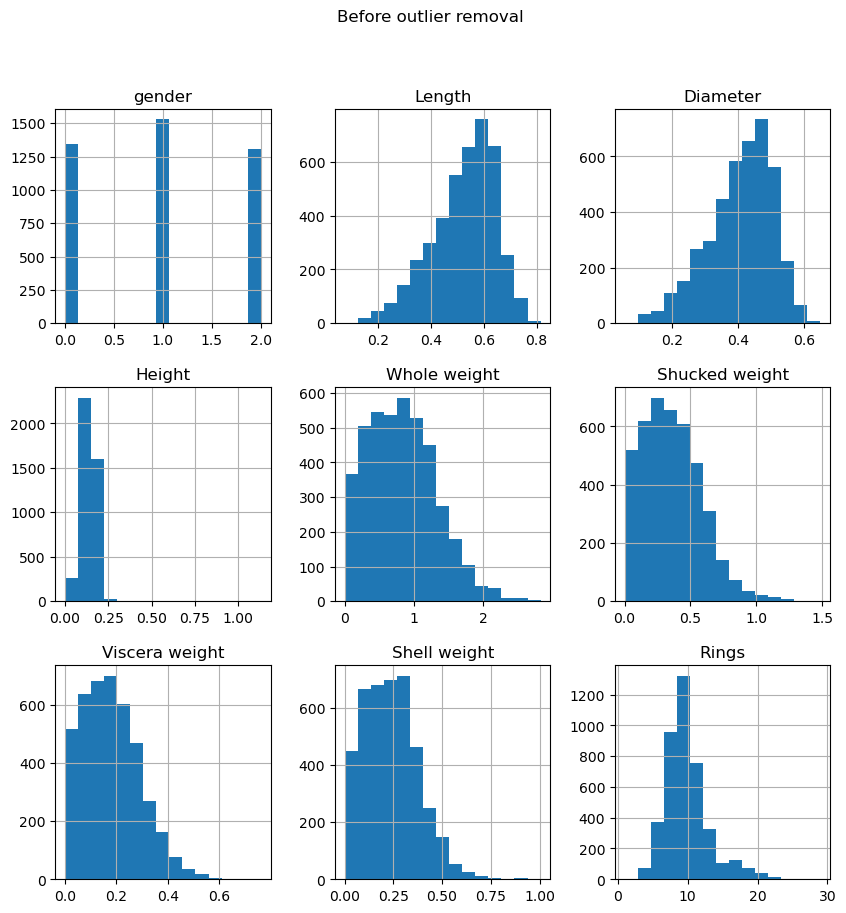

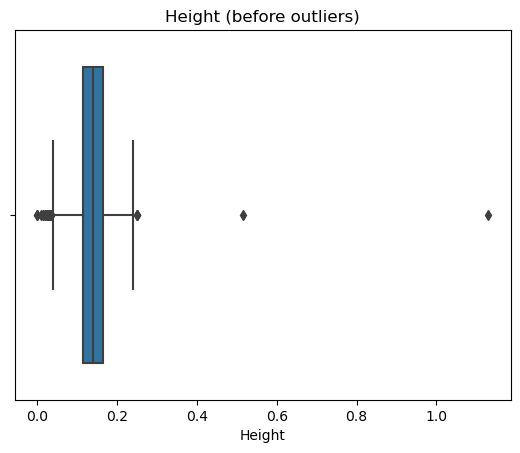

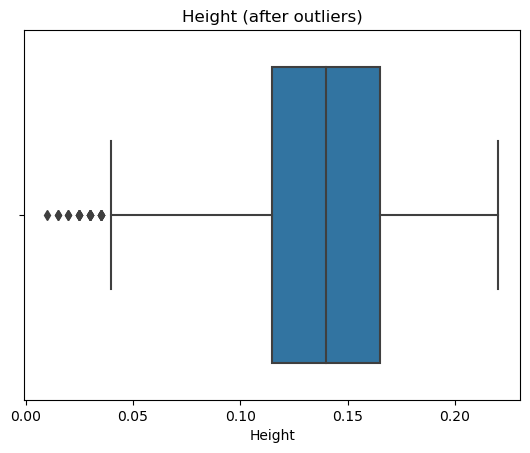

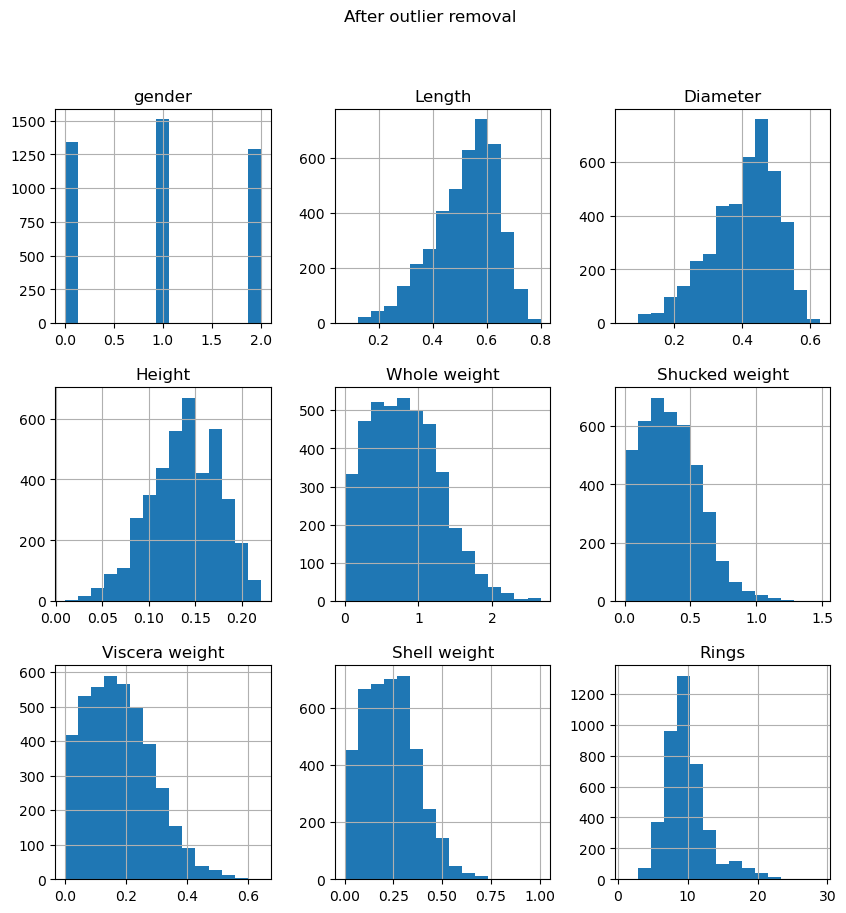

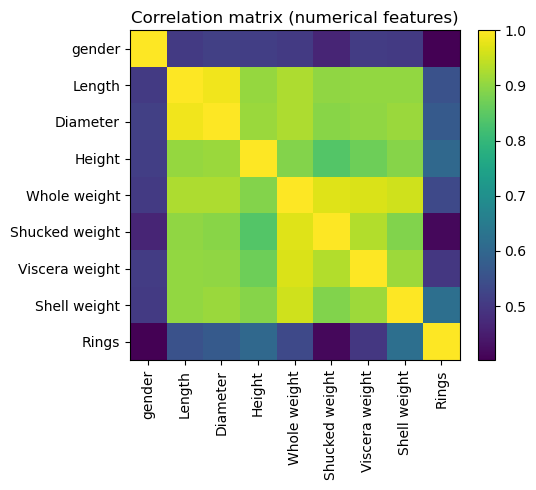

Ridge best a: 0.6579332246575682


In [25]:
# Molly's code cell:
    # Loading in data
CSV_OBJECT = io.StringIO(abalone_data)
CWD = Path.cwd()
#DATA_PATH = "abalone.data.csv"
    # Show summary
#df = pd.read_csv(DATA_PATH, sep=",")
df = pd.read_csv(io.StringIO(abalone_data))
assert "Rings" in df.columns
print(df.shape)
df.head()
    # Check for Nulls
display(df.describe(include='all'))
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
    # Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")
    # Change gender into numerical values (I,M,F = 0,1,2)
df['gender'] = df['gender'].replace({'I':0,'M':1,'F':2})
    # Drop rings
X = df.drop(columns=["Rings"])
y_reg = df["Rings"]
    # Check the data skew
print(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
    'Viscera weight', 'Shell weight']].skew())
    # Plot histograms
df.hist(bins=15, figsize=(10, 10))
plt.suptitle("Before outlier removal")
plt.show()
    # Box plots
sns.boxplot(x=df['Height']) 
plt.title('Height (before outliers)')
plt.show()
    # Remove outliers
threshold_h = df['Height'].quantile(0.99)  # 99th percentile? (looked best)
df = df[df['Height'] <= threshold_h]
df = df[df['Height'] > 0]
        #running this multpile times affects data^
    # Fresh plots
sns.boxplot(x=df['Height']) 
plt.title('Height (after outliers)')
plt.show()
    # Box plot^ and histograms
df.hist(bins=15, figsize=(10, 10))
plt.suptitle("After outlier removal")
plt.show()
    # Split Data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, 
        test_size=0.2, random_state=RNG)
    # Fold datasets for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=RNG)
    # Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix (numerical features)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# Test range of -10 to 100 for alpha value
a_test = np.logspace(-4, 2, 100) # 1000 values between 0.01 - 10,000#RidgeCV Pipeline

# define & cross validate Ridge pipeline
ridge_reg = Pipeline([("scaler", StandardScaler()),
                      ("model", RidgeCV(alphas = a_test,cv=5, scoring="neg_mean_squared_error"))])
# get best value for Alpha
ridge_reg.fit(X_train_r, y_train_r)
best_a = ridge_reg.named_steps["model"].alpha_
print(f"Ridge best a: {best_a}")

### Jude:

    Do performance analysis of different pre-processing

In [26]:
# Jude's code cell

### Krishan:

    Do efficiency analysis of different pre-processing

In [27]:
# Krishan's code cell

# Comparing Different Models


Im just putting ideas for models we could use, feel free to change :)

## Ridge regression

### Ross:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [28]:
# Ross's code 

# Define the range of alphas to test for regularization
alphas_to_test = np.logspace(-4, 2, 100) # Test 100 values from 0.0001 to 100

#RidgeCV Pipeline
pipe_ridge_cv = Pipeline([
    ("scaler", RobustScaler()),
    ("ridge_cv", RidgeCV(alphas = alphas_to_test, cv=5, scoring='neg_mean_squared_error'))
])
# Fit RidgeCV pipeline
pipe_ridge_cv.fit(X_train_r, y_train_r)
# Get best alpha
best_alpha_ridge = pipe_ridge_cv.named_steps['ridge_cv'].alpha_
print(f"Best alpha found by RidgeCV: {best_alpha_ridge}")

# Cross Validate Pipeline
cv_reg = cross_validate(
    pipe_ridge_cv, X_train_r, y_train_r, cv=kf, n_jobs=-1,
    scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
    return_train_score=True
)  

# Fit model on training data 
t0 = time.time()
pipe_ridge_cv.fit(X_train_r, y_train_r)
train_time_ridge = time.time() - t0

# Predict on test data
t1 = time.time()
y_pred_ridge = pipe_ridge_cv.predict(X_test_r)
pred_time_ridge = time.time() - t1

# Summary
print(f"Best alpha found by RidgeCV: {best_alpha_ridge}")
print(f"Mean CV R²: {cv_reg['test_r2'].mean():.3f}")
print(f"Training time: {train_time_ridge:.3f}s")
print(f"Prediction time: {pred_time_ridge:.3f}s")

r2_test_ridge = pipe_ridge_cv.score(X_test_r, y_test_r)
print(f"Test R²: {r2_test_ridge:.3f}")


Best alpha found by RidgeCV: 0.24770763559917114
Best alpha found by RidgeCV: 0.24770763559917114
Mean CV R²: 0.509
Training time: 0.980s
Prediction time: 0.002s
Test R²: 0.543


### Jude:

    Performance analysis

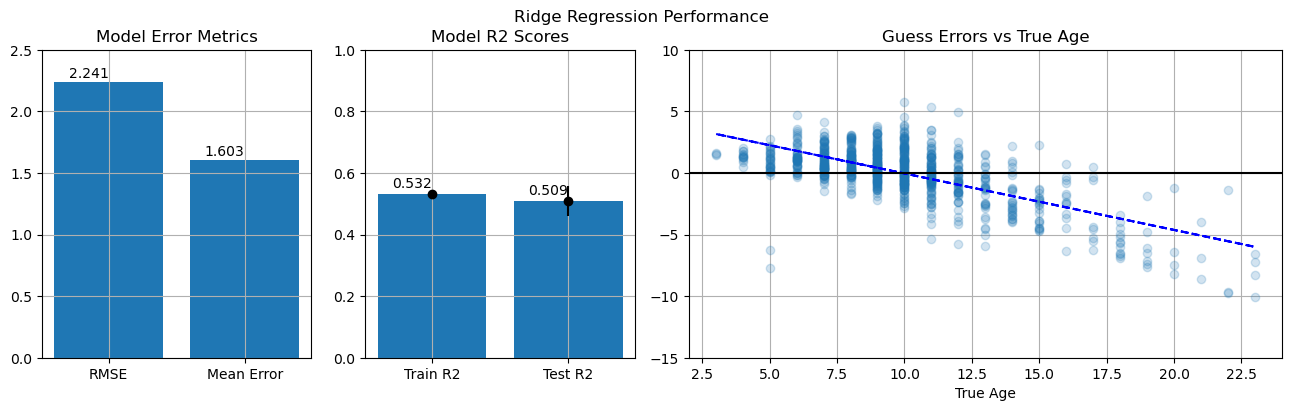

[0.5317295  0.50860446 2.24082005 1.602595  ]


In [66]:
# Jude's code cell

ridgePerformance = performanceTester(pipe_ridge_cv, 'Ridge Regression Performance')

print(ridgePerformance)

### Krishan:

    Efficiency analysis

In [30]:
# Krishan's code cell

## Decision Tree

### Ross:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [31]:
# Ross's code cell

# Parameter ranges
param_grid_dt = {
    "dtree__max_depth": [None, 5, 10, 15, 20],
    "dtree__min_samples_leaf": [1, 5, 10, 20],
    "dtree__min_samples_split": [2, 5, 10]
}

# Pipeline
pipe_dt = Pipeline([
    ("scaler", RobustScaler()),
    ("dtree", DecisionTreeRegressor(random_state=42))
])

# Grid Search
grid_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    cv=kf,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Fit Grid Search
grid_dt.fit(X_train_r, y_train_r)
best_dt = grid_dt.best_estimator_
print(f"Best parameters: {grid_dt.best_params_}")

# Cross Validate
cv_dt = cross_validate(
    best_dt, X_train_r, y_train_r,
    cv=kf, n_jobs=-1,
    scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
    return_train_score=True
)

# Fit model on training data
t0 = time.time()
best_dt.fit(X_train_r, y_train_r)
train_time_dt = time.time() - t0

# Predict on test data
t1 = time.time()
y_pred_dt = best_dt.predict(X_test_r)
pred_time_dt = time.time() - t1

# Summary
print(f"Mean CV R²: {cv_dt['test_r2'].mean():.3f}")
print(f"Training time: {train_time_dt:.3f}s")
print(f"Prediction time: {pred_time_dt:.3f}s")

r2_test_dt = best_dt.score(X_test_r, y_test_r)
print(f"Test R²: {r2_test_dt:.3f}")

Best parameters: {'dtree__max_depth': 10, 'dtree__min_samples_leaf': 20, 'dtree__min_samples_split': 2}
Mean CV R²: 0.494
Training time: 0.028s
Prediction time: 0.003s
Test R²: 0.505


### Jude:

    Performance analysis

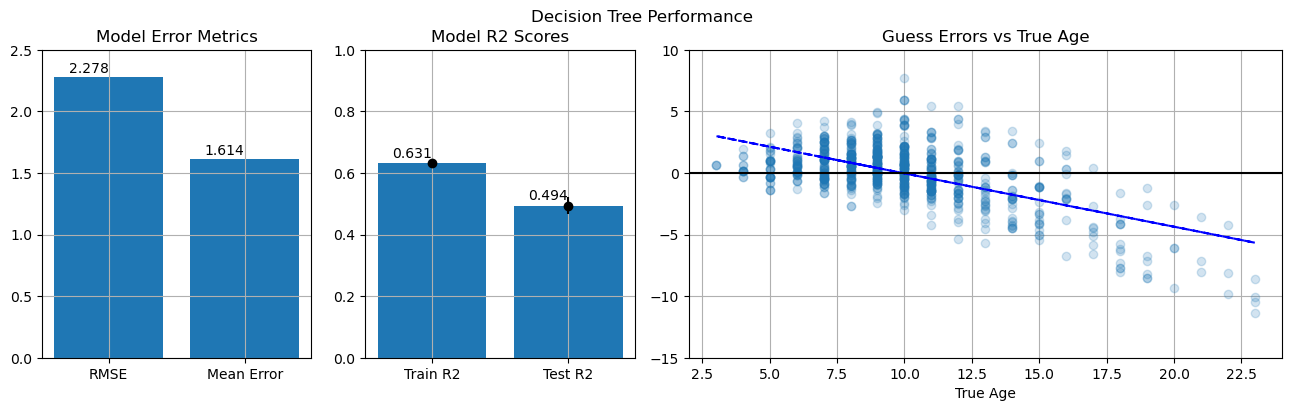

In [68]:
# Jude's code cell
decisionTreePerformance = performanceTester(best_dt, 'Decision Tree Performance')

### Krishan:

    Efficiency analysis

In [33]:
# Krishan's code cell

## RBF SVR

### Ross:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [34]:
# Parameter ranges
param_grid_rbf = {
    "svr__C": [0.1, 100.0],
    "svr__gamma": [0.001, 0.01, 0.1],
    "svr__epsilon": [0.05, 0.125, 0.2]
}

# Pipeline
pipe_svr_rbf = Pipeline([
    ("scaler", RobustScaler()),
    ("svr", SVR(kernel="rbf"))
])

# Grid Search
grid_rbf = GridSearchCV(
    pipe_svr_rbf,
    param_grid_rbf,
    cv=kf,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Fit Grid Search
grid_rbf.fit(X_train_r, y_train_r)
best_rbf = grid_rbf.best_estimator_
print(f"Best parameters: {grid_rbf.best_params_}")

# Cross Validate
cv_rbf = cross_validate(
    best_rbf, X_train_r, y_train_r,
    cv=kf, n_jobs=-1,
    scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
    return_train_score=True
)

# Fit model on training data
t0 = time.time()
best_rbf.fit(X_train_r, y_train_r)
train_time_rbf = time.time() - t0

# Predict on test data
t1 = time.time()
y_pred_rbf = best_rbf.predict(X_test_r)
pred_time_rbf = time.time() - t1

# Summary
print(f"Mean CV R²: {cv_rbf['test_r2'].mean():.3f}")
print(f"Training time: {train_time_rbf:.3f}s")
print(f"Prediction time: {pred_time_rbf:.3f}s")

r2_test_rbf = best_rbf.score(X_test_r, y_test_r)
print(f"Test R²: {r2_test_rbf:.3f}")

Best parameters: {'svr__C': 100.0, 'svr__epsilon': 0.2, 'svr__gamma': 0.1}
Mean CV R²: 0.562
Training time: 0.722s
Prediction time: 0.168s
Test R²: 0.570


### Jude:

    Performance analysis

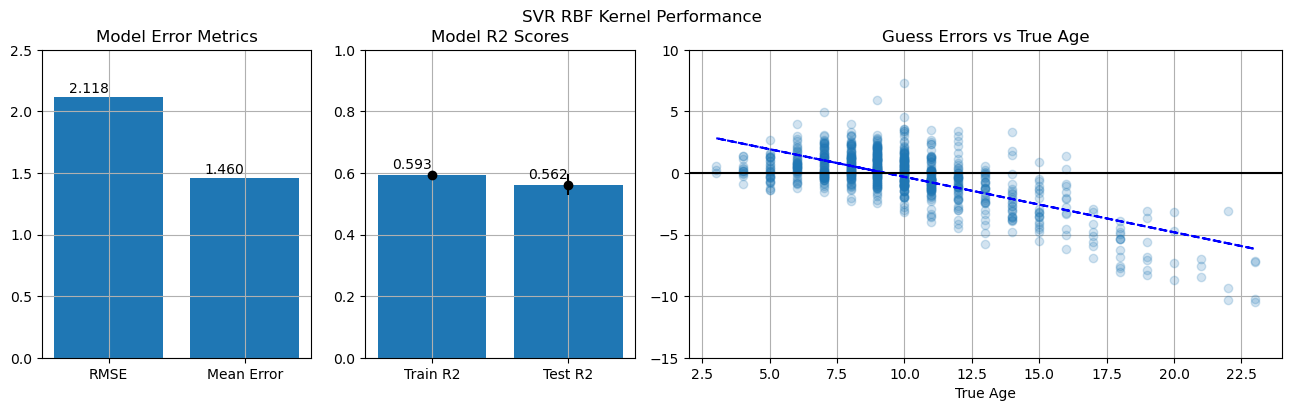

In [69]:
# Jude's code cell
svrRbfPerformance =performanceTester(best_rbf, 'SVR RBF Kernel Performance')

### Krishan:

    Efficiency analysis

In [36]:
# Krishan's code cell

## Random Forest
### Elsie:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [37]:
# Elsie's code cell
"""
#Define hyperparameters
n_estimators_range = np.linspace(100, 600, 10).astype(int)
max_depth_range = np.linspace(5, 30, 5).astype(int)


rf_hyperparam = {
    "rf__n_estimators": n_estimators_range,
    "rf__max_depth": max_depth_range,
}
"""

# Define Pipeline
pipe_rf = Pipeline([
    ("scaler", RobustScaler()), # StandardScaler()),
    ("rf", RandomForestRegressor(n_estimators=488, max_depth=11, random_state=RNG, n_jobs=-1))
])

"""
# Define parameter grid for GridSearchCV
random_search_rf = RandomizedSearchCV(
    pipe_rf,
    rf_hyperparam,
    cv=kf,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=RNG
)

# Fit the grid search on the training data
random_search_rf.fit(X_train_r, y_train_r)

# Get best hyperparameters
best_rf = random_search_rf.best_estimator_
print(f"Best Random Forest hyperparameters: {random_search_rf.best_params_}")
"""

# Cross Validate Pipeline
cv_rf = cross_validate(
    pipe_rf, X_train_r, y_train_r, cv=kf, n_jobs=-1,
    scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
    return_train_score=True
)

# Fit model on training data
t0 = time.time()
pipe_rf.fit(X_train_r, y_train_r)
train_time_rf = time.time() - t0

# Predict on test data
t1 = time.time()
y_pred_r = pipe_rf.predict(X_test_r)
pred_time_rf = time.time() - t1

# Printinf performance summary
print(f"Mean CV R²: {cv_rf['test_r2'].mean():.3f}")
print(f"Training time: {train_time_rf:.3f}s")
print(f"Prediction time: {pred_time_rf:.3f}s")

r2_test_rf = pipe_rf.score(X_test_r, y_test_r)
print(f"Test R²: {r2_test_rf:.3f}")

Mean CV R²: 0.552
Training time: 1.996s
Prediction time: 0.121s
Test R²: 0.543


### Jude:

    Performance analysis

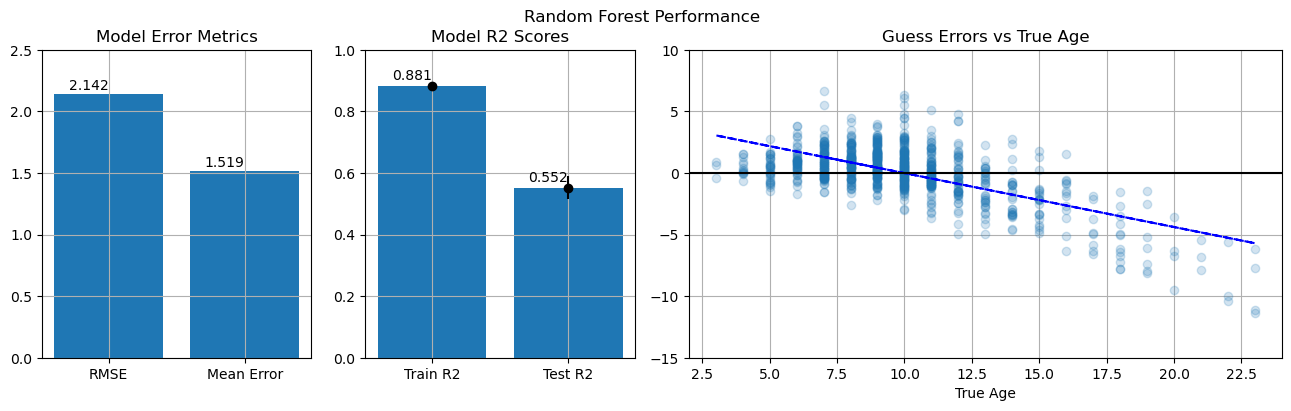

In [72]:
# Jude's code cell
randomForestPerformance = performanceTester(pipe_rf, 'Random Forest Performance')

### Krishan:

    Efficiency analysis

In [39]:
# Krishan's code cell

## Voting Regressor

### Elsie:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [40]:
# Elsie's code cell
"""
# Define hyperparameters for Voting Regressor
voting_hyperparam = {
    'voting__rf__n_estimators': [100, 200, 300],
    'voting__rf__max_depth': [None, 10, 20],
    'voting__ridge__alpha': [0.1, 1.0, 10.0],
    'voting__svr__C': [0.1, 1.0, 10.0]
}
"""
# Create Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=None, random_state=RNG, n_jobs=-1)),
    ('ridge', Ridge(alpha=0.1, random_state=RNG)),
    ('svr', SVR(C=1.0))])

# Define  Pipeline
pipe_voting = Pipeline([
    ('scaler', RobustScaler()),
    ('voting', voting_reg)
])
"""
# Randomized Search
random_search_voting = RandomizedSearchCV(
    pipe_voting,
    param_distributions=voting_hyperparam,
    n_iter=10,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=RNG
)

# Fit
random_search_voting.fit(X_train_r, y_train_r)

# Best estimator
best_voting = random_search_voting.best_estimator_
print(f"Best hyperparameters: {random_search_voting.best_params_}")
"""

# Cross-validate
cv_voting = cross_validate(
    pipe_voting, X_train_r, y_train_r,
    cv=kf, n_jobs=-1,
    scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True
)

# Fit on full training set
t0 = time.time()
pipe_voting.fit(X_train_r, y_train_r)
train_time = time.time() - t0

# Predict
t1 = time.time()
y_pred_voting = pipe_voting.predict(X_test_r)
pred_time = time.time() - t1

# Summary
print(f"Mean CV R²: {cv_voting['test_r2'].mean():.3f}")
print(f"Training time: {train_time:.3f}s")
print(f"Prediction time: {pred_time:.3f}s")
print(f"Test R²: {pipe_voting.score(X_test_r, y_test_r):.3f}")


Mean CV R²: 0.566
Training time: 1.511s
Prediction time: 0.245s
Test R²: 0.573


### Jude:

    Performance analysis

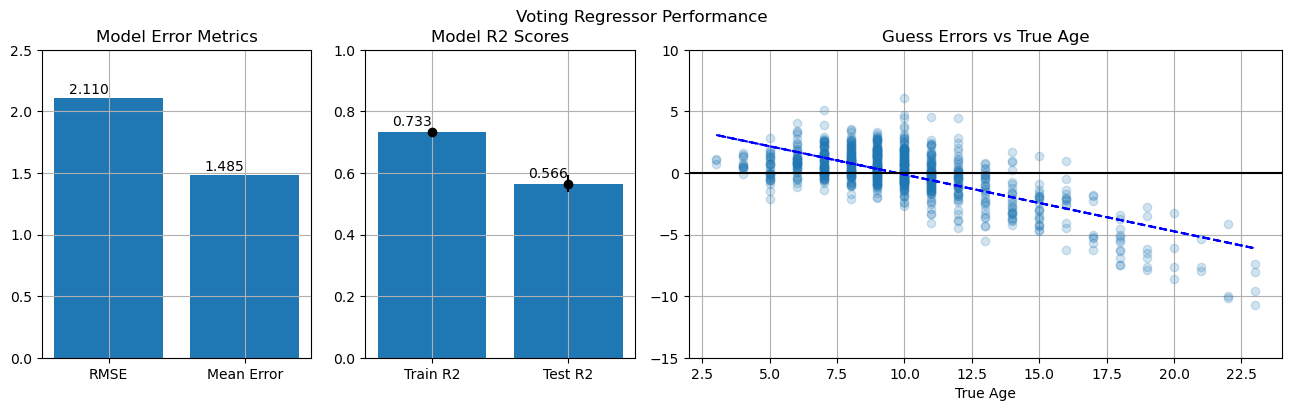

In [70]:
# Jude's code cell

votingPerformance = performanceTester(pipe_voting, 'Voting Regressor Performance')

### Krishan:

    Efficiency analysis

In [42]:
# Krishan's code cell

## Stacking Regressor

### Elsie:

    Implement model pipeline with tuned hyperparameters

    Train model

    Use Model to predict

In [43]:
# Elsie's code 
"""
# Define hyperparameters for Stacking Regressor
stacking_hyperparam = {
   'stacking__rf__n_estimators': [100, 200, 300],
    'stacking__rf__max_depth': [None, 10, 20],
    'stacking__ridge__alpha': [0.1, 1.0, 10.0],
    'stacking__svr__C': [0.1, 1.0, 10.0],
    'stacking__final_estimator__alpha': [0.1, 1.0, 10.0]
}
"""
# Create Voting Regressor
stacking_reg = StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=RNG, n_jobs=-1)),
    ('ridge', Ridge(alpha=1.0, random_state=RNG)),
    ('svr', SVR(C=10.0))],
    final_estimator=Ridge(alpha=1.0, random_state=RNG),
    n_jobs=-1
)

# Define  Pipeline
pipe_stacking = Pipeline([
    ('scaler', RobustScaler()),
    ('stacking', stacking_reg)
])
"""
# Randomized Search
random_search_stacking = RandomizedSearchCV(
    pipe_stacking,
    param_distributions=stacking_hyperparam,
    n_iter=10,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=RNG
)

# Fit
random_search_stacking.fit(X_train_r, y_train_r)

# Best estimator
best_stacking = random_search_stacking.best_estimator_
print(f"Best hyperparameters: {random_search_stacking.best_params_}")
"""

# Cross-validate
cv_stacking = cross_validate(
    pipe_stacking, X_train_r, y_train_r,
    cv=kf, n_jobs=-1,
    scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True
)

# Fit on full training set
t0 = time.time()
pipe_stacking.fit(X_train_r, y_train_r)
train_time = time.time() - t0

# Predict
t1 = time.time()
y_pred_stacking = pipe_stacking.predict(X_test_r)
pred_time = time.time() - t1

# Summary
print(f"Mean CV R²: {cv_stacking['test_r2'].mean():.3f}")
print(f"Training time: {train_time:.3f}s")
print(f"Prediction time: {pred_time:.3f}s")
print(f"Test R²: {pipe_stacking.score(X_test_r, y_test_r):.3f}")


Mean CV R²: 0.575
Training time: 3.440s
Prediction time: 0.255s
Test R²: 0.579


### Jude:

    Performance analysis

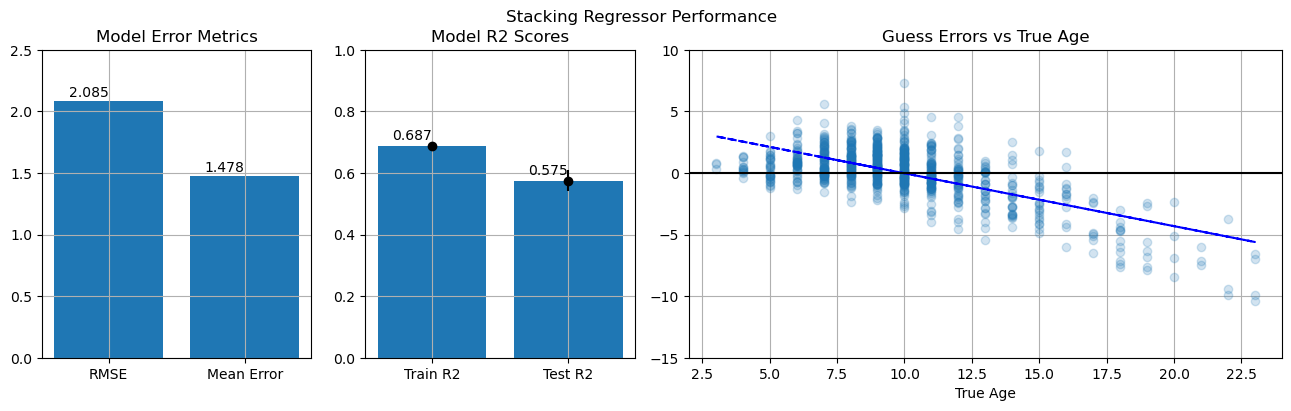

In [71]:
# Jude's code cell
stackingPerformance = performanceTester(pipe_stacking, 'Stacking Regressor Performance')


### Krishan:

    Efficiency analysis

In [45]:
# Krishan's code cell

# Model Comparison

### Rawan:

    Create any graphs to compare model metrics


In [ ]:
# Rawan's code cell

# Hey, all the performance metrics are stored in the following variables:
#
# ridgePerformance - Ridge Regression
# decisionTreePerformance - Decision Tree
# svrRbfPerformance - SVR RBF
# randomForestPerformance - Random Forest
# votingPerformance - Voting Regressor
# stackingPerformance - Stacking Regressor
#
# Each is a numpy array with the following structure:
# [Train R2, Test R2, RMSE, Mean Error]
#
# Eg, the RMSE of Random forest can be acessed with randomForestPerformance[2]
# Hope that helps, From Jude :)